# Ejemplo práctico: estimación de la precipitación en el valle de México usando datos de pluviómetros y radar meteorológico.

Autores: Daniel Vázquez-Ramírez$^{(1)}$ , Martín Díaz-Viera$^{(2)}$, Van Huong Le$^{(1)}$

1) Posgrado en Ciencias de la Tierra
2) Instituto Mexicano del Petróleo





# Introducción.
El siguiente ejemplo forma parte del artículo publicado por (Diaz,Et.Al,2009), donde se presenta una modificación del procedimiento geoestadístico de estimación espacial de la precipitación introducido por Krajewski (1987), el cual aplica el método de cokriging ordinario, combinando imágenes de radar meteorológico con datos de pluviómetros. Aquí, a diferencia del procedimiento de Krajewski, se incluye en el método de cokriging ordinario la dependencia espacial conjunta de radar-pluviómetros mediante un modelo de corregionalización lineal. La metodología propuesta es probada usando datos de pluviógrafos y de radar de una tormenta ocurrida en el valle de la ciudad de México.

## Abrir el proyecto en R Studio.

El proyecto precargado lo pueden descargar en la página del curso http://www.esmg-mx.org/activities/courses/geoestadistica. Para el análisis exploratorio descargamos la  Clase Práctica 1: Análisis Exploratorio de Datos. Se descomprime el archivo y podemos ver que el proyecto se compone de un conjunto de carpetas; la carpeta "Functions" donde encontraran las funciones que usaremos durante la clase práctica y la carpeta "Scripts" donde encontrarán los archivos "Getting_Started_script.R" y "00 Lluvia_AED_2D.R". El primer script contiene las instrucciones para definir directorios, instalar los paquetes, cargar librerías y funciones, el segundo script contiene las instrucciones del ejemplo para hacer el análisis exploratorio. Les recomendamos que el archivo "lluvia.txt" lo guarden en la carpeta "Data".

Para abrir el proyecto en R Studio deben dar doble clic en "RGeoestad_2D_Vacio.Rproj".

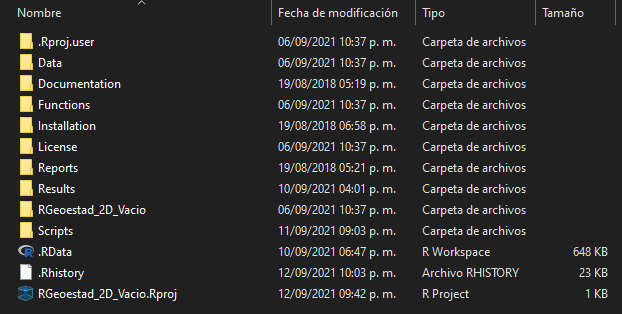
NOTA: es importante que el proyecto se abra usando "RGeoestad_2D_Vacio.Rproj", si abren solo los scripts no podrán acceder a los directorios.

## Carga de paqueterias y funciones.

Para obtener la estimación espacial debemos instalar en R Studio los siguientes paquetes: Rcpp, maps, mapproj, actuar, fields, fitdistrplus, geoR, gstat, MASS, moments, poweRlaw, RFOC, spatstat, ADGofTest, reshape, sp.

$\textbf{NOTA: la versión de R recomendada es 4.1.1}$, de lo contrario, no podrán instalar el paquete "actuar".

Hay dos formas de instalar estos paquetes: la primera opción es ir a la barra de menús en la interfaz de R Studio, dar click en tools>install Packages.  En el renglón Packages pondrán los nombres de los paquetes separados por coma y después dan click en install.

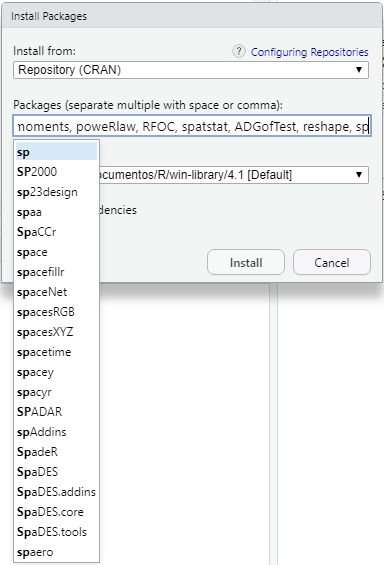

La segunda opción es usando la consola, para eso abrimos el script "Getting_Started_script.R" y ejecutar las siguientes lineas.

In [ ]:
root_dir<-getwd()

#install_dir- installation directory

install_dir<-paste(root_dir,"/Installation",sep="")

setwd(install_dir)

install.packages("Rcpp")
install.packages("maps")
install.packages("mapproj")
install.packages("actuar")
install.packages("fields")
install.packages("fitdistrplus")
install.packages("geoR")
install.packages("gstat")
install.packages("MASS")
install.packages("moments")
install.packages("poweRlaw")
install.packages("RFOC")
install.packages("spatstat")
install.packages("ADGofTest")
install.packages("reshape")
install.packages("sp")

#set back to root work directory

Despues de instalar los paquetes debemos cargarlos de la siguiente forma:

In [1]:

root_dir<-getwd()
setwd(root_dir)

#### Load Packages ####
library(actuar)
library(Rcpp)
library(maps)
library(mapproj)
library(fields)
library(fitdistrplus)
library(geoR)
library(gstat)
library(MASS)
library(moments)
library(poweRlaw)
library(RFOC)
library(spatstat)
library(ADGofTest)
library(reshape)
library(sp)


Attaching package: 'actuar'


The following objects are masked from 'package:stats':

    sd, var


The following object is masked from 'package:grDevices':

    cm


Loading required package: spam

Loading required package: dotCall64

Loading required package: grid

Spam version 2.7-0 (2021-06-25) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: 'spam'


The following objects are masked from 'package:base':

    backsolve, forwardsolve


Loading required package: viridis

Loading required package: viridisLite


Attaching package: 'viridis'


The following object is masked from 'package:maps':

    unemp


See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 

Loading required package: MASS

Loading required package: survival

--------------------

Comprobamos que todos los paquetes hayan sido cargados, si es asi, cargaremos las funciones. Estas nos permitirán obtener los graficos, modelos, etc.

In [2]:
root_dir<-getwd()

function_dir<-paste(root_dir,"/Functions",sep="")

setwd(function_dir)

source("AllModel.R", encoding='ISO-8859-1')
source("BasicStats.R", encoding='ISO-8859-1')
source("BestModel.R", encoding='ISO-8859-1')
source("BestModel.R")
source("BestModelName.R")
source("CDF.R")
source("CoKrigingOrd.R")
source("CoKrigingOrdAnis.R")
source("CrossValidation.R")
source("CrossValidation2.R")
source("CrossVariograma.R")
source("DEspacial.R", encoding='ISO-8859-1')
source("Distance.R")
source("Estadisticas.R")
source("EyeModel.R", encoding='ISO-8859-1')
source("FitDistribution.R", encoding='ISO-8859-1')
source("GDEspacial.R", encoding='ISO-8859-1')
source("GDirecciones.R", encoding='ISO-8859-1')
source("GNormal.R", encoding='ISO-8859-1')
source("hist2.R")
source("HistBoxplot.R")
source("HistModel.R")
source("KrigingOrd.R", encoding='ISO-8859-1')
source("KrigingOrdAnis.R", encoding='ISO-8859-1')
source("ModelVariogram.R")
source("Modelo.R")
source("Outliers.R")
source("OutliersCount.R")
source("OutliersCountTwo.R")
source("OutliersPos.R")
source("OutliersTwo.R")
source("PPplot.R")
source("QQplot.R")
source("RangoParams.R")
source("Regresion.R")
source("ScatterPlot.R")
source("Tendencia.R")
source("Transformacion.R")
source("Trend.R")
source("Val_Estadisticos.R", encoding='ISO-8859-1')
source("Validacion.R", encoding='ISO-8859-1')
source("ValidacionCross.R", encoding='ISO-8859-1')
source("Variograma.R")
source("Variograma4D.R", encoding='ISO-8859-1')
source("hist2.R")
source("scaterplot.R")
source("scaterplotReg.R")
#source("PlotGridCells.R")

setwd(root_dir)

Para saber si todos los directorios fueron cargados adecuadamente, veremos que el directorio final mostrado en la consola es "RGeoestad_2D_Vacio" como se muestra en la siguiente imagen.

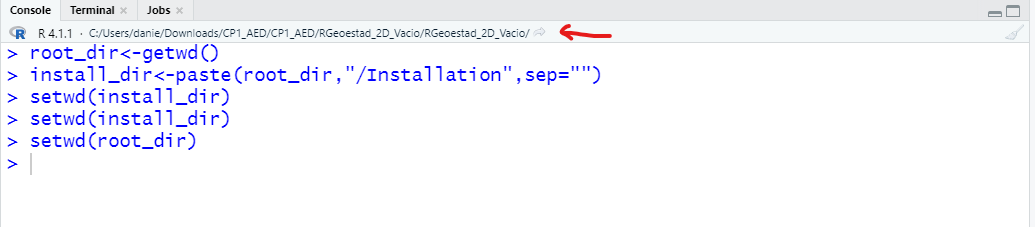

De lo contrario, se debe poner en la consola la instrucción "setwd(root_dir)" o bien se puede redirigir el directorio en la barra de menus>Session>Set Working Directory>To Project Directory. 

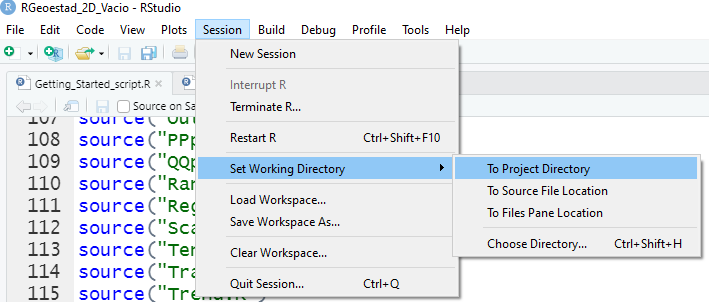

Despues de cargar las funciones podemos continuar con el análisis exploratorio.

Es importante recordar que cada vez que se abre el proyecto en R Studio se deben cargar solo las librerias como se muestra en la siguiente imagen.

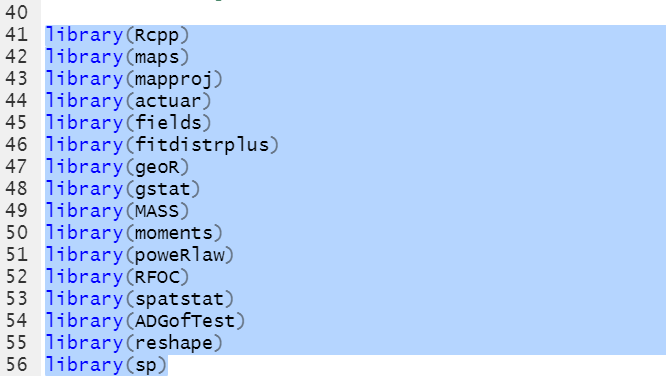

$\textbf{NOTA:}$ Si este proceso se hace en este notebook, se deben cargar solo las librerias y las funciones.

## Carga de datos.

Ahora tenemos que cargar los datos de cada variable con su respectiva posicion espacial en coordenadas UTM. Es importante que cada columna tenga su propio encabezado, así será fácil localizarlos e indexarlos. Para seleccionar el archive que contiene la información que necesitamos, ejecutamos el comando “read.table”, el cual contiene las siguientes tres instrucciones: file=file.choose(), esta instrucción indica que quieres seleccionar el archivo usando una ventana emergente similar a la mostrada en la siguiente imagen: 

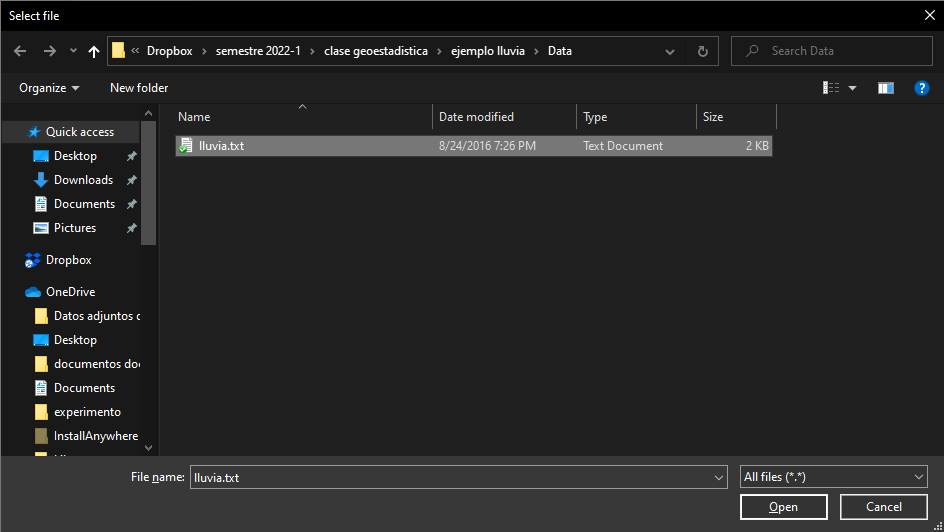

header=TRUE indica que las columnas tienen encabezado y  na.strings="-999.25" es una condicional para que cualquier celda nula sea llenada con el número -999.25.

In [3]:
Data_File <- read.table(file=file.choose(),header=TRUE,na.strings="-999.25")

Si se desea abrir un archivo con información delimitada por comas (.csv) se cambia la instrucción por: "Data_File <- read.csv(file=file.choose(),header=T,na.strings="-999.25")" 

Para ordenar los resultados necesitamos crear una carpeta que usemos específicamente para el análisis exploratorio de datos (AED), ahí se almacenarán tablas e imágenes, esto lo hacemos con el comando "dir.create", donde le indicaremos la ruta donde se creará la carpeta AED.

$\textbf{Nota: no es necesario ejecutar esta línea más de una vez, de lo contrario R Studio mostrará un error}$ "Warning message in dir.create(paste(getwd(), "/Results/AED", sep = ""))  already exists"

In [4]:
dir.create(paste(getwd(),"/Results/AED", sep=""))

Warning message in dir.create(paste(getwd(), "/Results/AED", sep = "")):
"'C:\Users\danie\Dropbox\semestre 2022-1\clase geoestadistica\ejemplo lluvia\Results\AED' already exists"


# Análisis exploratorio de datos.

Como se mostró en clase, el objetivo del análisis exploratorio es examinar las variables aleatorias disponibles y establecer si estas cumplen con los supuestos que requiere la estimación. Por lo tanto, debemos verificar su normalidad, linealidad, homocedasticidad, identificar los valores atípicos (outliers) y evaluar el impacto que tendrán estos valores durante el análisis variográfico y por supuesto, la estimación.

Para este ejemplo las variables son los valores obtenidos de los pluviómetros (Pluv_mm) y del radar meteorológico (Radar_mm), los cuales tienen una distribución espacial en coordenadas UTM.

Después de cargar el archivo con la información y asignarle el nombre "Data_File", necesitamos las variables aleatorias y su posición espacial. Esto lo podemos hacer de la siguiente forma: 

In [5]:
XCoord<-Data_File$UTM_X_m      #Coordenada UTM en x
YCoord<-Data_File$UTM_Y_m      #Coordenada UTM en y
Radar_mm<-Data_File$Radar_mm   #variable con la información del radar metereológico
Pluv_mm<-Data_File$Pluv_mm     #variable con la información de los pluviómetros

Ya que tenemos las variables necesitamos saber sobre sus estadígrafos, esto lo podemos calcular usando la función "Estadisticas". Es importante mencionar que los valores calculados en este paso se usarán en los gráficos.

In [6]:
XCoord_Stat<-Estadisticas(XCoord)
YCoord_Stat<-Estadisticas(YCoord)
Radar_mm_Stat<-Estadisticas(Radar_mm)
Pluv_mm_Stat<-Estadisticas(Pluv_mm)

##  Análisis estadístico univariado.

Para la interpretación estadística univariada comenzaremos dos elementos: la tabla con los valores estadísticos y el histograma con boxplot. La tabla con los estadígrafos la obtenemos usando la función "Val_Estadisticos" y la guardamos en la carpeta "AED" con la instrucción "write.csv".

In [7]:
Data_File_Stat <- Val_Estadisticos(Data_File)
write.csv(Data_File_Stat , file = "Results/AED/Data_File_Stat.csv")  #esta linea sirve para guardar los resultados en un archivo csv
print(Data_File_Stat[,3:4])

                   Radar_mm  Pluv_mm
No_muestras        50.00000 50.00000
Minimo              0.18000  0.25000
Cuartil_1er         0.87750  0.31250
Mediana             1.42500  1.00000
Media               1.83500  1.47000
Cuartil_3er         2.37500  1.93750
Maximo              7.79000  7.75000
Rango               7.61000  7.50000
Rango_Intercuartil  1.49750  1.62500
Varianza            2.47352  2.57561
Desv_Estandar       1.57274  1.60487
Simetria            2.02492  2.46929
Curtosis            7.99412 10.05416


### Análisis estadístico univariado para el radar metereológico (Radar_mm).

El histograma con boxplot se grafica usando la función "HistBoxplot", esta necesita que le indiquemos el vector con los valores (x), su valor esperado (mean) y su mediana (median). Si observan la instrucción para obtener el histograma para el radar meteorológico, el valor esperado y la mediana la toma de la tabla que se generó con la función "Estadisticas". Por ejemplo, la instrucción "Radar_mm_Stat[5,2]" indica que el valor esperado se encuentra en la fila 5 columna 2. también podemos indicar el número de bins que necesitamos, en este caso es "nbin = 9", es importante recordar que el número por default que encontrarán es 9, pero puede cambiarse según las necesidades del usuario.

La función "HistBoxplot" puede generar dos tipos de histograma: de frecuencia absoluta y de frecuencia relativa. Para obtener el histograma de frecuencia absoluta debemos indicar que "AbsFreq = TRUE, PercentFreq = FALSE" y para el histograma de frecuencia relativa debemos indicar que "AbsFreq = FALSE, PercentFreq = TRUE".

El histograma para el radar metereológico (Radar_mm) con frecuencia absoluta es:

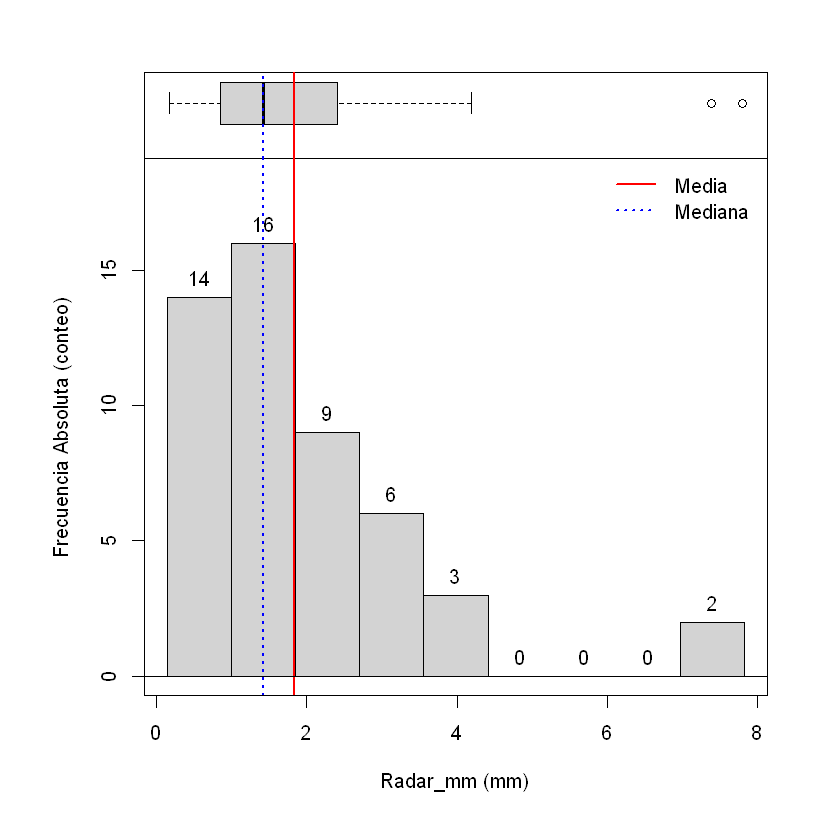

In [8]:
HistBoxplot(x=Radar_mm, mean = Radar_mm_Stat[5,2], median = Radar_mm_Stat[4,2], main ="",  
            xlab = "Radar_mm (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

Y el histograma del radar metereológico con frecuencia relativa es:

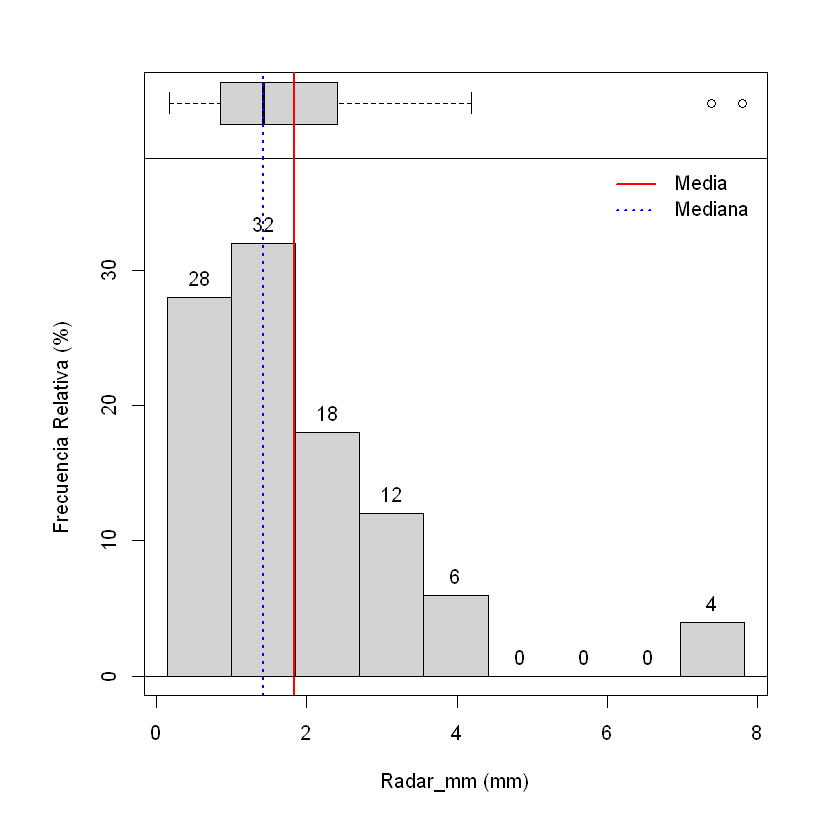

In [9]:
HistBoxplot(x=Radar_mm, mean = Radar_mm_Stat[5,2], median = Radar_mm_Stat[4,2], main ="", 
            xlab = "Radar_mm (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

Analizando los histogramas y los estadígrafos de la variable del radar meteorológico (Radar_mm) tiene una diferencia entre la media y la mediana de 0.47, su coeficiente de asimetría es de 2.46929, lo cual significa que la variable es asimétrica. Esto se confirma con los histogramas, los cuales muestran que la asimetría es positiva. También podemos notar que el boxplot muestra dos valores atípicos localizados en el extremo derecho. El valor de la curtosis es de 7.99412, lo cual nos indica que es leptocúrtica.

Para saber cuáles son esos valores atípicos usamos la función "OutliersPos".

In [10]:
Radar_mm_outliers<-OutliersPos(Radar_mm)
Data_File[Radar_mm_outliers,c(1,2,3)]

UTM_X_m UTM_Y_m Radar_mm
32 482135  2129478 7.79    
36 497898  2129469 7.39

Ahí podemos notar que la muestra 32 y 36 son los valores atípicos, por lo que retiramos esos valores de la variable, esto lo hacemos usando una variable nueva que llamaremos "Radar_mm_out". También necesitamos calcular los valores estadísticos de esta nueva variable.

$\textbf{NOTA: retirar los valores atípicos no significa que no usaremos más adelante, los necesitaremos para saber si es conveniente o no quitarlos, para eso se genera un nuevo vector.}$. Por ejemplo, el vector "Radar_mm" es el vector original, el vector "Radar_mm_out" contiene todos los valores excepto aquellos que fueron señalados como valores atípicos.
$\textbf{NOTA: Si desea usar el vector sin los valores atípicos, también necesitará retirar las coordenadas de los valores atípicos detectados, de lo contrario podría tener problemas en los cómputos del análisis variográfico.}$.

In [24]:
Radar_mm_out<-Radar_mm[-Radar_mm_outliers]
Radar_mm_out_Stat<-Estadisticas(Radar_mm_out)
Radar_mm_out_Stat

Statistics         Values 
muestras   n                  48.0000
minimos    Minimum             0.1800
cuantiles1 1st. Quartile       0.8050
medianas   Median              1.3500
medias     Mean                1.5952
cuantiles3 3rd. Quartile       2.2475
maximos    Maximum             4.1900
rangos     Rank                4.0100
rangosInt  Interquartile Rank  1.4425
varianzas  Variance            1.1090
desvs      Standard Deviation  1.0531
CVs        Variation Coeff.    0.6602
simetrias  Skewness            0.6937
curtosiss  Kurtosis            2.7723

Volvemos a graficar el histograma para los valores obtenidos con el radar metereológico sin valores atípicos (Radar_mm_out) con frecuencia absoluta.

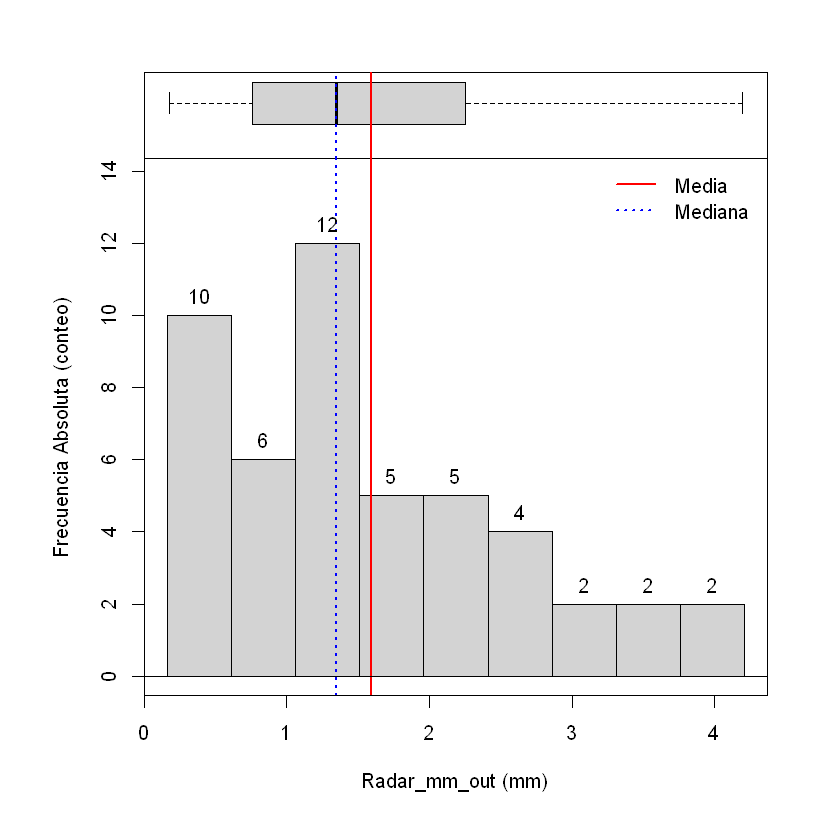

In [25]:
HistBoxplot(x=Radar_mm_out, mean = Radar_mm_out_Stat[5,2], median = Radar_mm_out_Stat[4,2], main ="",  
            xlab = "Radar_mm_out (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

Y el histograma para los valores obtenidos con el radar metereológico sin valores atípicos (Radar_mm_out) con frecuencia relativa.

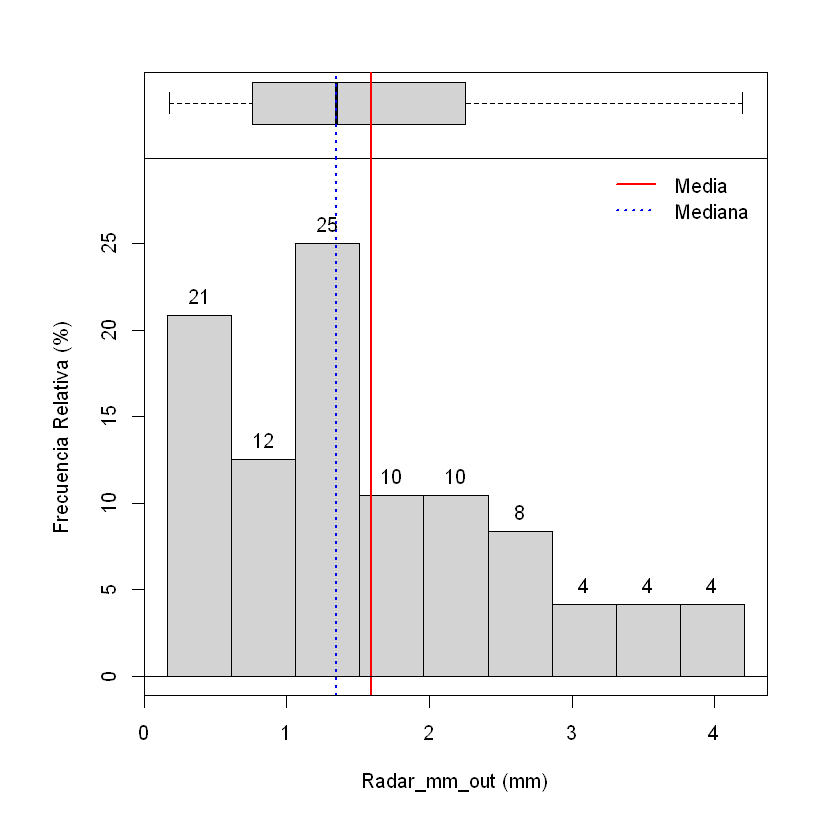

In [26]:
HistBoxplot(x=Radar_mm_out, mean = Radar_mm_out_Stat[5,2], median = Radar_mm_out_Stat[4,2], main ="", 
            xlab = "Radar_mm_out (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

Analizando la diferencia entre me media y la mediana de esta nueva variable es de 0.2452 y su asimetría es de 0.6937. En principio esto nos indica que la asimetría disminuyó, sin embargo, la variable sigue mostrando asimetría positiva. Con el caso de la curtosis, el valor pasó de 7.99412 a 2.7723, con lo cual consideramos que es planicúrtica.

Ahora podemos observar que los boxplot no muestran nuevos valores atípicos para la variable del radar meteorológico sin valores atípicos (Radar_mm_out). Esto lo podemos confirmar usando la función "OutliersPos".

In [27]:
Radar_mm_out_outliers<-OutliersPos(Radar_mm_out)
print(Radar_mm_out_outliers)

numeric(0)


#### Transformación de variable para el radar metereológico (Radar_mm).

Dado que no se logró obtener la normalidad en esta variable, podemos usar alguna transformación. 

En estadística, la transformación de datos es la aplicación de una función matemática determinista a cada punto en un conjunto de datos, es decir, cada punto de datos $z_i$ se reemplaza con el valor transformado $y_i=f(z_i)$, donde $f$ es una función.

Las transformaciones generalmente se aplican para que los datos parezcan cumplir más con los supuestos de un procedimiento de inferencia estadística que se aplicará o para mejorar la interpretabilidad o la apariencia de los gráficos. 

Las razones más comunes para aplicar una transformación son:

* Reducir la asimetría.
* Lograr relaciones de dependencia lineales o cuasi lineales
* Conveniencia.

Las transformaciones más comunes son:

| Asimetrías positivas | Ecuación | Asimetrías negativas | Ecuación |
| :------------------ | :------ | :------------------ | :------ | 
| Raíz cuadrada | $$v_{at}=\sqrt{v_a}$$ | Potencias | $$v_{at}=v_a^n$$ |
| Logarítmica | $$v_{at}=Log(v_a)$$ | Arcseno | $$v_{at}=arcsen(v_a)$$ |
| Recíproca | $$v_{at}=\frac{1}{v_a}$$ | Exponencial | $$v_{at}=exp(v_a)$$ |


Donde ${v_a}$ es la variable aleatoria y $v_{at}$ es la variable aleatoria transformada.

$\textbf{NOTA: El usuario debe saber si la transformación puede ser usada en la variable aleatoria}$. Por ejemplo, si la variable aleatoria contiene muestras con valor cero, entonces no podrá usar las transformaciones logarítmica o reciproca. Si desea usar la transformación arcseno, la variable aleatoria debe tener componente trigonométrica.

Dado que la variable del radar meteorológico (Radar_mm) presenta asimetría positiva, se van a usar dos tipos de transformaciones: raíz cuadrada y logarítmica.

$\textbf{Transformación de raíz cuadrada}$

Empezaremos con la transformación de raíz cuadrada usando el vector "Radar_mm", la cual se hace de la siguiente forma:


In [28]:
Data_File$Radar_mm_Sqrt<-sqrt(Radar_mm)
Radar_mm_Sqrt <- Data_File$Radar_mm_Sqrt

Ya que obtenemos la variable aleatoria transformada por raiz cuadrada (Radar_mm_Sqrt), debemos obtener sus estadígrafos.

In [29]:
# Estadística basica
Radar_mm_Sqrt_Stat<-Estadisticas(Radar_mm_Sqrt) #estos valores los necesitamos para poder graficar los histogramas

# Estadística basica comparativa entre (Radar_mm) y la transformación (Radar_mm_Sqrt)
Data_File_Stat <- Val_Estadisticos(Data_File)
Data_File_Stat[,c(3,5)]

Radar_mm Radar_mm_Sqrt
No_muestras        50.00000 50.00000     
Minimo              0.18000  0.42426     
Cuartil_1er         0.87750  0.93641     
Mediana             1.42500  1.19364     
Media               1.83500  1.25106     
Cuartil_3er         2.37500  1.54098     
Maximo              7.79000  2.79106     
Rango               7.61000  2.36679     
Rango_Intercuartil  1.49750  0.60456     
Varianza            2.47352  0.27536     
Desv_Estandar       1.57274  0.52474     
Simetria            2.02492  0.74939     
Curtosis            7.99412  3.86947

Y graficamos los histogramas con frecuencia absoluta y relativa de la transformación raíz cuadrada.

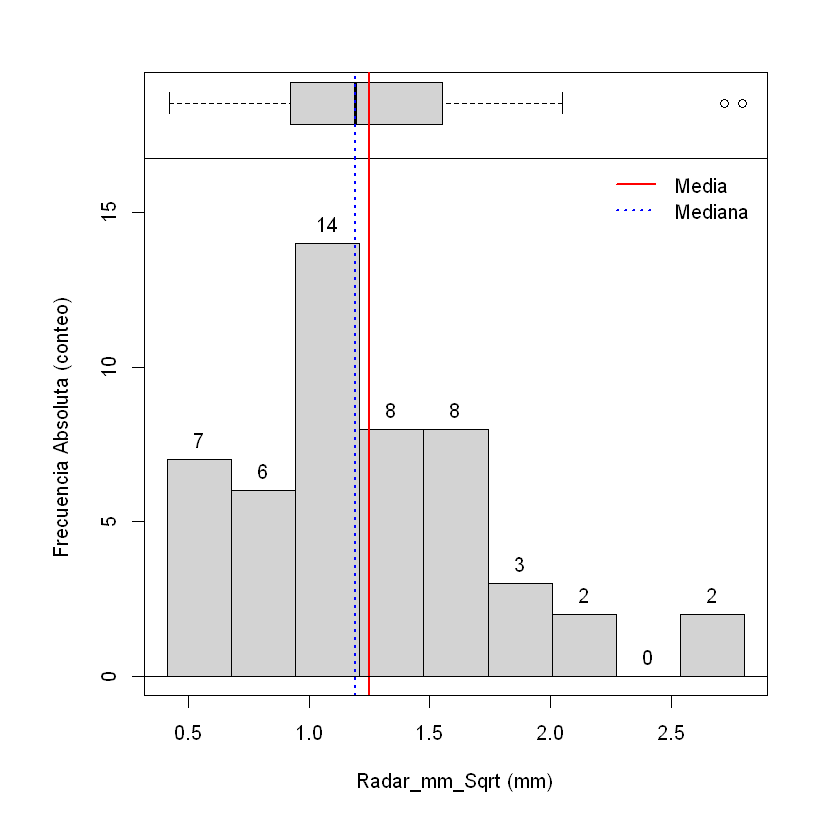

In [30]:
HistBoxplot(x=Radar_mm_Sqrt, mean = Radar_mm_Sqrt_Stat[5,2], median = Radar_mm_Sqrt_Stat[4,2], main ="",  
            xlab = "Radar_mm_Sqrt (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

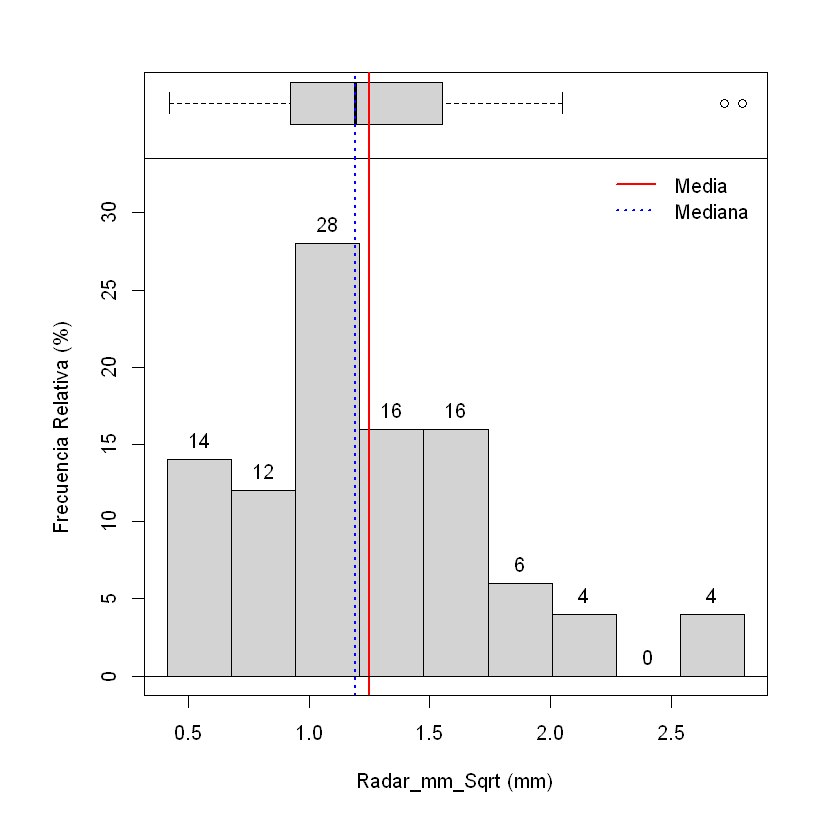

In [31]:
HistBoxplot(x=Radar_mm_Sqrt, mean = Radar_mm_Sqrt_Stat[5,2], median = Radar_mm_Sqrt_Stat[4,2], main ="", 
            xlab = "Radar_mm_Sqrt (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

Si observamos la diferencia entre la media y la mediana de la variable transformada (Radar_mm_Sqrt) podemos notar que es de 0.05742, lo cual podemos considerar como muy bajo en comparación de la diferencia obtenida de la variable sin transformar que es de 0.47, sin embargo, observamos que el boxplot muestra la presencia de dos valores atípicos, los cuales debemos retirar y verificar que no afecten la supuesta simetría que hemos logrado con la transformación.

In [32]:
Radar_mm_Sqrt_outliers<-OutliersPos(Radar_mm_Sqrt)
Data_File[Radar_mm_Sqrt_outliers,c(1,2,5)]

UTM_X_m UTM_Y_m Radar_mm_Sqrt
32 482135  2129478 2.791057     
36 497898  2129469 2.718455

Retiramos los valores atípicos y obtenemos los valores estadísticos.

In [33]:
Radar_mm_Sqrt_out<-Radar_mm_Sqrt[-Radar_mm_Sqrt_outliers]
Radar_mm_Sqrt_out_stat<-Estadisticas(Radar_mm_Sqrt_out)
Radar_mm_Sqrt_out_stat

Statistics         Values 
muestras   n                  48.0000
minimos    Minimum             0.4243
cuantiles1 1st. Quartile       0.8961
medianas   Median              1.1618
medias     Mean                1.1884
cuantiles3 3rd. Quartile       1.4992
maximos    Maximum             2.0469
rangos     Rank                1.6227
rangosInt  Interquartile Rank  0.6031
varianzas  Variance            0.1868
desvs      Standard Deviation  0.4322
CVs        Variation Coeff.    0.3637
simetrias  Skewness            0.0273
curtosiss  Kurtosis            2.2704

Y graficamos sus histogramas.

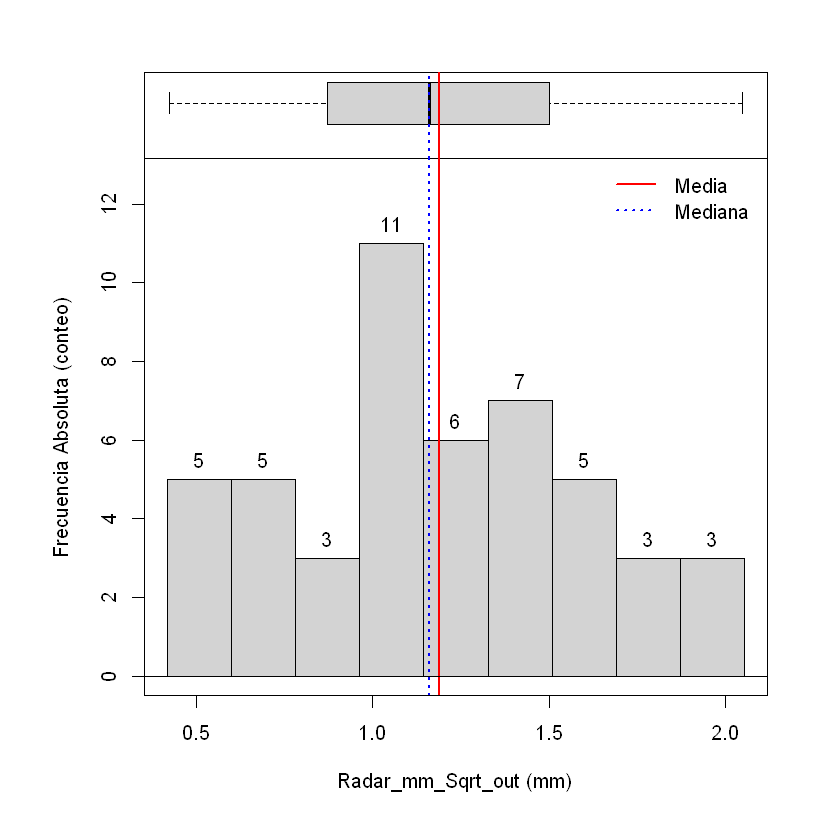

In [34]:
HistBoxplot(x=Radar_mm_Sqrt_out, mean = Radar_mm_Sqrt_out_stat[5,2], median = Radar_mm_Sqrt_out_stat[4,2], main ="",  
            xlab = "Radar_mm_Sqrt_out (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

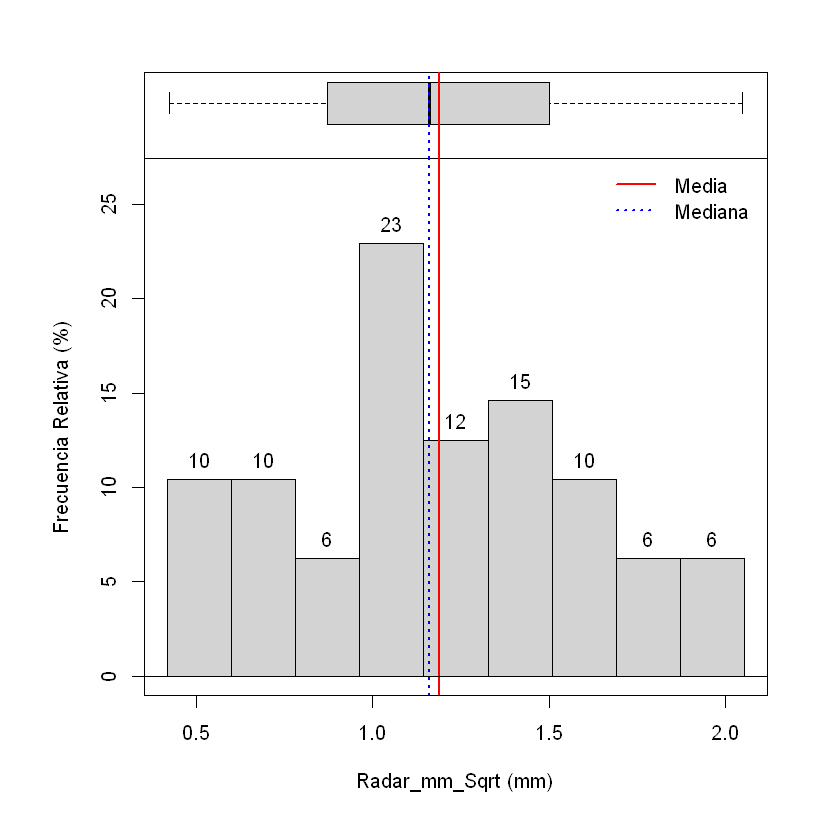

In [35]:
HistBoxplot(x=Radar_mm_Sqrt_out, mean = Radar_mm_Sqrt_out_stat[5,2], median = Radar_mm_Sqrt_out_stat[4,2], main ="", 
            xlab = "Radar_mm_Sqrt (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

Confirmamos que no existan más valores atípicos.

In [36]:
OutliersPos(Radar_mm_Sqrt_out)

numeric(0)

Con los resultados obtenidos al retirar los dos valores atípicos podemos notar que la diferencia entre la media y la mediana pasaron de  0.05742 a 0.0266, podemos considerar que la transformación cumplió su propósito al reducir de manera significativa la asimetría, sin embargo, comparando las muestras transformadas con y sin valores atípicos podría no justificar el retiro de los valores atípicos ya que es muy pequeña la diferencia. 

$\textbf{Transformación logarítmica}$

Ahora probaremos usando la transformación logarítmica. La cual se hace de la siguiente forma:

In [37]:
Data_File$Radar_mm_Log<-log(Radar_mm)
Radar_mm_Log <- Data_File$Radar_mm_Log

y al igual que la transformada por raíz cuadrada, obtenemos sus valores estadísticos.

In [38]:
# Basic Statistics
Radar_mm_Log_Stat<-Estadisticas(Radar_mm_Log)

# Estadística basica comparativa entre (Radar_mm), la transformación (Radar_mm_Sqrt) y (Radar_mm_Log)
Data_File_Stat <- Val_Estadisticos(Data_File)
Data_File_Stat[,c(3,5,6)]

Radar_mm Radar_mm_Sqrt Radar_mm_Log
No_muestras        50.00000 50.00000      50.00000    
Minimo              0.18000  0.42426      -1.71480    
Cuartil_1er         0.87750  0.93641      -0.13209    
Mediana             1.42500  1.19364       0.35387    
Media               1.83500  1.25106       0.26569    
Cuartil_3er         2.37500  1.54098       0.86467    
Maximo              7.79000  2.79106       2.05284    
Rango               7.61000  2.36679       3.76764    
Rango_Intercuartil  1.49750  0.60456       0.99676    
Varianza            2.47352  0.27536       0.79776    
Desv_Estandar       1.57274  0.52474       0.89317    
Simetria            2.02492  0.74939      -0.46105    
Curtosis            7.99412  3.86947       2.87206

Y graficamos sus respectivos histogramas.

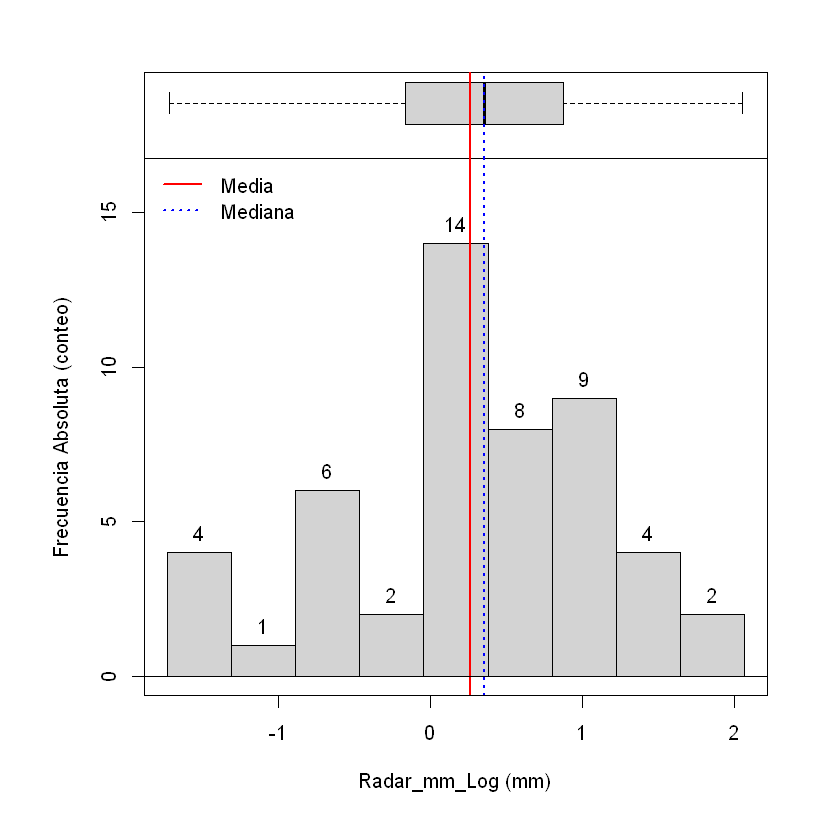

In [39]:
HistBoxplot(x=Radar_mm_Log, mean = Radar_mm_Log_Stat[5,2], median = Radar_mm_Log_Stat[4,2], main ="",  
            xlab = "Radar_mm_Log (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

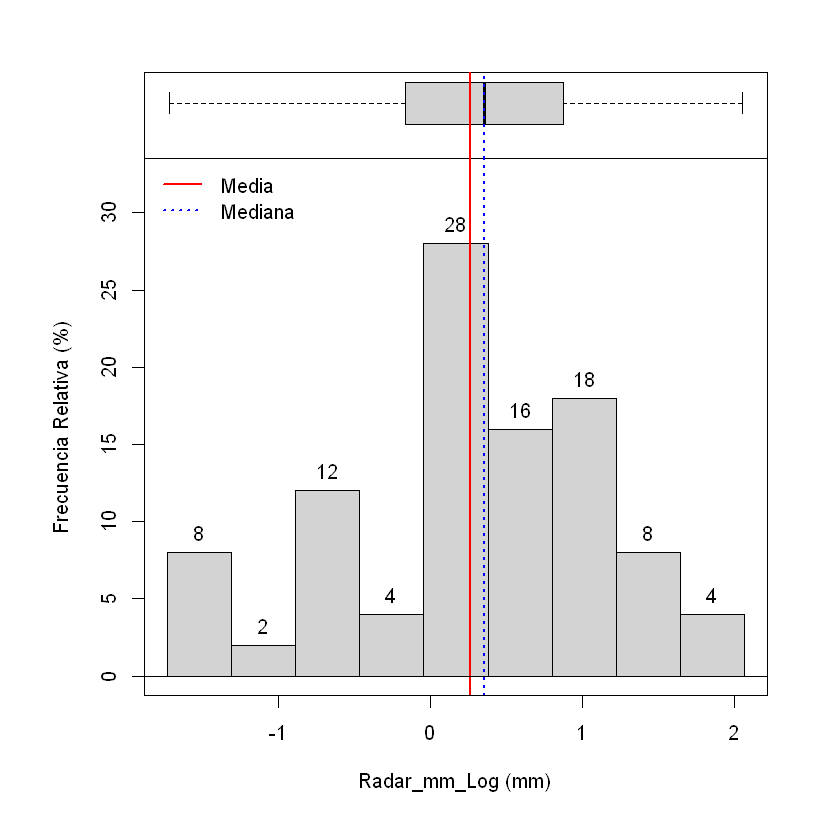

In [40]:
HistBoxplot(x=Radar_mm_Log, mean = Radar_mm_Log_Stat[5,2], median = Radar_mm_Log_Stat[4,2], main ="", 
            xlab = "Radar_mm_Log (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

La diferencia entre la media y la mediana de la transformación logarítmica es de 0.08818, de forma aparente esta diferencia es mayor comparada con la transformación por raíz cuadrada. El boxplot indica que no existen valores atípicos, sin embargo, se usará la función para detectar los valores atípicos.

In [41]:
Radar_mm_Log_outliers<-OutliersPos(Radar_mm_Log)
Data_File[Radar_mm_Log_outliers,c(1,2,6)]

UTM_X_m UTM_Y_m Radar_mm_Log
22 462178  2133934 -1.714798   
49 503149  2123937 -1.660731

Como podemos ver, la función ha detectado dos valores atípicos, los cuales retiraremos y obtenemos sus valores estadísticos.

In [42]:
Radar_mm_Log_out<-Radar_mm_Log[-Radar_mm_Log_outliers]

# Estadística básica
Radar_mm_Log_out_Stat<-Estadisticas(Radar_mm_Log_out)
Radar_mm_Log_out_Stat

Statistics         Values 
muestras   n                  48.0000
minimos    Minimum            -1.5606
cuantiles1 1st. Quartile      -0.0027
medianas   Median              0.3784
medias     Mean                0.3471
cuantiles3 3rd. Quartile       0.8868
maximos    Maximum             2.0528
rangos     Rank                3.6135
rangosInt  Interquartile Rank  0.8895
varianzas  Variance            0.6625
desvs      Standard Deviation  0.8140
CVs        Variation Coeff.    2.3451
simetrias  Skewness           -0.3448
curtosiss  Kurtosis            2.9797

Y graficamos sus histogramas: 

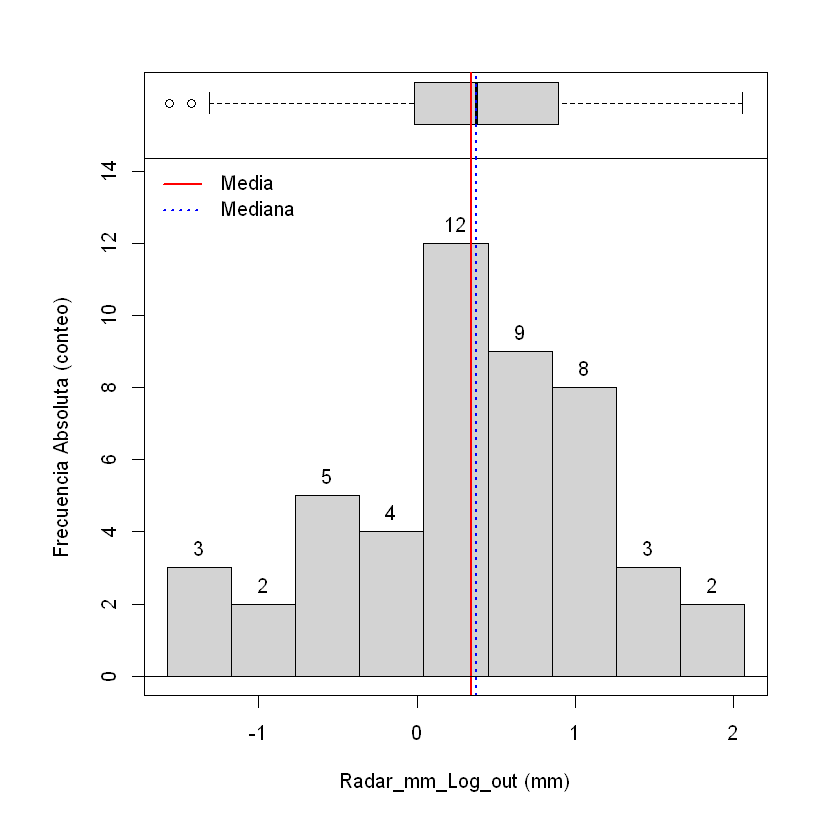

In [43]:
HistBoxplot(x=Radar_mm_Log_out, mean = Radar_mm_Log_out_Stat[5,2], median = Radar_mm_Log_out_Stat[4,2], main ="", 
            xlab = "Radar_mm_Log_out (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

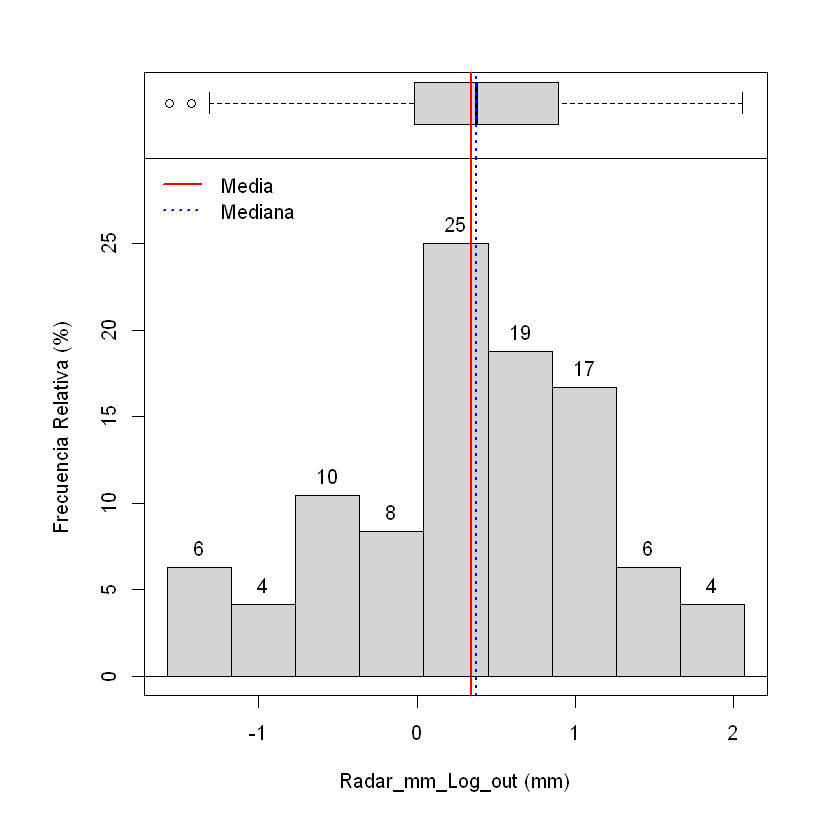

In [44]:
HistBoxplot(x=Radar_mm_Log_out, mean = Radar_mm_Log_out_Stat[5,2], median = Radar_mm_Log_out_Stat[4,2], main ="", 
            xlab = "Radar_mm_Log_out (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

La diferencia entre la media y la mediana de la transformación logarítmica quitando los valores atípicos detectados pasó de 0.08818 a 0.0313, sin embargo, el boxplot muestran dos valores atípicos localizados a la izquierda del gráfico. Por lo tanto, retiraremos esos nuevos valores atípicos.

In [45]:
Radar_mm_Log_outliers2<-OutliersPos(Radar_mm_Log_out)
Radar_mm_Log_out[Radar_mm_Log_outliers2]

[1] -1.427116 -1.560648

Y hacemos un analisis estadístico de este nuevo conjunto de valores.

In [46]:
# Variable without distributional outliers 2
Radar_mm_Log_out2<-Radar_mm_Log_out[-Radar_mm_Log_outliers2]

#2º analisis sin valores atipicos
# Estadística básica
Radar_mm_Log_out2_Stat<-Estadisticas(Radar_mm_Log_out2)
Radar_mm_Log_out2_Stat

Statistics         Values 
muestras   n                  46.0000
minimos    Minimum            -1.3093
cuantiles1 1st. Quartile       0.0440
medianas   Median              0.3920
medias     Mean                0.4271
cuantiles3 3rd. Quartile       0.9011
maximos    Maximum             2.0528
rangos     Rank                3.3622
rangosInt  Interquartile Rank  0.8571
varianzas  Variance            0.5346
desvs      Standard Deviation  0.7312
CVs        Variation Coeff.    1.7118
simetrias  Skewness           -0.1103
curtosiss  Kurtosis            2.9190

Y graficamos su respectivo histograma.

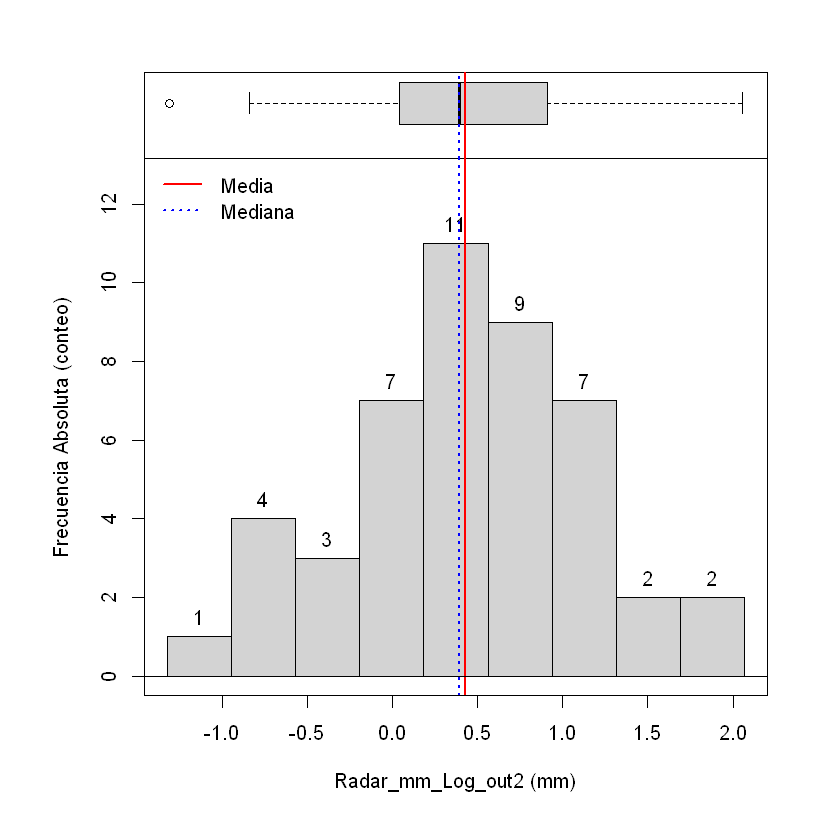

In [47]:
HistBoxplot(x=Radar_mm_Log_out2, mean = Radar_mm_Log_out2_Stat[5,2], median = Radar_mm_Log_out2_Stat[4,2], main ="", 
            xlab = "Radar_mm_Log_out2 (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

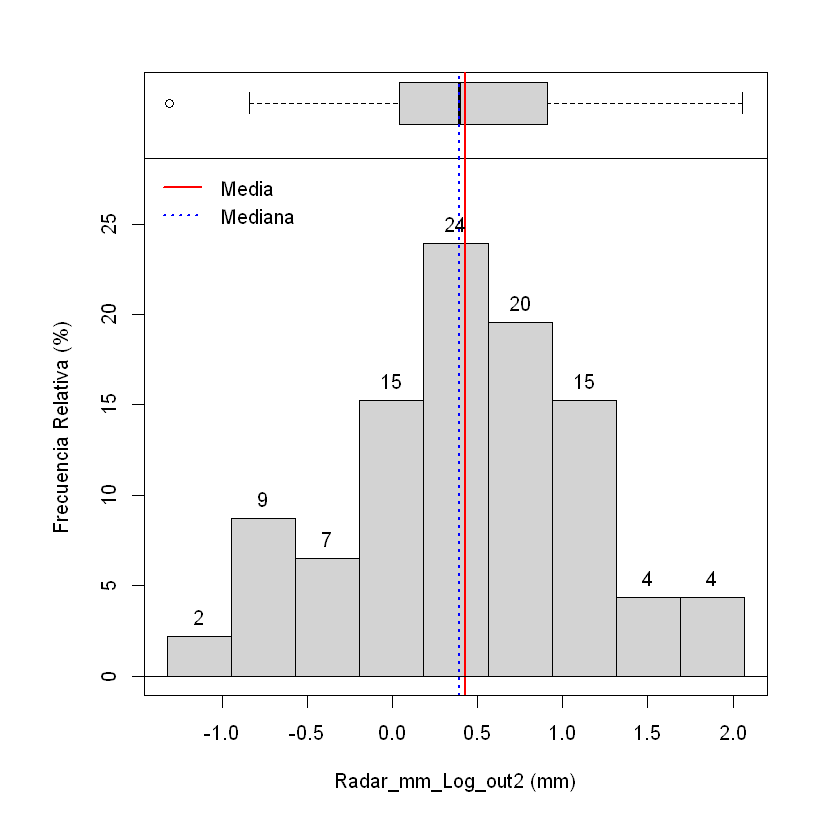

In [48]:
HistBoxplot(x=Radar_mm_Log_out2, mean = Radar_mm_Log_out2_Stat[5,2], median = Radar_mm_Log_out2_Stat[4,2], main ="", 
            xlab = "Radar_mm_Log_out2 (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

La diferencia entre la media y la mediana de la transformación logarítmica quitando los valores atípicos detectados pasó de 0.0313 a 0.0351, es decir, aumentó el valor, sin ser significativo este aumento, con lo cual podemos considerar que hacer el segundo retiro de valores atípicos es innecesario.

### Análisis estadístico univariado para los datos obtenidos de pluviómetros (Pluv_mm).

Ahora se hace el mismo análisis estadístico a los datos obtenidos de los pluviómetros (Pluv_mm). Empezamos obteniendo los valores estadísticos.

In [49]:
Pluv_mm_Stat <- Estadisticas(Pluv_mm)
Pluv_mm_Stat

Statistics         Values 
muestras   n                  50.0000
minimos    Minimum             0.2500
cuantiles1 1st. Quartile       0.3125
medianas   Median              1.0000
medias     Mean                1.4700
cuantiles3 3rd. Quartile       1.9375
maximos    Maximum             7.7500
rangos     Rank                7.5000
rangosInt  Interquartile Rank  1.6250
varianzas  Variance            2.5756
desvs      Standard Deviation  1.6049
CVs        Variation Coeff.    1.0917
simetrias  Skewness            2.4693
curtosiss  Kurtosis           10.0542

Y su respectivo histograma.

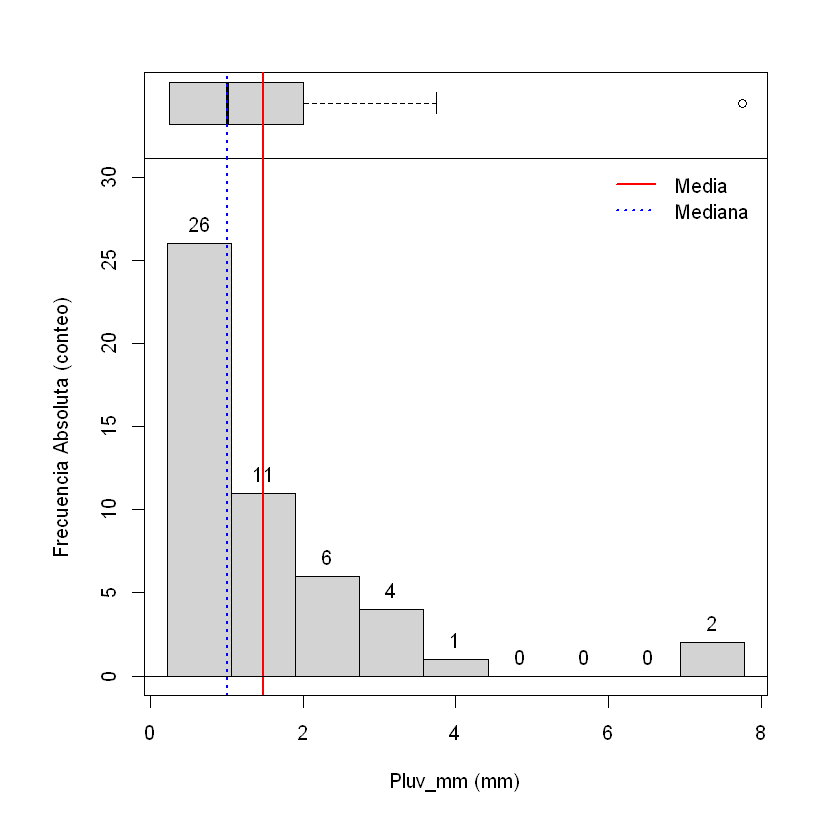

In [50]:
HistBoxplot(x=Pluv_mm, mean = Pluv_mm_Stat[5,2], median = Pluv_mm_Stat[4,2], main ="", 
            xlab = "Pluv_mm (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

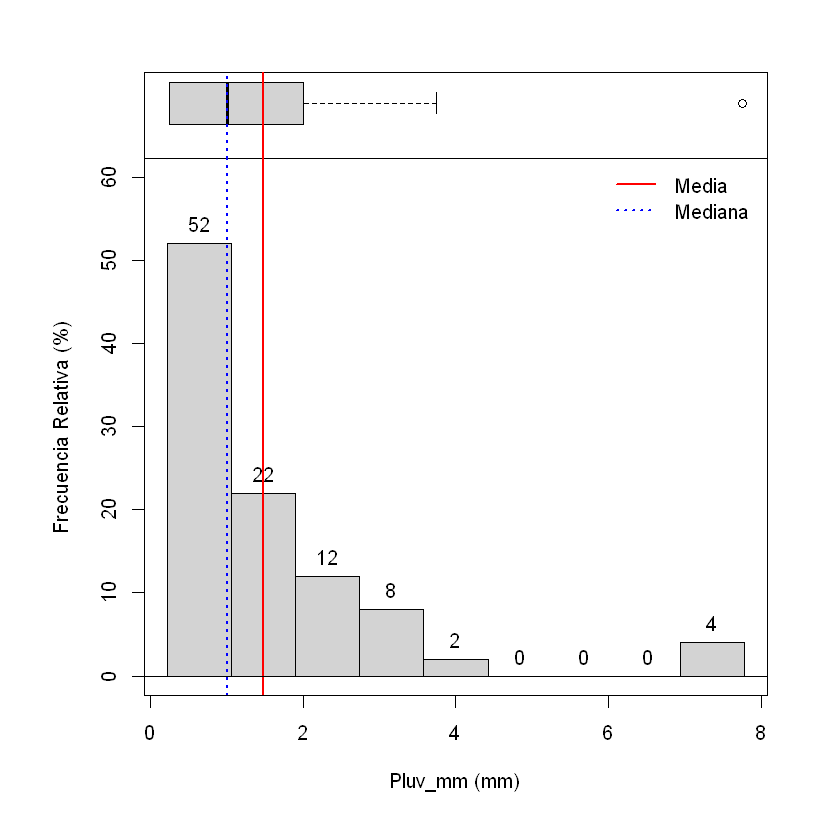

In [51]:
HistBoxplot(x=Pluv_mm, mean = Pluv_mm_Stat[5,2], median = Pluv_mm_Stat[4,2], main ="", 
            xlab = "Pluv_mm (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

Podemos notar que la diferencia entre la media y la mediana es de 0.47, lo cual nos indica que la variable es asimétrica positiva y el histograma nos confirma esta información.

$\textbf{Transformación logarítmica.}$

Analizando el histograma podemos notar un fuerte crecimiento en la parte izquierda, por lo tanto usaremos la transformación logarítmica.

In [52]:
Pluv_mm_Log <- log(Pluv_mm)
Pluv_mm_Log_Stat <- Estadisticas(Pluv_mm_Log)
Pluv_mm_Log_Stat

Statistics         Values  
muestras   n                   50.0000
minimos    Minimum             -1.3863
cuantiles1 1st. Quartile       -1.2130
medianas   Median               0.0000
medias     Mean                -0.0903
cuantiles3 3rd. Quartile        0.6598
maximos    Maximum              2.0477
rangos     Rank                 3.4340
rangosInt  Interquartile Rank   1.8728
varianzas  Variance             1.0004
desvs      Standard Deviation   1.0002
CVs        Variation Coeff.   -11.0754
simetrias  Skewness             0.1124
curtosiss  Kurtosis             2.0120

Los histogramas de la transformación logarítmica son los siguientes:

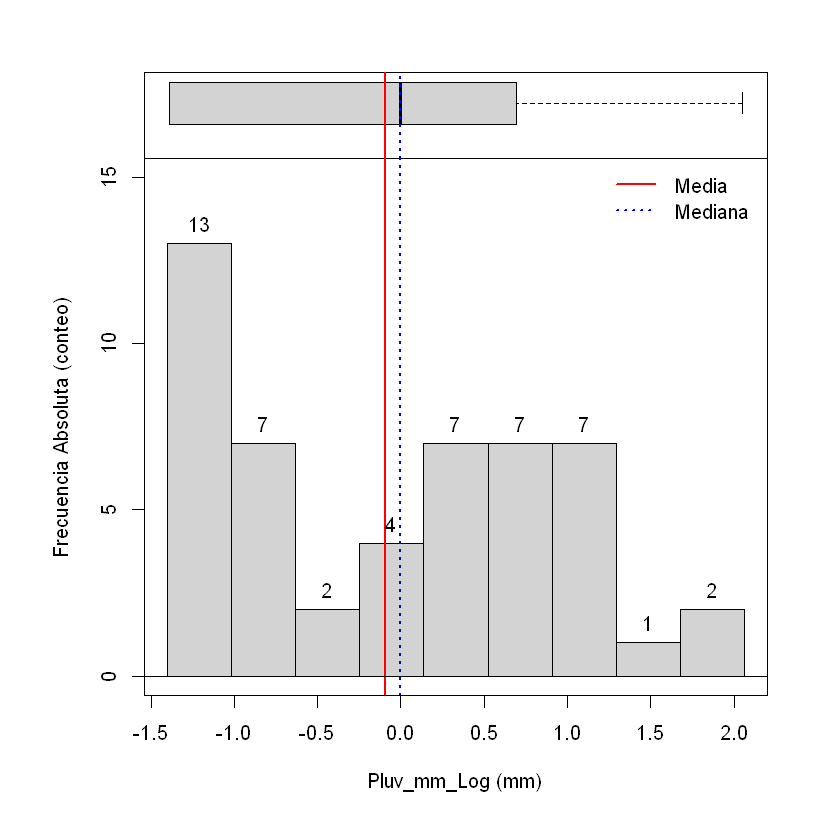

In [53]:
HistBoxplot(x=Pluv_mm_Log, mean = Pluv_mm_Log_Stat[5,2], median = Pluv_mm_Log_Stat[4,2], main ="", 
            xlab = "Pluv_mm_Log (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE,
            nbin = 9)

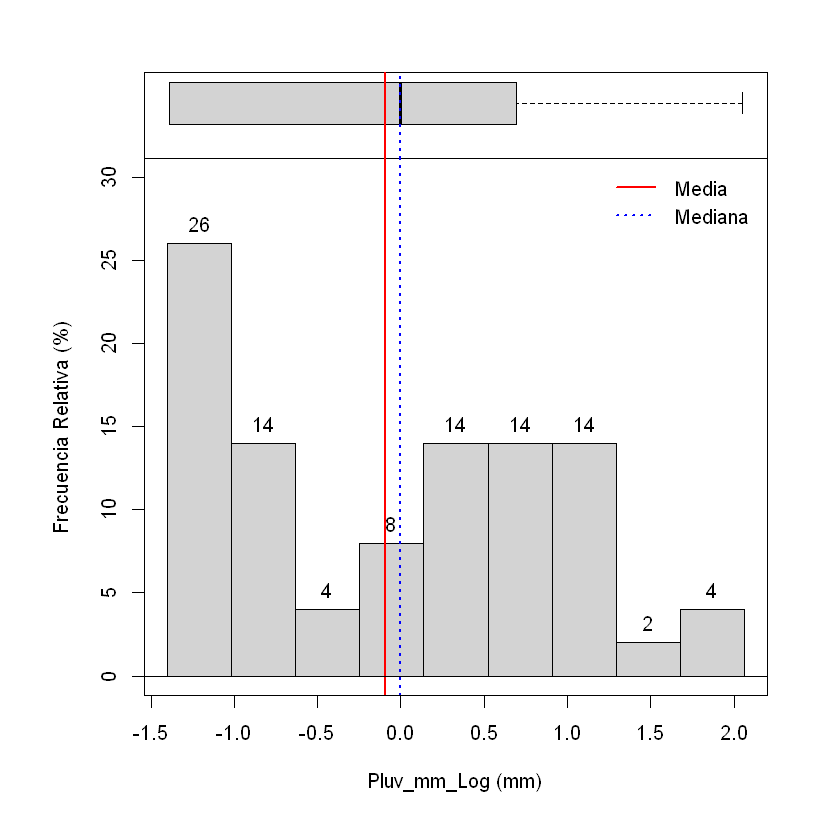

In [54]:
HistBoxplot(x=Pluv_mm_Log, mean = Pluv_mm_Log_Stat[5,2], median = Pluv_mm_Log_Stat[4,2], main ="", 
            xlab = "Pluv_mm_Log (mm)", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE,
            nbin = 9)

La diferencia entre la media y la mediana pasó de 0.47 a 0.09, lo cual es bajo. El boxplot no muestra valores atípicos, sin embargo, nos aseguraremos que esto sea cierto usando la función "OutliersPos".

In [55]:
Pluv_mm_Log_outliers<-OutliersPos(Pluv_mm_Log)
print(Pluv_mm_Log_outliers)

numeric(0)


No se encontraron valores atípicos, por lo tanto, aquí se termina el análisis univariado de esta variable.

## Análisis estadístico bivariado.

Como pudimos notar durante el análisis exploratorio univariado, necesitamos de dos elementos para interpretar las características estadísticas de una variable: un histograma y una tabla con los valores estadísticos. Con el caso del análisis exploratorio bivariado necesitamos un diagrama de dispersión o scatterplot y los grados de dependencia.

Un diagrama de dispersión es una gráfica compuesta por pares de valores de dos variables aleatorias $(x_i,y_i)$.

Los grados de dependencia se miden usando el coeficiente de correlación lineal de Pearson:

$$\rho_{XY}=\frac{\sigma_{XY}}{\sigma_{X}\sigma_{Y}}==\frac{Cov(X,Y)}{\sqrt(Var(X)Var(Y))}$$

El coeficiente de correlación de Spearman:

$$\rho=1-\frac{6\sum{D^2}}{N(N^2-1)}$$

Y el coeficiente de correlación de Kendall:

$$\tau=\frac{{\textit{𝑛ú𝑚𝑒𝑟𝑜 𝑑𝑒 𝑝𝑎𝑟𝑒𝑠 𝑐𝑜𝑛𝑐𝑜𝑟𝑑𝑎𝑛𝑡𝑒𝑠−𝑛ú𝑚𝑒𝑟𝑜 𝑑𝑒 𝑝𝑎𝑟𝑒𝑠 𝑑𝑖𝑠𝑐𝑜𝑟𝑑𝑎𝑛𝑡𝑒𝑠}}}{\bigl(\begin{smallmatrix}n\\ 2\end{smallmatrix}\bigr)}$$

### Cálculo de grados de dependencia

Para calcular estos grados de dependencia lo hacemos de la siguiente forma:

In [56]:
cor(Radar_mm , Pluv_mm, method = "pearson")

[1] 0.9410485

In [57]:
cor(Radar_mm , Pluv_mm, method = "spearman")

[1] 0.8480453

In [58]:
cor(Radar_mm , Pluv_mm, method = "kendall")

[1] 0.7187151

Respecto al coeficiente de Pearson, su valor es de 0.9410, lo cual podemos considerar como cuasi-lineal. Sin embargo, los valores de la correlación de Spearman (0.8480) y Kendall (0.7187) indican que el modelo no es cuasi-lineal, por lo que es posible que la dependencia lineal esté alterada por valores atípicos.

### Diagrama de dispersión.

El diagrama de dispersión se grafica de la siguiente manera:

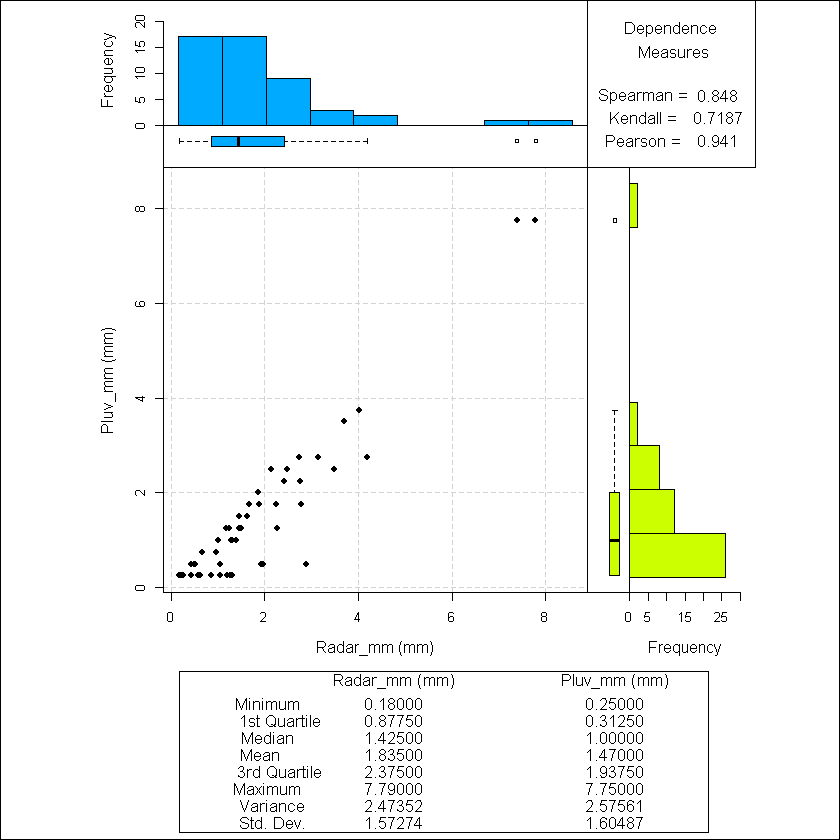

In [59]:
ScatterPlot(Radar_mm , Pluv_mm, 9, 
            Xmin = Radar_mm_Stat[2,2], Xmax = Radar_mm_Stat[7,2], 
            Ymin = Pluv_mm_Stat[2,2],Ymax = Pluv_mm_Stat[7,2], 
            XLAB = "Radar_mm (mm)", YLAB = "Pluv_mm (mm)")

Podemos notar en el gráfico de dispersión que hay dos pares atípicos localizados en la esquina superior derecha, los cuales podrían ser la causa de la cuasi-linearidad que indica la medida de dependencia de Pearson. Estos valores coinciden con los valores atípicos que se detectaron durante el análisis univariado, Sin embargo, es importante señalar que los valores atípicos encontrados en el análisis exploratorio univariado no son necesariamente valores atípicos en el análisis exploratorio bivariado, se debe evaluar la conveniencia de retirar cada par.

### Analisis de regresión lineal.

Como se mencionó en clase, la regresión trata de establecer relaciones funcionales entre variables aleatorias, en este caso, la relación se establece con una recta. Para hacer el análisis necesitamos de los parámetros de la recta y el análisis de residuos.

El grafico de dispersión con línea de regresión se genera de la siguiente forma:

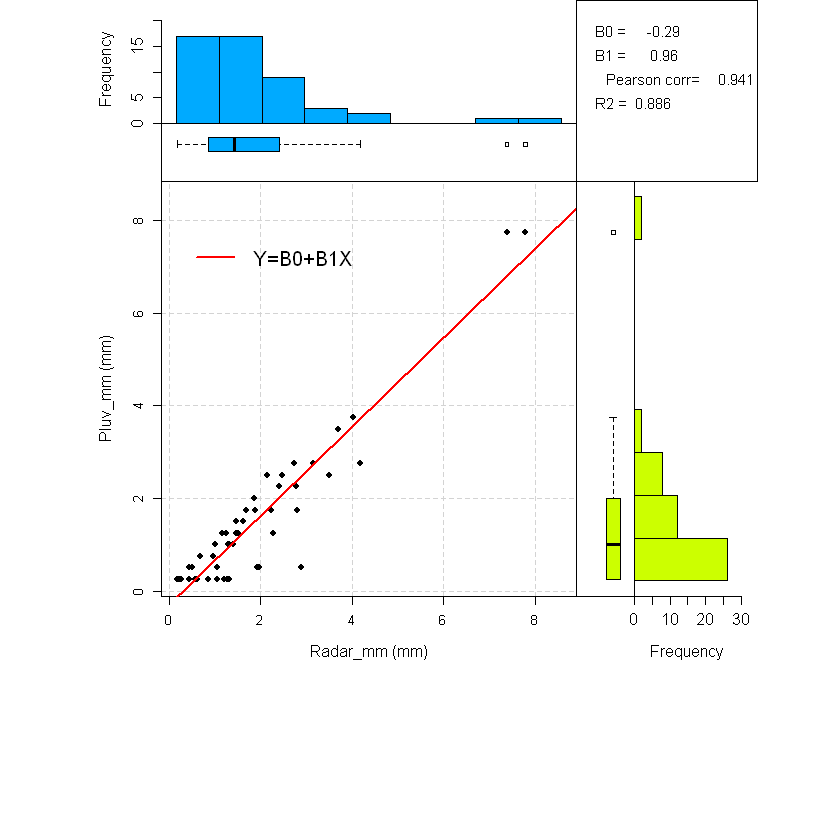

In [60]:
scaterplotReg(Radar_mm , Pluv_mm, 9, 
              Xmin = Radar_mm_Stat[2,2], Xmax = Radar_mm_Stat[7,2], 
              Ymin = Pluv_mm_Stat[2,2],Ymax = Pluv_mm_Stat[7,2], 
              XLAB = "Radar_mm (mm)", YLAB = "Pluv_mm (mm)")

De este grafico nos interesa saber los valores de la regresión lineal y su error cuadratico. Para hacer la regresión lineal usamos la función "linear_regression":

In [61]:
# Linear Regression
X<-Radar_mm
Y<-Pluv_mm

linear_regression <-lm(Y ~ X)

# Linear Regression Parameters
B0 <- linear_regression$coefficients[1]
B0
B1 <- linear_regression$coefficients[2]
B1

(Intercept) 
  -0.292099

X 
0.9602719

Ya que tenemos los parámetros de la recta $B_0$ y $B_1$, hacemos el calculo de los residuos.

In [62]:
# Regression line and Residual Calculation
Y_Regression <- linear_regression$fitted.values
Y_Residual <- linear_regression$residuals

Ya que tenemos calculados los residuos necesitamos obtener sus valores estadísticos.

In [63]:
Y_Residual_Stat<-Estadisticas(Y_Residual)
write.csv(Y_Residual_Stat , file = "Results/AED/Pluv_mm_Residual_Stat.csv")
Y_Residual_Stat

Statistics         Values       
muestras   n                   5.000000e+01
minimos    Minimum            -1.973500e+00
cuantiles1 1st. Quartile      -1.988000e-01
medianas   Median              1.562000e-01
medias     Mean                0.000000e+00
cuantiles3 3rd. Quartile       3.552000e-01
maximos    Maximum             9.457000e-01
rangos     Rank                2.919200e+00
rangosInt  Interquartile Rank  5.540000e-01
varianzas  Variance            2.947000e-01
desvs      Standard Deviation  5.429000e-01
CVs        Variation Coeff.   -2.318152e+17
simetrias  Skewness           -1.347400e+00
curtosiss  Kurtosis            5.138200e+00

Y tambien necesitamos obtener el histograma de estos residuos.

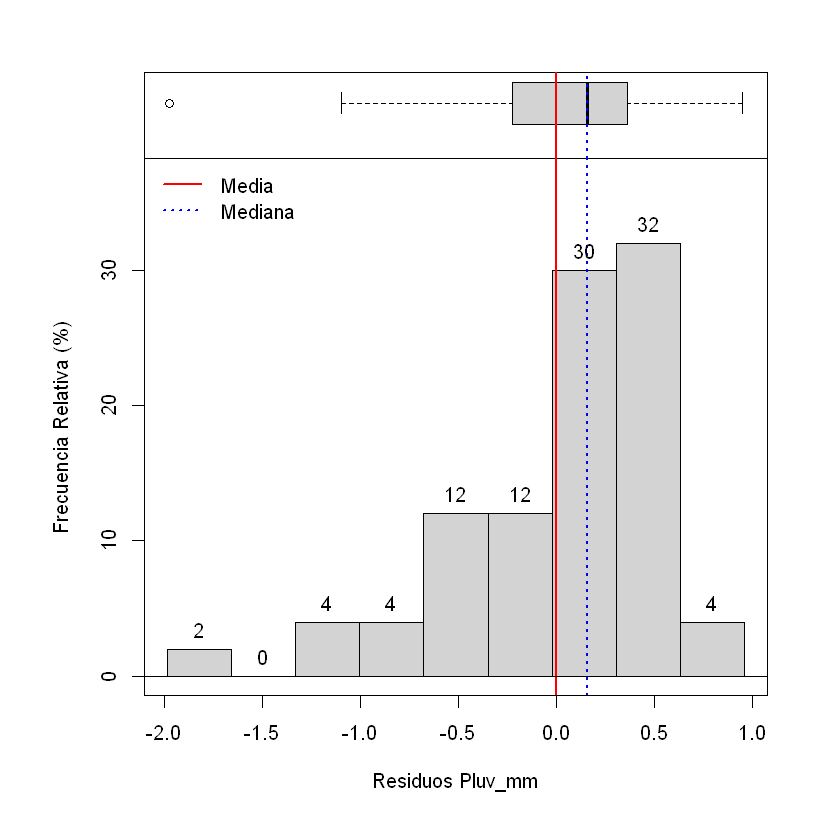

In [64]:
HistBoxplot(x=Y_Residual, mean = Y_Residual_Stat[5,2], median = Y_Residual_Stat[4,2], main ="", 
            xlab = "Residuos Pluv_mm", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE )

Si analizamos los valores estadísticos y el histograma de los residuos, podemos notar que el valor esperado es de 0, su varianza es de 0.2947 y la diferencia entre la media y la mediana es de 0.1562, lo cual nos indica que tiene asimetría negativa, por lo tanto, los residuos no cumplen con todas las condiciones que demanda la regresión lineal.

Warning message in hist.default(data, breaks = breaks, plot = FALSE, ...):
"argument 'col' is not made use of"


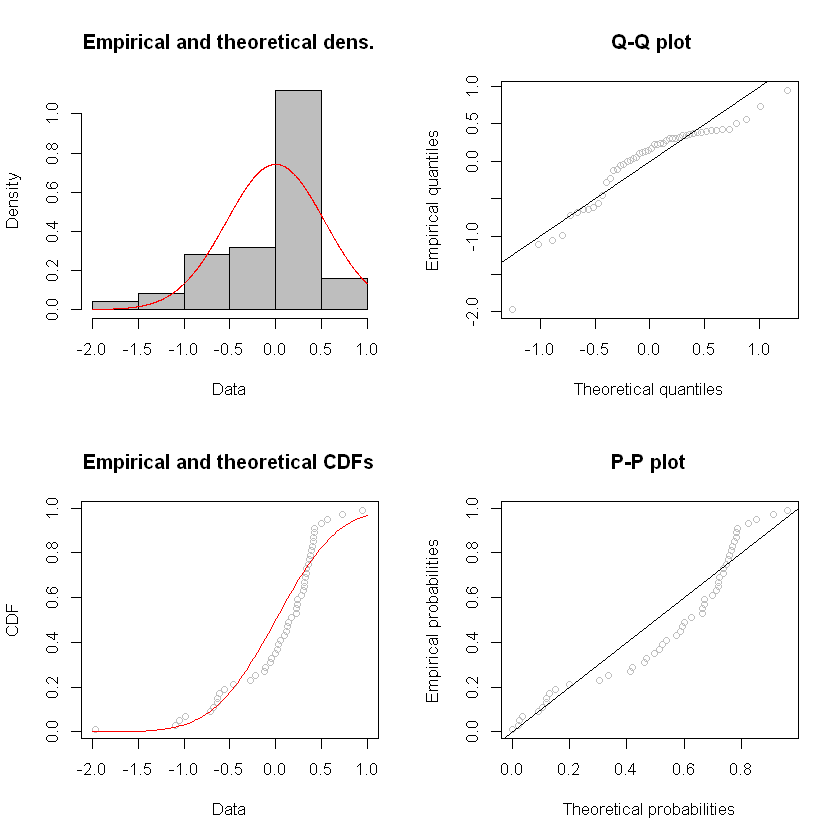

In [65]:
FitDistr2_Residual_normal<-FitDistribution(data = Y_Residual, DISTR="norm", BREAKS = "Sturges", col = "gray",  DistName = "Normal")

Para confirmar que los residuos no cumplen con las condiciones de la regresión lineal podemos sobreponer el histograma con la distribución normal (figura superior izquierda), ahí podemos ver que una de las barras del histograma sobrepasa a la función de distribución. El grafico Q-Q plot (figura superior derecha) también muestra que solo unas pocas muestras están en la recta. La grafica comparativa entre las funciones de distribución acumulativas empírica y teórica (figura inferior izquierda) no muestran un buen ajuste Y en el caso del grafico P-P plot (figura inferior derecha) solo las muestras de la esquina inferior izquierda y unas pocas de la parte central se posicionan cerca de la recta.

Ahora debemos aplicar un test de normalidad, en este caso tenemos dos opciones: hipótesis de Kolmogorov-Smirnov y la hipótesis de Anderson-Darling.

La hipótesis de Kolmogorov-Smirnov se usa para contrastar la hipótesis de normalidad, el estadístico de prueba es la máxima diferencia:

$$D=máx|F_n(x)-F_{va}(x)|$$

Donde $F_n(x)$ es la función de distribución paramétrica, en este caso la función normal. Y $F_{va}(x)$ es la función de la variable aleatoria.

La hipótesis de Anderson-Darling es una prueba no paramétrica que se basa en la comparación de las muestras $\textbf{Y}$ y la función de distribución de probabilidad teórica $\textbf{F}$. Su fórmula es:

$$S=\sum_{k=1}^{N}\frac{2k-1}{N}\left[ln(F(Y_k))+ln(1-F(Y_{N+1-k}))\right]$$

El valor p es una probabilidad que mide la evidencia en contra de la hipótesis nula. Un valor p más pequeño proporciona una evidencia más fuerte en contra de la hipótesis nula. esta hipotesis se usa para determinar si los datos siguen una distribución normal.

Si $p\leq a$ donde a es el nivel de significancia la decisión es rechazar la hipótesis nula y concluir que sus datos no siguen una distribución normal.

Si $p>a$ donde a es el nivel de significancia la decisión es no rechazar la hipótesis nula y concluir que sus datos no tiene suficiente evidencia para concluir que los datos no siguen una distribución normal.

In [66]:
FD_HT_Residual_normal<-FitDistr2_Residual_normal$x
FD_HT_Residual_normal

Nombre             Nivel de significancia P-valor Estad?stico Decisi?n     
1 Kolmogorov-Smirnov 0.05                   0.136   0.1605      No rechazo H0
2 Anderson-Darling   0.05                   0.07826 2.13        No rechazo H0

Bajo la prueba de Kolmogorov-Smirnov podemos ver que la normalidad de los residuos es de no rechazo. Mientras que la prueba de Anderson-Darling no rechaza la hipótesis de normalidad. Sin embargo, los valores obtenidos de estas pruebas son muy cercanos al nivel de significancia, por lo que podríamos reforzar la evidencia de no normalidad de la variable.

In [67]:
FD_FP_Residual_normal<-FitDistr2_Residual_normal$y
FD_FP_Residual_normal

Normal       
Media                -2.341877e-18
Desviaci?n est?ndar   5.374263e-01
M?xima Verosimilitud -3.989875e+01
AICC                  8.379750e+01

Los siguientes gráficos son los mismos que se analizaron en el vector "FitDistr2_Residual_normal", tenemos el histograma la funcion de distribución normal.

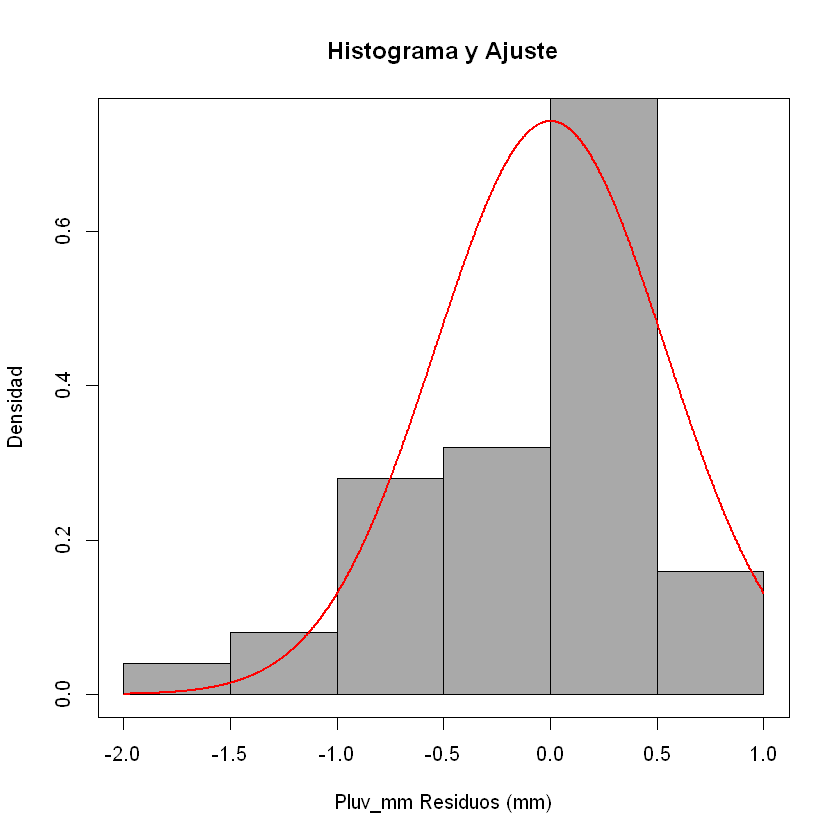

In [68]:
PARA_Residual_normal <- list(mean = as.numeric(FD_FP_Residual_normal[1,1]), sd = as.numeric(FD_FP_Residual_normal[2,1]))
HistModel(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, breaks = "Sturges", freq = FALSE, main ="Histograma y Ajuste", xlab = "Pluv_mm Residuos (mm)", 
          ylab = "Densidad", colCurve =  "red", col = "darkgray")

Graficamos su función de distribución acumulativa.

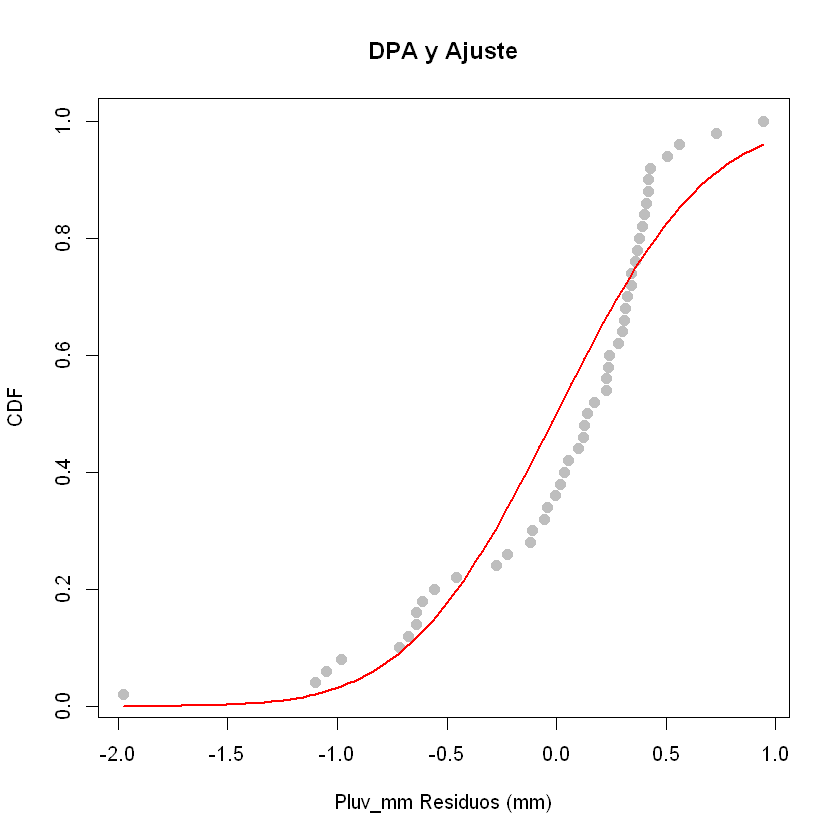

In [69]:
CDF(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "DPA y Ajuste", xlab = "Pluv_mm Residuos (mm)", 
    lcol = "red", lwd = 2)

El Grafico cuantil-cuantil (Q-Q plot).

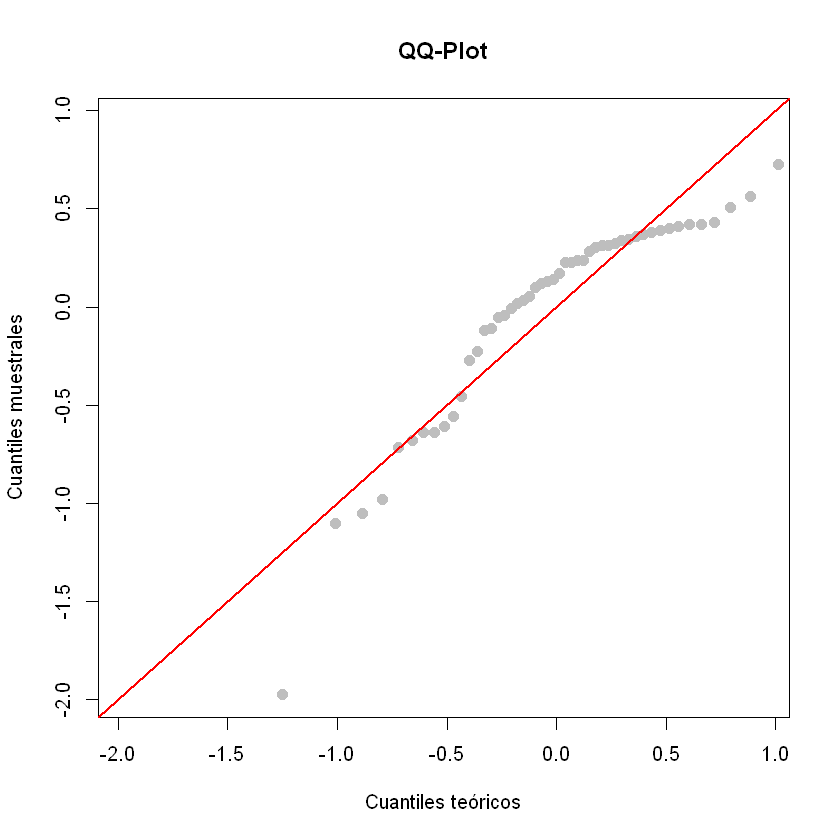

In [70]:
QQplot(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "QQ-Plot", xlab = "Cuantiles teóricos", 
       lcol = "red", lwd = 2)

El Grafico percentil-percentil (P-P plot).

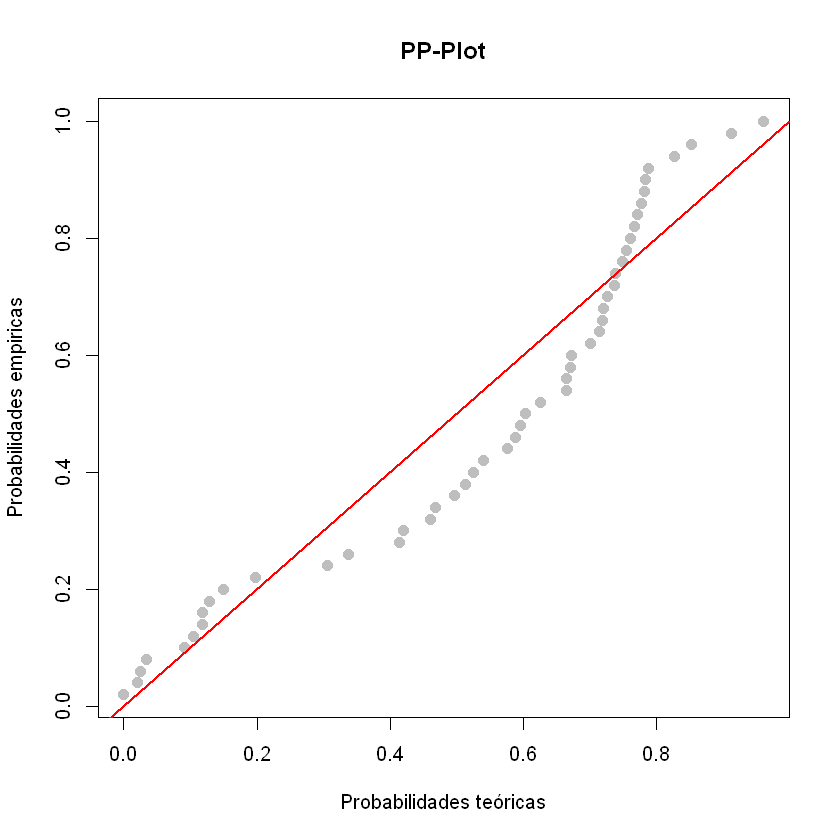

In [71]:
PPplot(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "PP-Plot", xlab = "Probabilidades teóricas", 
       lcol = "red", lwd = 2)

### Analisis bivariado: Y vs Y residual.

Ahora necesitamos evaluar si los valores obtenidos del pluviómetro tienen una relación con los residuos, para esto necesitamos el gráfico de dispersión. El cual generamos de la siguiente forma:

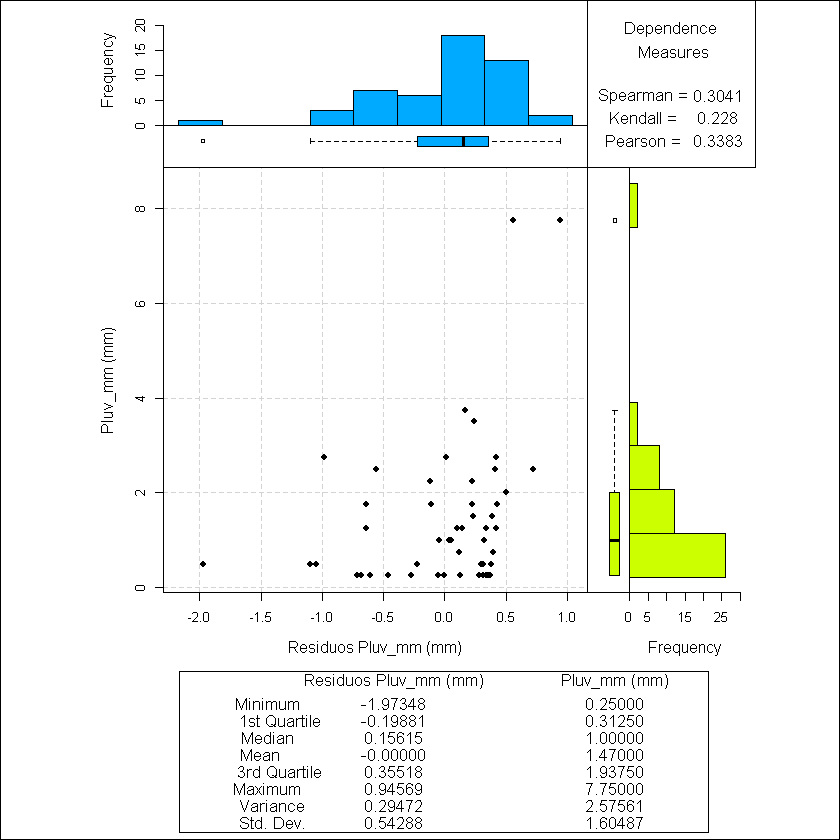

In [72]:
X<-Y_Residual   # Y_Residual is the independent variable

Y<-Pluv_mm      # Pluv_mm is the dependent variable

ScatterPlot(X, Y, 9, 
           Xmin = Y_Residual_Stat[2,2], Xmax = Y_Residual_Stat[7,2], 
           Ymin = Pluv_mm_Stat[2,2],Ymax = Pluv_mm_Stat[7,2], XLAB = "Residuos Pluv_mm (mm)", YLAB = "Pluv_mm (mm)")

En este grafico podemos notar que la medida de dependencia lineal de Pearson es de 0.339, Spearman es de 0.3041 y Kendall es de 0.228. Esto nos da como conclusión que la regresión lineal no cumple con la condición no correlación entre los residuos y las muestras del pluviómetro.

## Análisis estadístico bivariado con variables transformadas.

Ahora haremos el caso donde las variables (Radar_mm, Pluv_mm) tienen transformada logarítmica. Se escogió que las variables aleatorias usen esta transformación por los resultados que se tuvieron con la variable aleatoria de las muestras obtenidas con el pluviómetro.

### Grafico de dispersión.

En el grafico de dispersión podemos notar que las medidas de dependencia tienen los siguientes valores:

* Spearman (0.848)
* Kendall (0.7187)
* Pearson (0.8256)

Si comparamos las medidas de dependencia de este análisis estadístico bivariado con el anterior análisis podemos notar que el coeficiente de correlación de Pearson cambió de 0.9410 a 0.8256, mientras que los coeficientes de Spearman y Kendall se mantuvieron. esto muestra una gran ventaja al usar los coeficientes de Spearman y Kendall ya que no se ven afectados ante transformaciones.

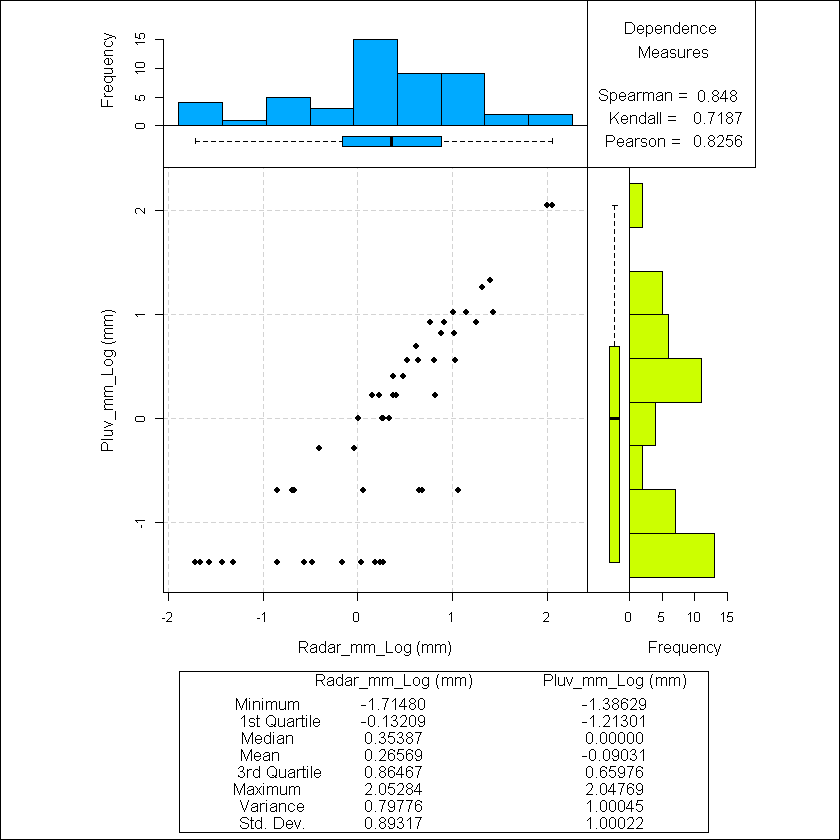

In [73]:
ScatterPlot(Radar_mm_Log , Pluv_mm_Log, 9, 
            Xmin = Radar_mm_Log_Stat[2,2], Xmax = Radar_mm_Log_Stat[7,2], 
            Ymin = Pluv_mm_Log_Stat[2,2],Ymax = Pluv_mm_Log_Stat[7,2], 
            XLAB = "Radar_mm_Log (mm)", YLAB = "Pluv_mm_Log (mm)")

### Analisis de regresión lineal.

Ahora obtendremos los valores de la regresión lineal .

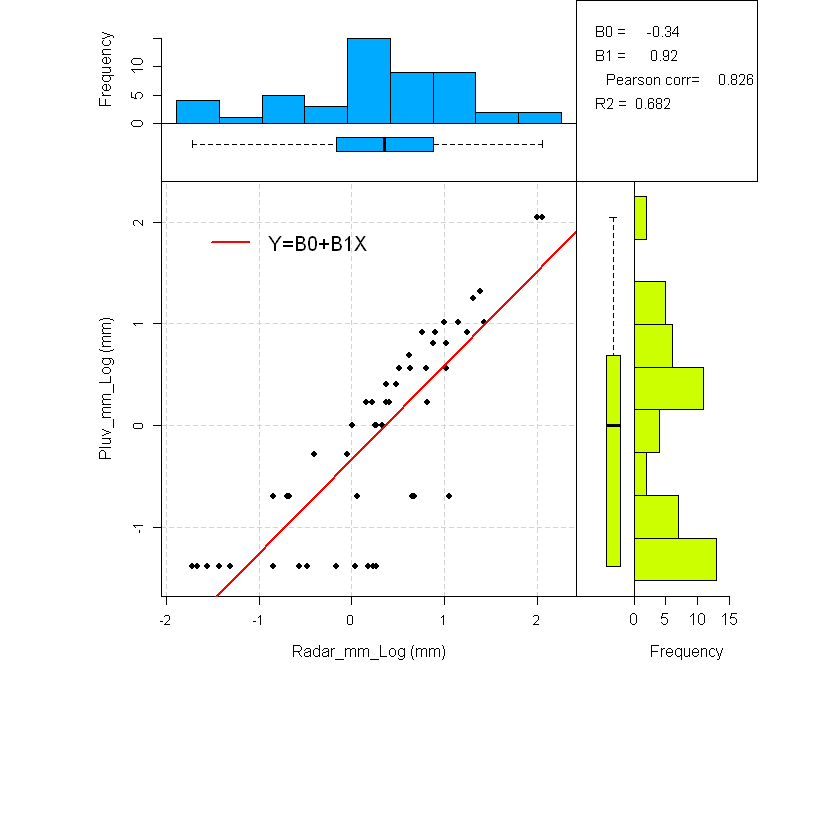

In [74]:
scaterplotReg(Radar_mm_Log , Pluv_mm_Log, 9, 
              Xmin = Radar_mm_Log_Stat[2,2], Xmax = Radar_mm_Log_Stat[7,2], 
              Ymin = Pluv_mm_Log_Stat[2,2],Ymax = Pluv_mm_Log_Stat[7,2], 
              XLAB = "Radar_mm_Log (mm)", YLAB = "Pluv_mm_Log (mm)")

los valores de la regresión lineal son:

In [75]:
# Linear Regression
X<-Radar_mm_Log
Y<-Pluv_mm_Log

linear_regression <-lm(Y ~ X)

# Linear Regression Parameters
B0 <- linear_regression$coefficients[1]
B0
B1 <- linear_regression$coefficients[2]
B1

(Intercept) 
 -0.3359718

X 
0.9246077

Procedemos a calcular los residuos

In [76]:
X<-Radar_mm_Log
Y<-Pluv_mm_Log

Y_Regression <- B0 + B1*X
Y_Residual <- Y-Y_Regression

Y calculamos sus estadígrafos e histograma.

In [77]:
# Regression line and Residual Calculation
Y_Regression <- linear_regression$fitted.values
Y_Residual <- linear_regression$residuals

Y_Residual_Stat<-Estadisticas(Y_Residual)
write.csv(Y_Residual_Stat , file = "Results/AED/Pluv_mm_Log_Residual_Stat.csv")
Y_Residual_Stat

Statistics         Values       
muestras   n                   5.000000e+01
minimos    Minimum            -1.335200e+00
cuantiles1 1st. Quartile      -1.624000e-01
medianas   Median              2.373000e-01
medias     Mean                0.000000e+00
cuantiles3 3rd. Quartile       3.924000e-01
maximos    Maximum             5.445000e-01
rangos     Rank                1.879700e+00
rangosInt  Interquartile Rank  5.548000e-01
varianzas  Variance            3.184000e-01
desvs      Standard Deviation  5.643000e-01
CVs        Variation Coeff.    1.454272e+17
simetrias  Skewness           -1.264700e+00
curtosiss  Kurtosis            3.224800e+00

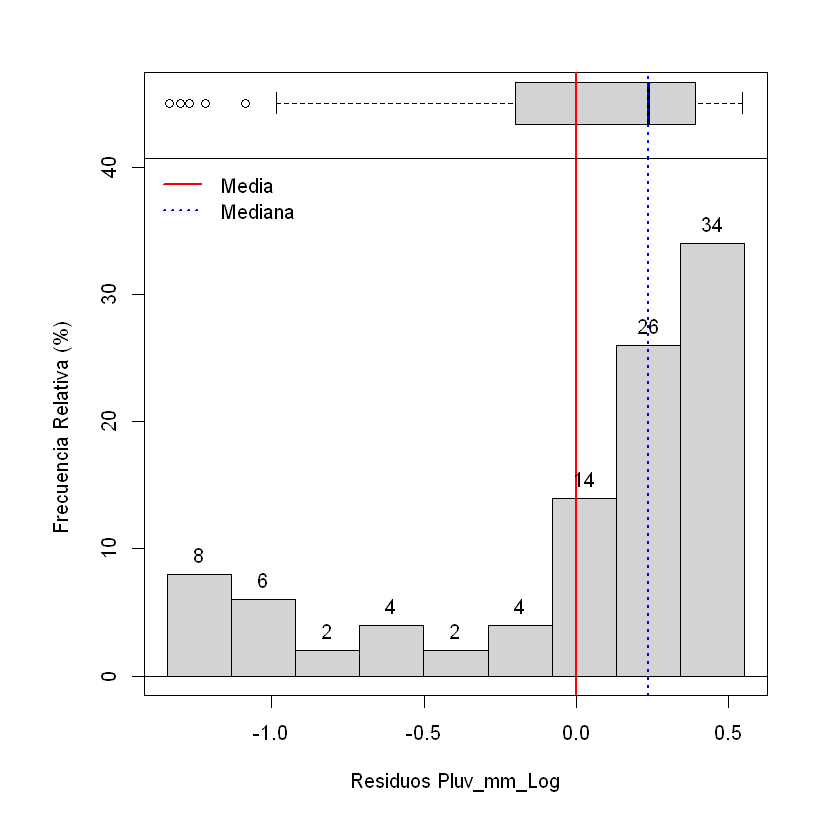

In [78]:
HistBoxplot(x=Y_Residual, mean = Y_Residual_Stat[5,2], median = Y_Residual_Stat[4,2], main ="", 
            xlab = "Residuos Pluv_mm_Log", ylab = "Frecuencia Relativa (%)", AbsFreq = FALSE, PercentFreq = TRUE )

En este caso podemos ver que el histograma presenta asimetría negativa con cuatro valores atípicos localizados a la izquierda. La diferencia entre la media y la mediana es de 0.2373, la cual es alta.

Warning message in hist.default(data, breaks = breaks, plot = FALSE, ...):
"argument 'col' is not made use of"


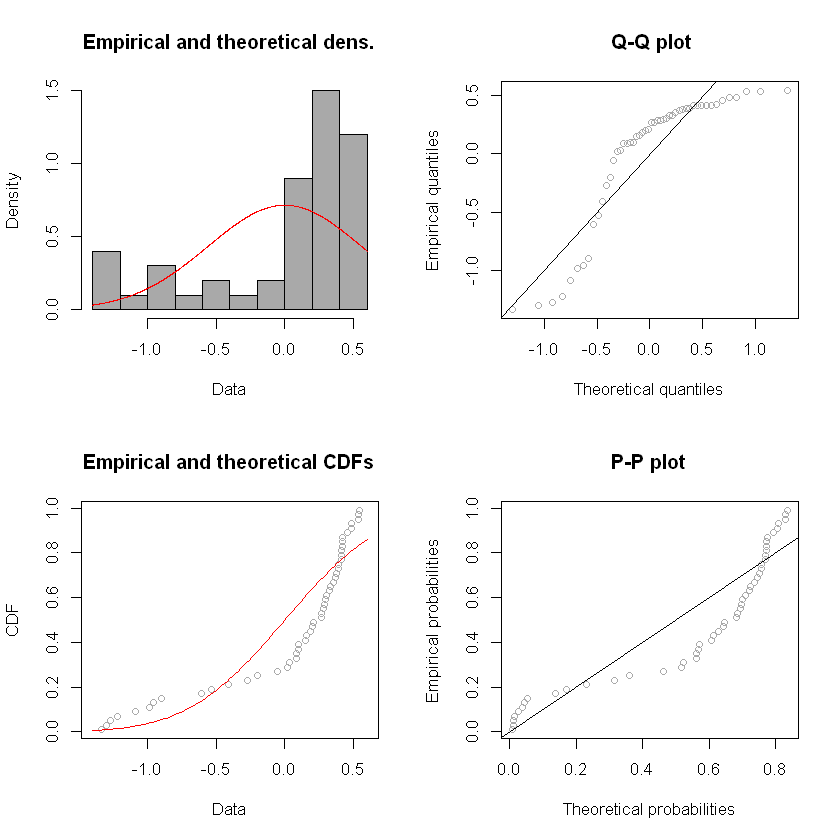

In [79]:
FitDistr2_Residual_normal<-FitDistribution(data = Y_Residual, DISTR="norm", BREAKS = "Sturges", col = "darkgray", DistName = "Normal")

Analizando los residuos podemos notar que el histograma con la distribución normal (figura superior izquierda) nos muestra que los residuos no son normales, en especial los valores localizados a los extremos del histograma. El grafico Q-Q plot (figura superior derecha) también muestra que pocas muestras están en la recta. La grafica comparativa entre las funciones de distribución acumulativas empírica y teórica (figura inferior izquierda) no muestra un buen ajuste y en el caso del grafico P-P plot (figura inferior derecha) hay muy pocas muestras cercanas a la recta. Con esto podemos concluir que los residuos no cumplen con los requisitos de la regresión lineal.

In [80]:
FD_HT_Residual_normal<-FitDistr2_Residual_normal$x
FD_HT_Residual_normal

Nombre             Nivel de significancia P-valor  Estad?stico Decisi?n  
1 Kolmogorov-Smirnov 0.05                   0.004802 0.2412      Rechazo H0
2 Anderson-Darling   0.05                   0.006424 4.282       Rechazo H0

Las pruebas de normalidad de Kolmogorov-Smirnov y Anderson-Darling confirman lo analizado con los graficos.

In [81]:
FD_FP_Residual_normal<-FitDistr2_Residual_normal$y
FD_FP_Residual_normal

Normal       
Media                 3.880360e-18
Desviaci?n est?ndar   5.586384e-01
M?xima Verosimilitud -4.183428e+01
AICC                  8.766856e+01

Graficamos las comparativas entre el histrograma y la funcion de distribución normal.

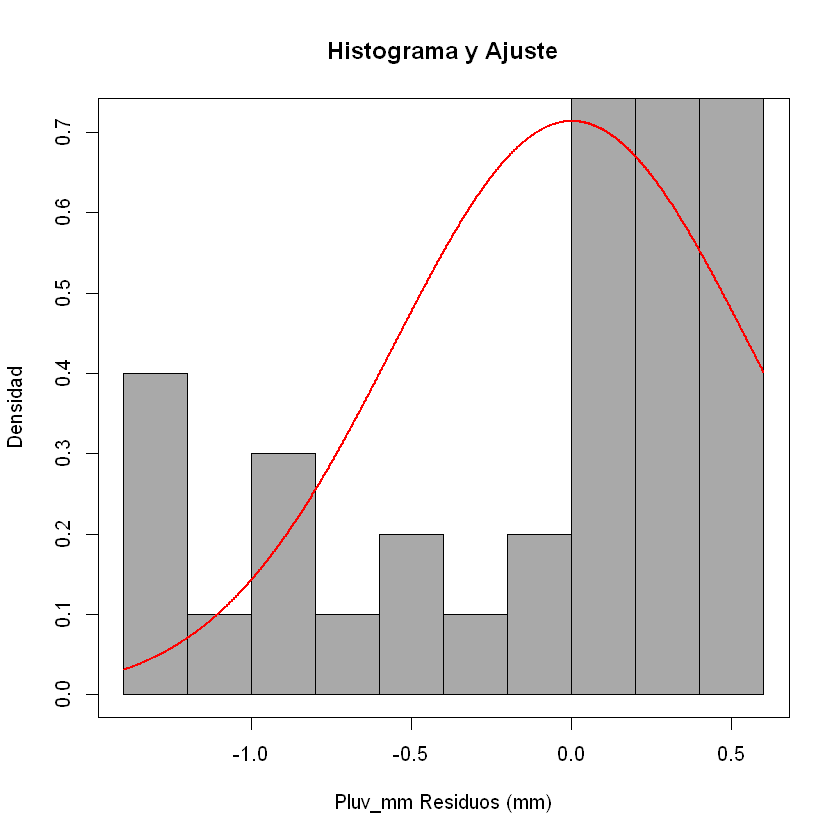

In [82]:
PARA_Residual_normal <- list(mean = as.numeric(FD_FP_Residual_normal[1,1]), sd = as.numeric(FD_FP_Residual_normal[2,1]))
HistModel(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, breaks = "Sturges", freq = FALSE, main ="Histograma y Ajuste", xlab = "Pluv_mm Residuos (mm)", 
          ylab = "Densidad", colCurve =  "red", col = "darkgray")

Graficamos las comparativas entre la función de distribución acumulativa empírica y la función de distribución acumulativa normal.

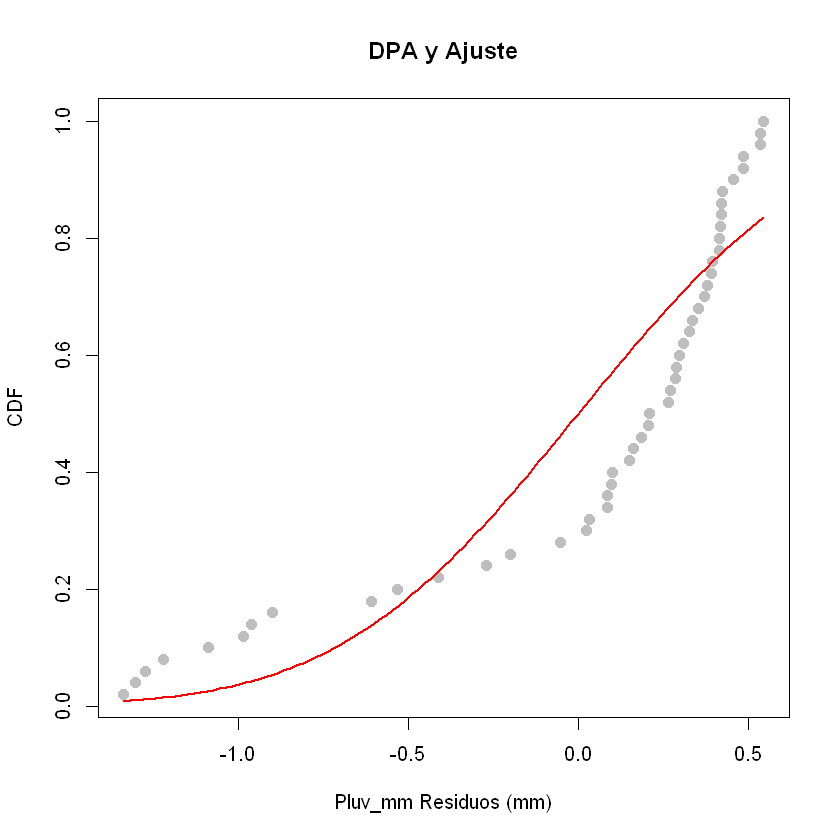

In [83]:
CDF(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "DPA y Ajuste", xlab = "Pluv_mm Residuos (mm)", 
    lcol = "red", lwd = 2)

El Grafico cuantil-cuantil (Q-Q plot). 

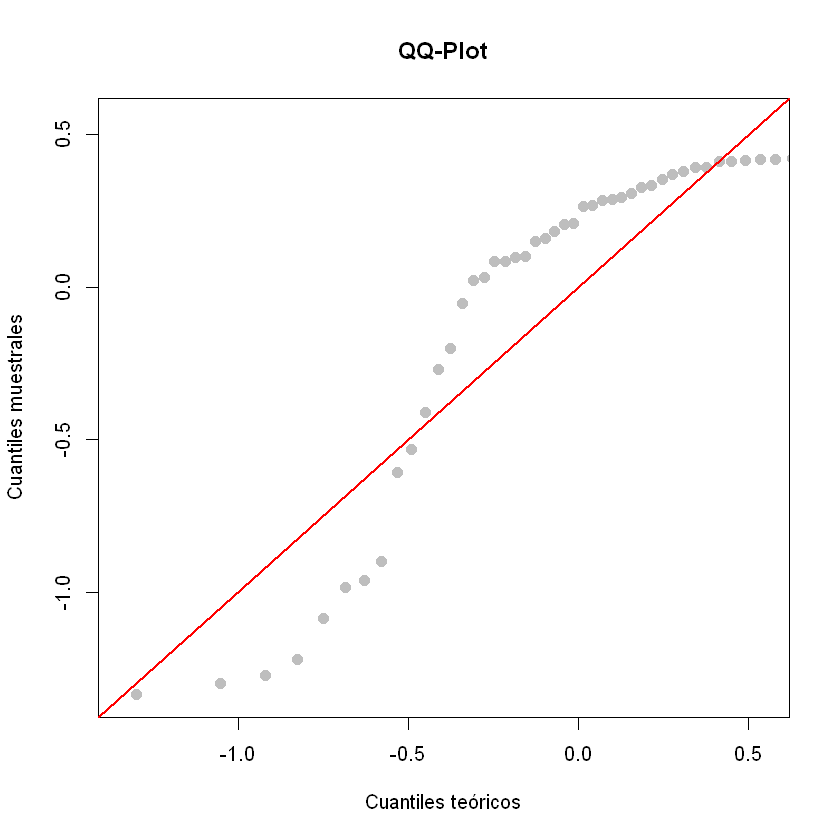

In [84]:
QQplot(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "QQ-Plot", xlab = "Cuantiles teóricos", 
       lcol = "red", lwd = 2)


El Grafico Percentil-percentil (P-P plot).

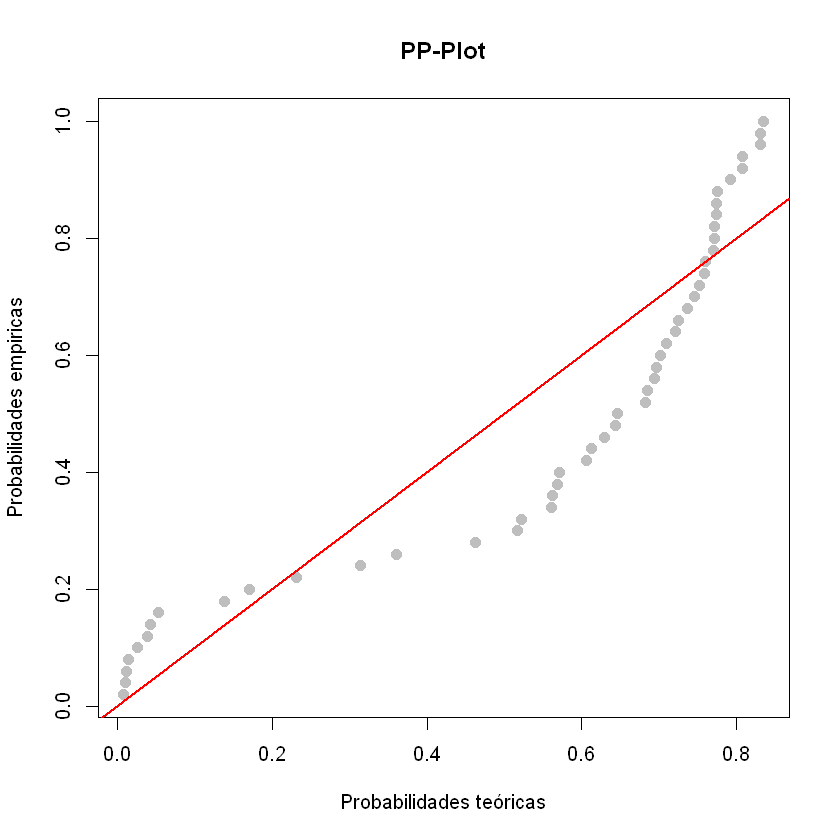

In [85]:
PPplot(x = Y_Residual, distr = "norm", para = PARA_Residual_normal, col = "gray", main = "PP-Plot", xlab = "Probabilidades teóricas", 
       lcol = "red", lwd = 2)

### Analisis bivariado: Y vs Y residual.


In [86]:
X<-Y_Residual     # Y_Residual es la variable invependiente
Y<-Pluv_mm_Log    # Pluv_mm_Log es la variable dependiente

Ahora Analizaremos la dependencia entre la variable aleatoria con transformación logarítmica y sus residuos. Se hace el grafico de dispersión.

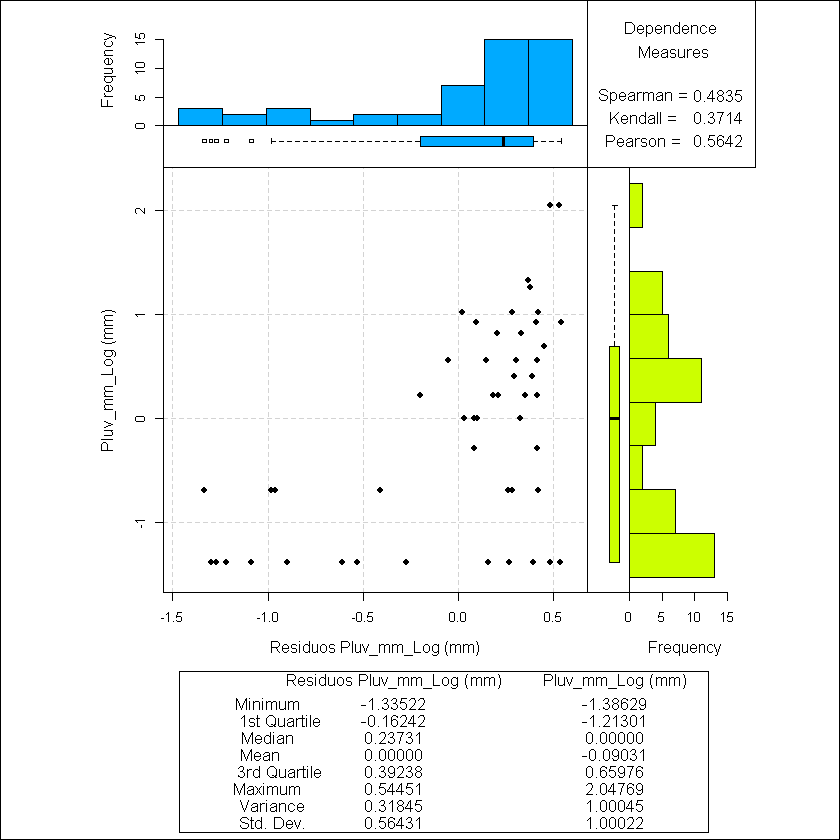

In [87]:
ScatterPlot(X, Y, 9, 
           Xmin = Y_Residual_Stat[2,2], Xmax = Y_Residual_Stat[7,2], 
           Ymin = Pluv_mm_Log_Stat[2,2],Ymax = Pluv_mm_Log_Stat[7,2], XLAB = "Residuos Pluv_mm_Log (mm)", YLAB = "Pluv_mm_Log (mm)")

El resultado de las medidas de dependencia muestra que la dependencia es considerable. Pearson tiene un valor de 0.5702, Spearman es de 0.4971 y Kendall es de 0.3818. Con esta última prueba podemos concluir que la regresión lineal usando las variables aleatorias transformadas no cumplió con ninguna de las condiciones.

Con el caso de las muestras obtenidas de los pluviómetros, podemos ver que los valores atípicos se localizan en los mismos lugares de los valores atípicos obtenidos del radar meteorológico, por lo que debemos tomar en cuenta esta información para el análisis variografico.

# Análisis variográfico.

Ahora que sabemos cuál es el comportamiento de las variables aleatorias y escogimos la mejor opción continuamos con el análisis variográfico.

## Análisis variográfico variable Radar_mm_Log

Al igual que el análisis exploratorio, necesitamos saber cómo están distribuidos los valores de la variable, para esto usamos la función "DEspacial". Esta función necesita saber las coordenadas (XCoord,YCoord) y la variable que usaremos que en este caso es la variable de los pluviómetros con transformada logarítmica (Pluv_mm_Log); cuando ejecutamos esta función obtenemos la siguiente imagen:

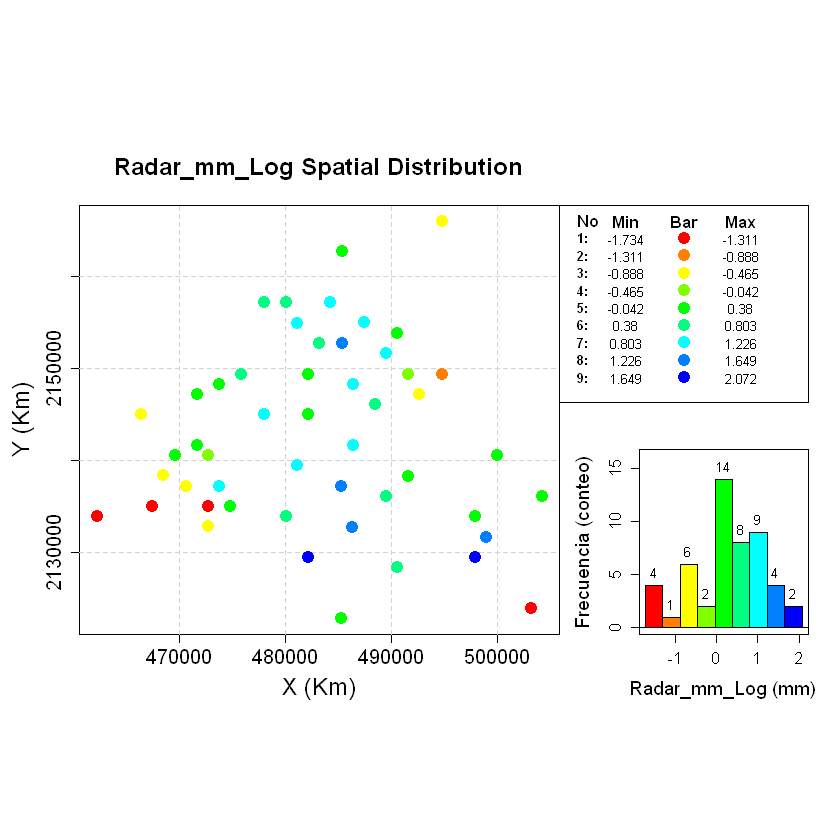

In [90]:
DEspacial(XCoord, YCoord, Radar_mm_Log,
          'X (Km)', 'Y (Km)', 'Radar_mm_Log (mm)', 'Radar_mm_Log Spatial Distribution')

El gráfico que obtenemos nos da la distribución espacial de las muestras con puntos de distintos colores, siendo los colores rojo y azul los valores extremos. A la derecha del grafico tenemos el histograma que por default tiene nueve intervalos (bins), si deseamos cambiar el número de intervalos debemos abrir el archivo que contiene la función DEspacial, el cual es DEspacial.R localizado en la carpeta "Functions", después deben ir a la línea 16 y cambiar el valor nbins como se muestra en la siguiente imagen:

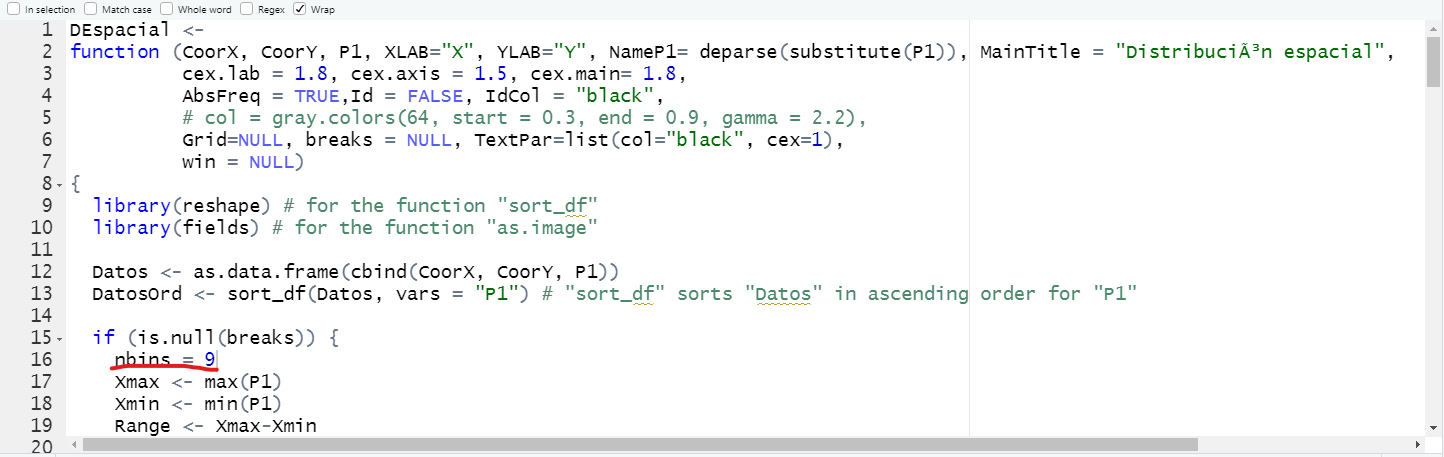

Sin embargo, deben considerar que el recuadro superior derecho está limitado a nueve intervalos, por lo tanto, solo mostrará los primeros nueve. Después de modificar la función guardamos el archivo y volvemos a cargar esa función al proyecto.


### Análisis de tendencia de la variable Radar_mm_Log.
Para determinar si la variable es estacionaria usamos dos fuentes de información: 

* Análisis de regresión de la mediana en la dirección X y en la dirección Y
* Estimar el variograma.

El gráfico de regresión de la mediana nos informa si existe algún indicio de tendencia siguiendo el siguiente criterio: 

* Si la regresión es paralela a la línea de la media entonces la variable no tiene tendencia
* Si la regresion no es paralela entonces la variable podría tener algún grado de tendencia. 

Cabe aclarar que esta prueba solo nos da indicios de la posible tendencia, mas no es determinante. El variograma es la prueba fuerte que nos indica si la variable tiene tendencia.

Para el análisis de regresión de la mediana usamos la función "GDirecciones", la cual necesita las coordenadas (XCoord, YCoord) y la variable a analizar, en este caso Radar_mm_Log.


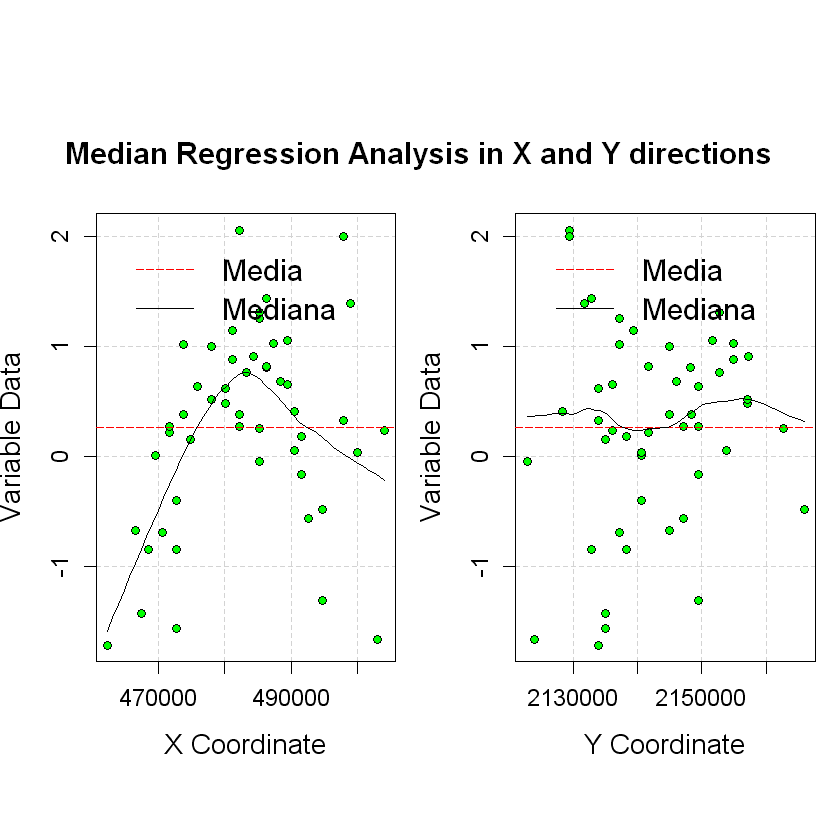

In [91]:
GDirecciones(XCoord, YCoord, Radar_mm_Log)

Analizando el resultado de la regresión podemos notar que en el eje de coordenadas X tiene una curva ascendente, llega a su punto más alto a la mitad del gráfico y después desciende, lo cual podemos considerar como un indicio de tendencia. Con el caso del eje de coordenadas Y vemos que su regresión es cercana a la línea del valor esperado lo cual nos indica que su nivel de tendencia es muy bajo. Esto lo confirmaremos cuando se estime los variogramas direccionales.

Para estimar el variograma experimental necesitamos:

* número de intervalos (lags)
* distancia mínima (DistMin)
* distancia máxima (DistMax)
* valor de intervalo (lag value)

Definimos el número de intervalos que deseamos usar. Si la distribución espacial de la variable esta muestreada en una malla regular, entonces usamos la información de dicha malla para definir el valor y numero de intervalo; de lo contrario hay que calcular la distancia máxima y mínima de las muestras. Para este caso el número que seleccionamos es 10.

In [92]:
N_lags<-10
N_lags

[1] 10

Calculamos la distancia mínima entre muestras usando la función "dist" y "min", el argumento "Data_File[,1:2]" indica que se está usando las coordenadas. La distancia mínima de este ejemplo es de 1525.79.

In [93]:
DistMin<-min(dist(Data_File[,1:2])) # Minimum distance in data
DistMin

[1] 1525.8

La distancia máxima entre muestras se calcula usando la función "dist" y "max", en este caso es de 45696.15

In [94]:
DistMax<-max(dist(Data_File[,1:2])) # Maximum distance in data
DistMax

[1] 45696.16

El valor de intervalo se calcula dividiendo entre dos el valor de la distancia máxima y después dividir el valor resultante entre el número de intervalos. En este caso el valor de intervalo es de 2284.8

In [95]:
lag_value<- (DistMax/2)/N_lags # DistMin
lag_value

[1] 2284.808

Ahora hay que comparar el valor de la distancia mínima (DistMin) con el valor de intervalo (lag_value). 

* Si el valor de intervalo calculado con (DistMax/2)/N_lags es menor a la distancia mínima entonces no usamos el valor de intervalo debido a que no hay pares que cumplan con esa distancia, en su lugar usamos el valor de la distancia mínima. 

* Si el valor del intervalo calculado con (DistMax/2)/N_lags es mayor a la distancia mínima, entonces podemos decidir cualquiera de los dos valores 


Ya que tenemos estos valores podemos estimar el variograma experimental adireccional, el cual tiene por dirección 0º y ángulo de tolerancia de 90º. De forma gráfica el cálculo del variograma se puede ver de la siguiente forma:

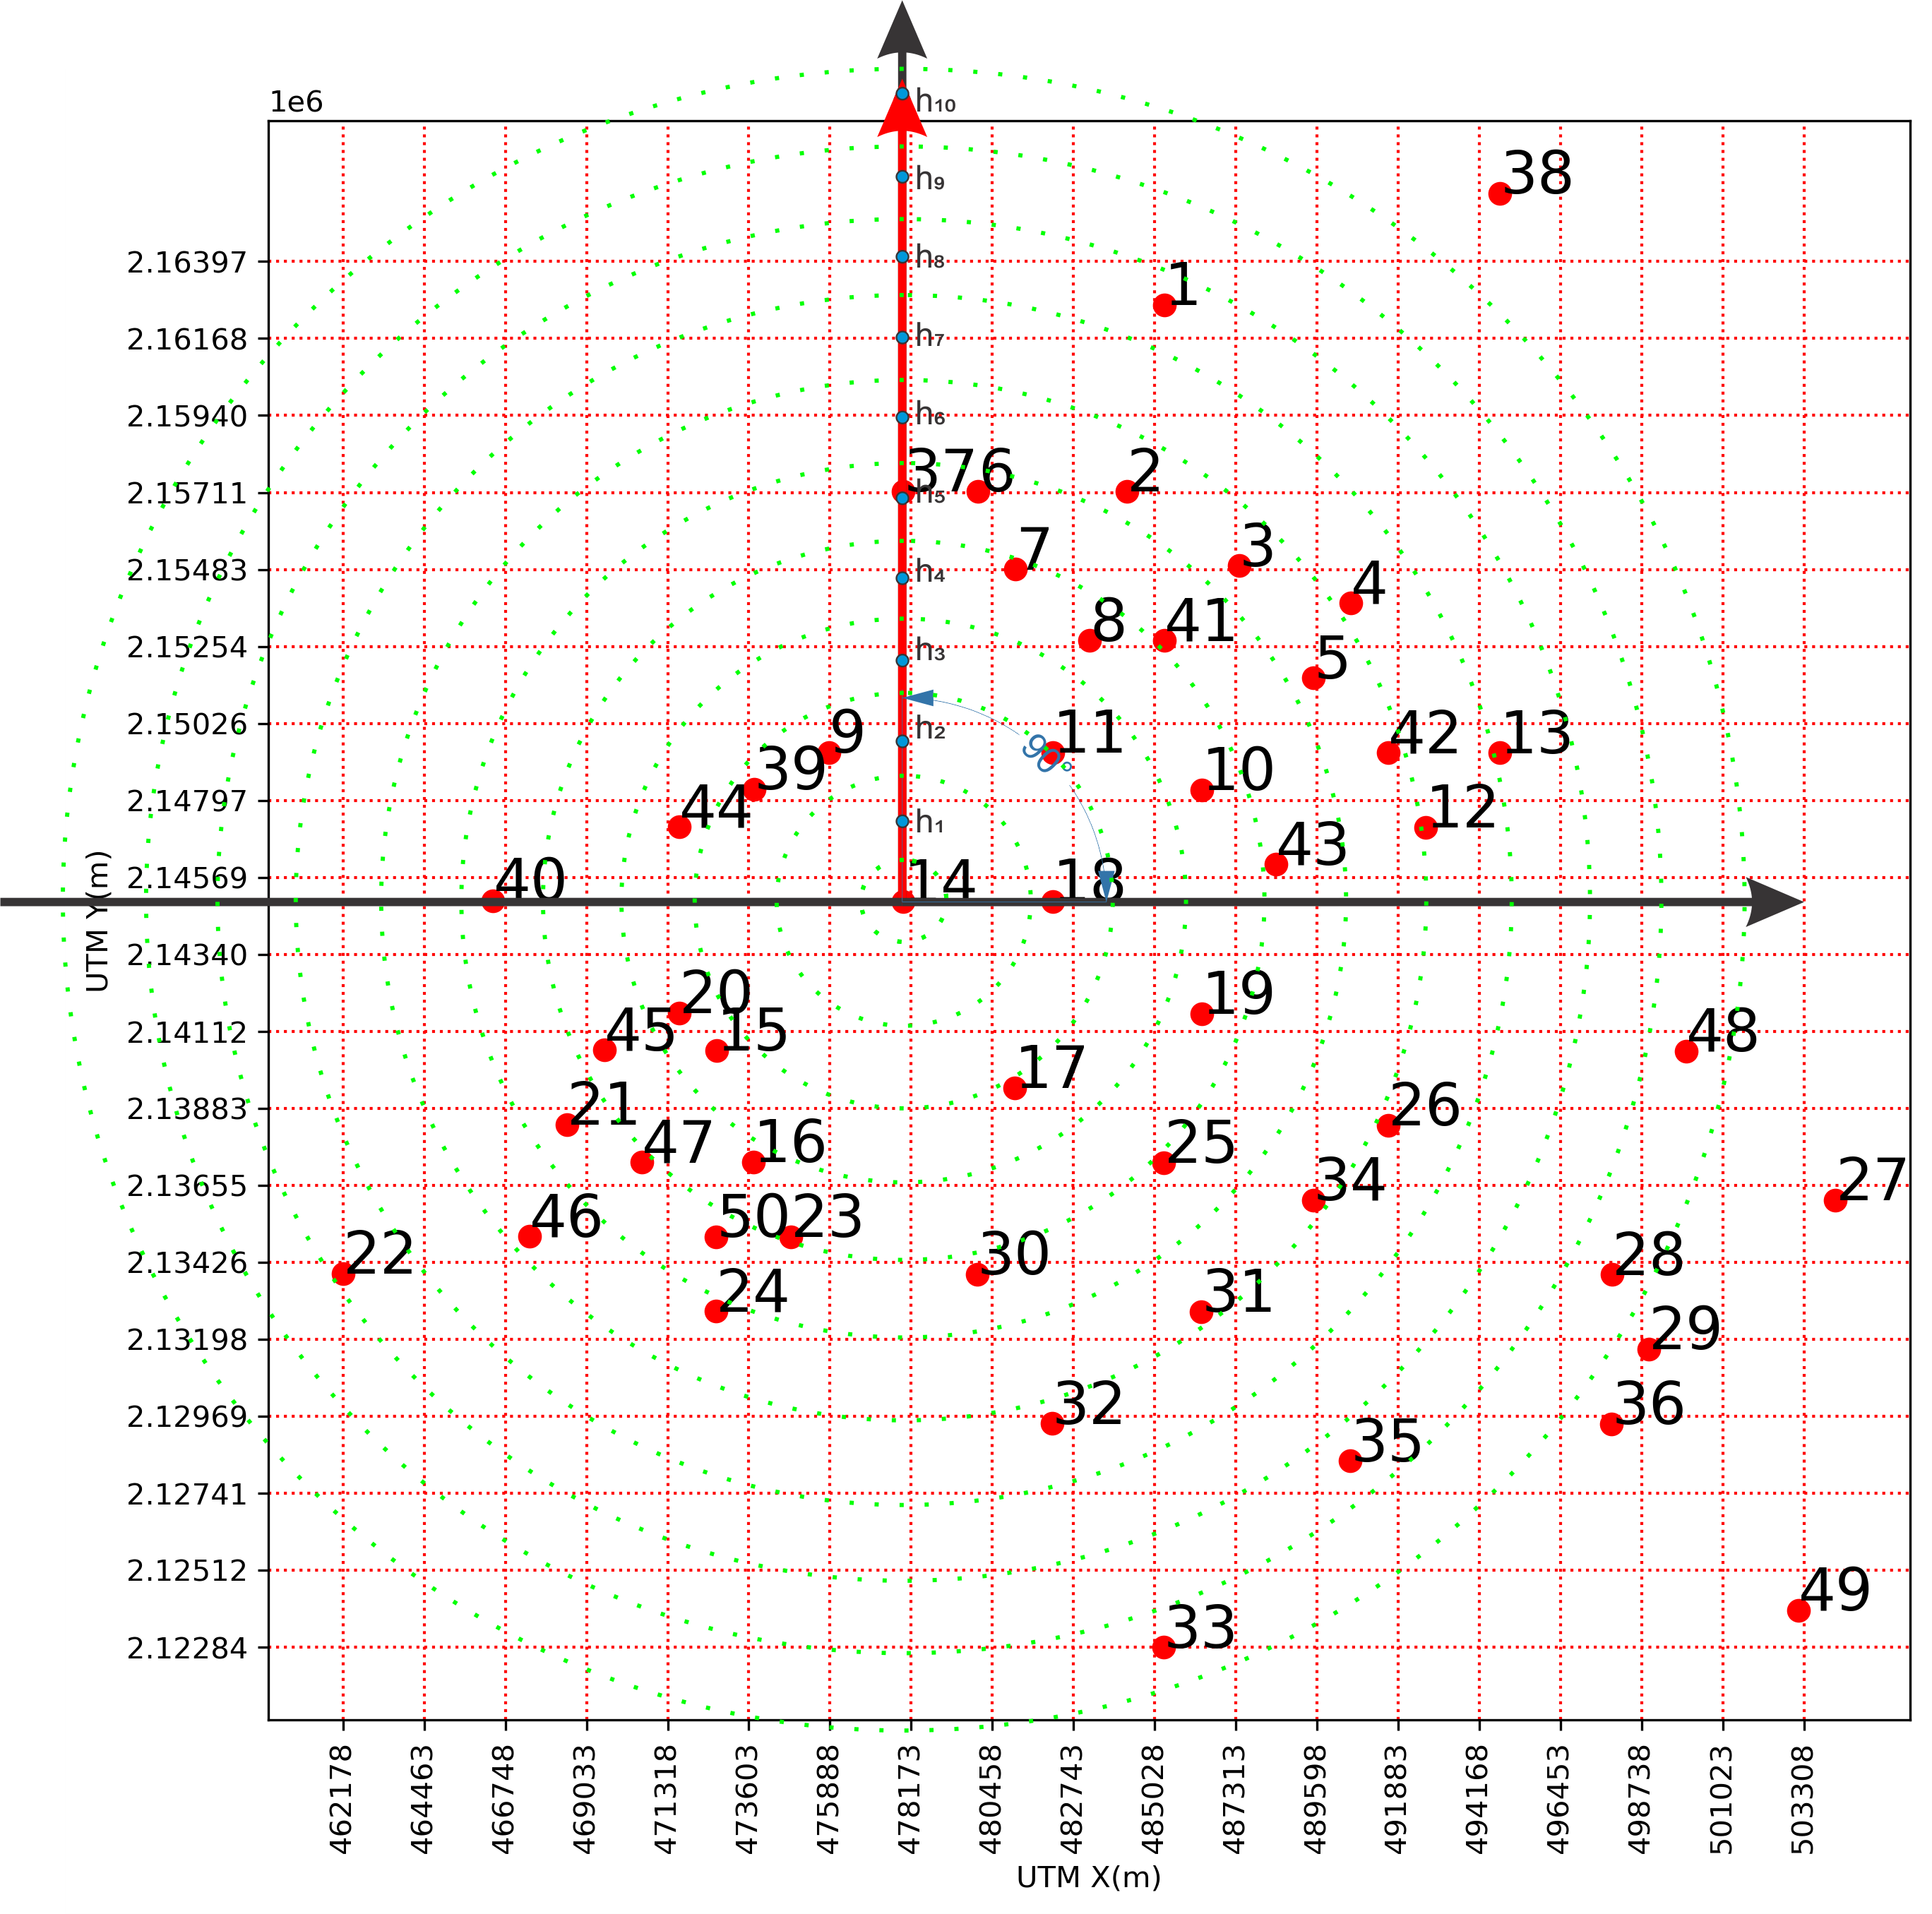

Para estimar el variograma adireccional se usa la función "Variograma", Esta función necesita:

* Coordenadas (XCoord, YCoord)
* Variable (Pluv_mm_Log)
* Una dirección (Direccion) y su tolerancia angular (Tol), como en este caso es variograma adireccional la dirección es de 0º y su tolerancia es de 90º.
* Número de intervalos (N_lags)
* Valor del intervalo (lag_value)
* Número de pares mínimo, por default es 1
* Titulo del gráfico.

La función "Variograma" usa el estimador clasico o método de momentos, el cual es:

$$\gamma^*(\underline{h})=\frac{1}{2N(\underline{h})}{\sum_{i=1}^{N(\underline{h})}}\left[{Z(\underline{x}_i+\underline{h})-Z(\underline{x}_i)}\right]^2 $$

variog: computing omnidirectional variogram


Npares Lags      Semivarianzas
1    5     1142.404 0.4148882    
2   50     3427.212 0.3506868    
3   70     5712.020 0.3884817    
4   95     7996.827 0.4841424    
5   99    10281.635 0.6656620    
6  108    12566.443 0.6656483    
7  101    14851.251 0.7492239    
8  118    17136.059 0.7527673    
9  107    19420.867 0.9285426    
10 103    21705.674 0.8919122

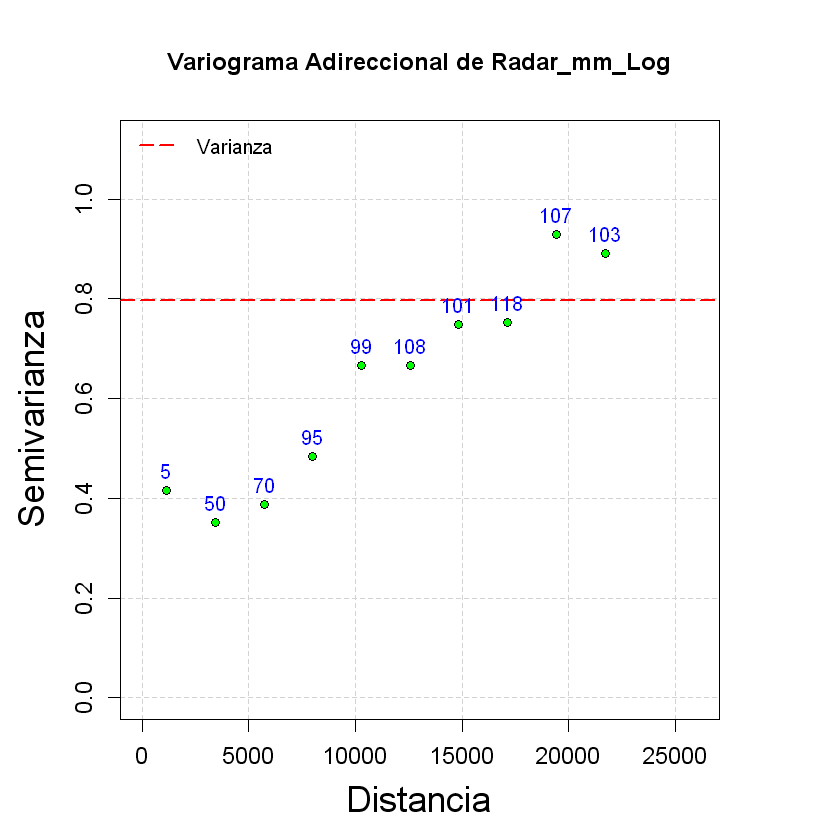

In [96]:
Radar_mm_Log_VarioEstimation<-Variograma(XCoord, YCoord, 
                                         Radar_mm_Log, Direccion=0, Tol=90, NIntervalos=N_lags, Lags=lag_value, Npares=1, "Variograma Adireccional de Radar_mm_Log")
Radar_mm_Log_VarioEstimation

Observando el resultado del variograma experimental adireccional podemos notar que no hay evidencias de tendencia, ya que el variograma crece hasta que se acota en la varianza, lo cual indica que esta variable al menos cumple con la hipótesis intrínseca.

Si por alguna razón la variable presenta evidencias de tendencia, entonces hay que aplicar una transformación polinomial.

La transformación polinomial de primer orden tiene la siguiente forma:

$$Z_1(x)=m_1(x)+R_1(x)$$

La transformación polinomial de segundo orden es:

$$Z_2(x)=m_2(x)+R_2(x)$$

La transformación la hacemos usando la función "Trend", la cual necesita las coordenadas (XCoord, YCoord), la variable (Pluv_mm_Log) y el grado del polinomio (pol_degree).

In [97]:
pol_degree=1
Radar_mm_Log_Detrended_1<-Trend(XCoord, YCoord, 
                                Radar_mm_Log, pol_degree)

Con esta transformación volvemos a graficar la regresión de la mediana y el variograma experimental adireccional.

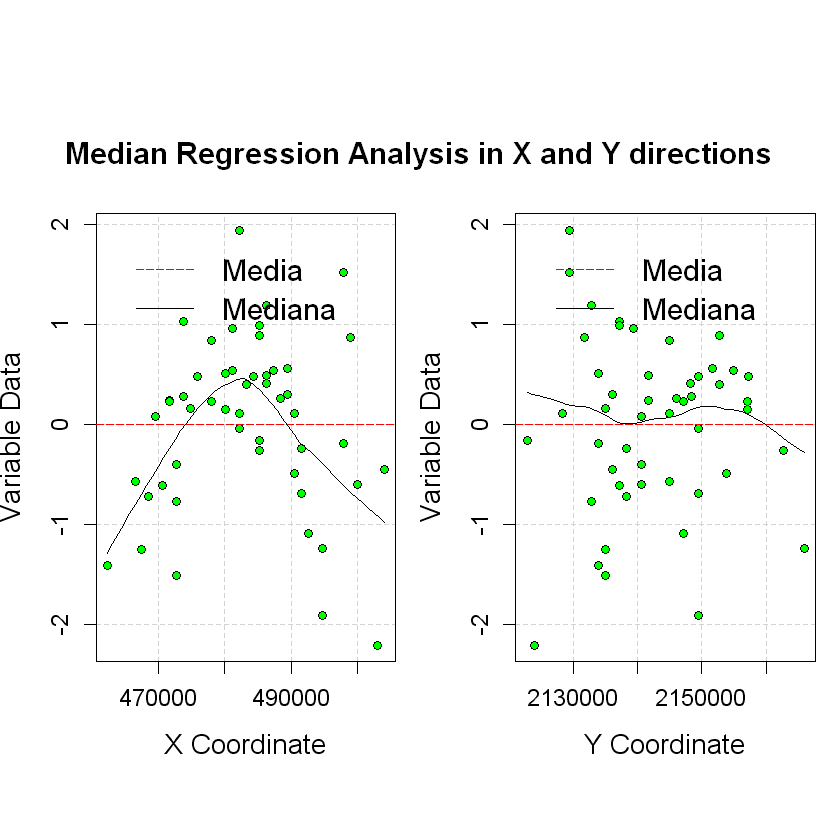

In [98]:
GDirecciones(Radar_mm_Log_Detrended_1[,1], Radar_mm_Log_Detrended_1[,2], Radar_mm_Log_Detrended_1[,3])

variog: computing omnidirectional variogram


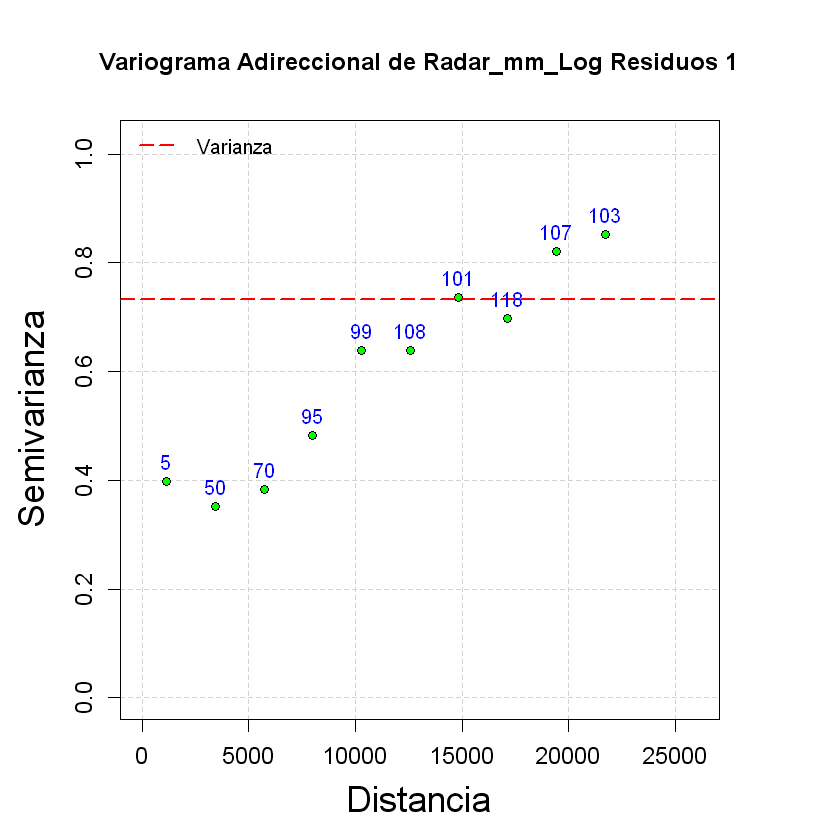

In [99]:
Radar_mm_Log_Detrended_1_VarioEstimation<-Variograma(Radar_mm_Log_Detrended_1[,1], Radar_mm_Log_Detrended_1[,2], 
                                                     Radar_mm_Log_Detrended_1[,3], 0, 90, N_lags, lag_value, 1, 
                                                     "Variograma Adireccional de Radar_mm_Log Residuos 1")

La transformación de segundo orden se hace de la siguiente forma.

In [100]:
pol_degree=2
Radar_mm_Log_Detrended_2<-Trend(XCoord, YCoord, 
                                Radar_mm_Log, pol_degree) 

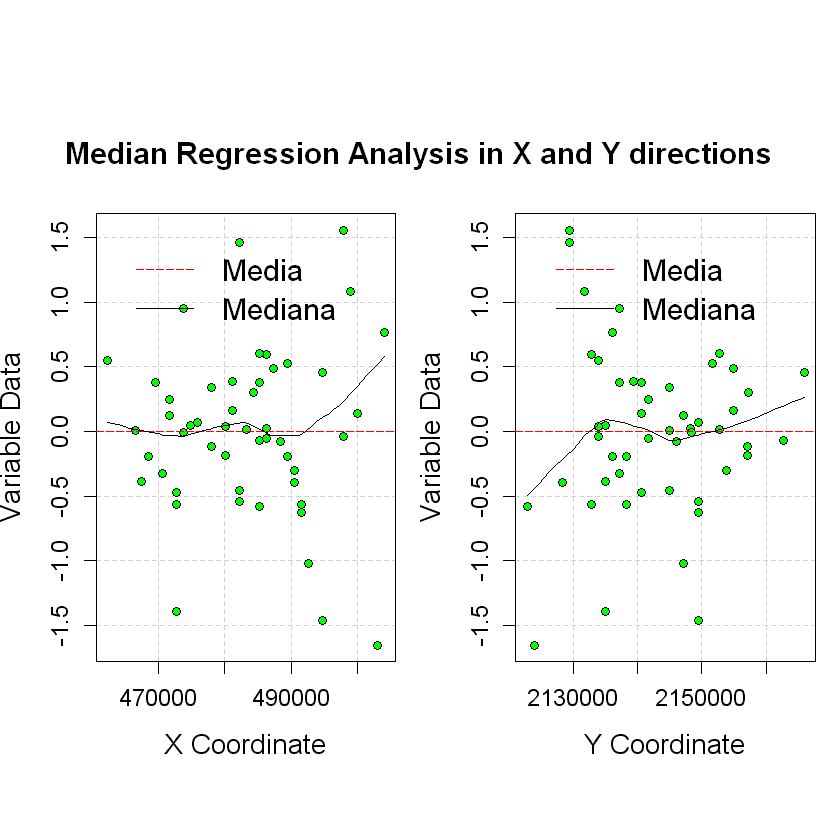

In [101]:
GDirecciones(Radar_mm_Log_Detrended_2[,1], Radar_mm_Log_Detrended_2[,2], Radar_mm_Log_Detrended_2[,3])

variog: computing omnidirectional variogram


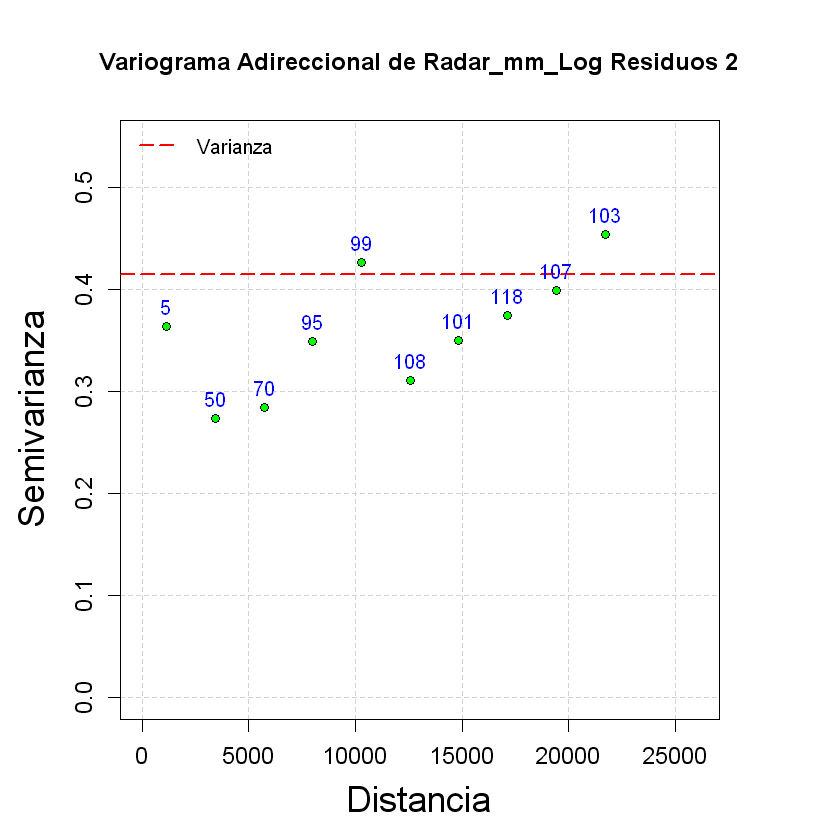

In [102]:
Radar_mm_Log_Detrended_2_VarioEstimation<-Variograma(Radar_mm_Log_Detrended_2[,1], Radar_mm_Log_Detrended_2[,2], 
                                                     Radar_mm_Log_Detrended_2[,3], 0, 90, N_lags, lag_value, 1, 
                                                     "Variograma Adireccional de Radar_mm_Log Residuos 2")

### Modelado variográfico unidimensional de la variable Radar_mm_Log

Después del análisis de tendencia, podemos empezar con el modelado del variograma. Por lo que empezaremos con el cálculo de los variogramas direccionales, esto para determinar si hay anisotropía.

El variograma adireccional se calcula de la siguiente forma:

variog: computing omnidirectional variogram


Npares Lags      Semivarianzas
1    5     1142.404 0.4148882    
2   50     3427.212 0.3506868    
3   70     5712.020 0.3884817    
4   95     7996.827 0.4841424    
5   99    10281.635 0.6656620    
6  108    12566.443 0.6656483    
7  101    14851.251 0.7492239    
8  118    17136.059 0.7527673    
9  107    19420.867 0.9285426    
10 103    21705.674 0.8919122

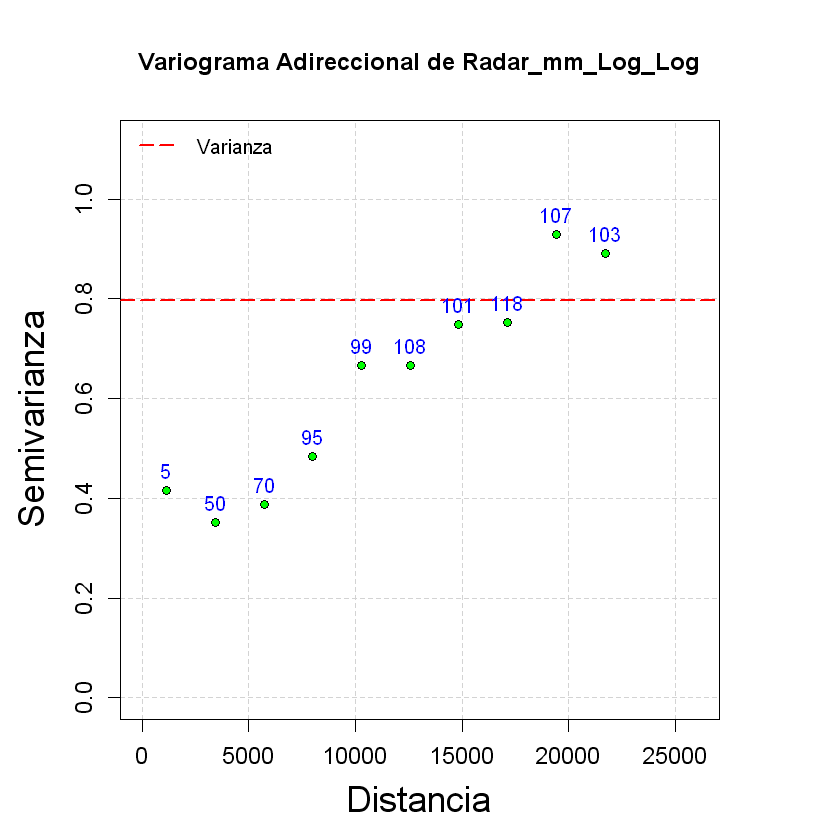

In [103]:
Radar_mm_Log_VarioEstimation<-Variograma(XCoord, YCoord, 
                                         Radar_mm_Log, 0, 90, N_lags, lag_value, 1, "Variograma Adireccional de Radar_mm_Log_Log")
Radar_mm_Log_VarioEstimation

Para calcular los variogramas direccionales solo cambiamos los parámetros en la función variograma:

* Coordenadas (XCoord, YCoord)
* Variable (Pluv_mm_Log)
* Dirección del vector, los cuales son: 0º, 45º, 90º y 135º
* Valor de la tolerancia angular, la cual es de 22.5º
* Número de intervalos (N_lags)
* Valor del intervalo (lag_value)
* Número de pares mínimo, por default es 1
* Titulo del gráfico.

Dado estos parámetros, podemos poner como ejemplo la siguiente grafica que ilustra la forma de cálculo del variograma con los parámetros antes mencionados, para la dirección de vector 0º es:


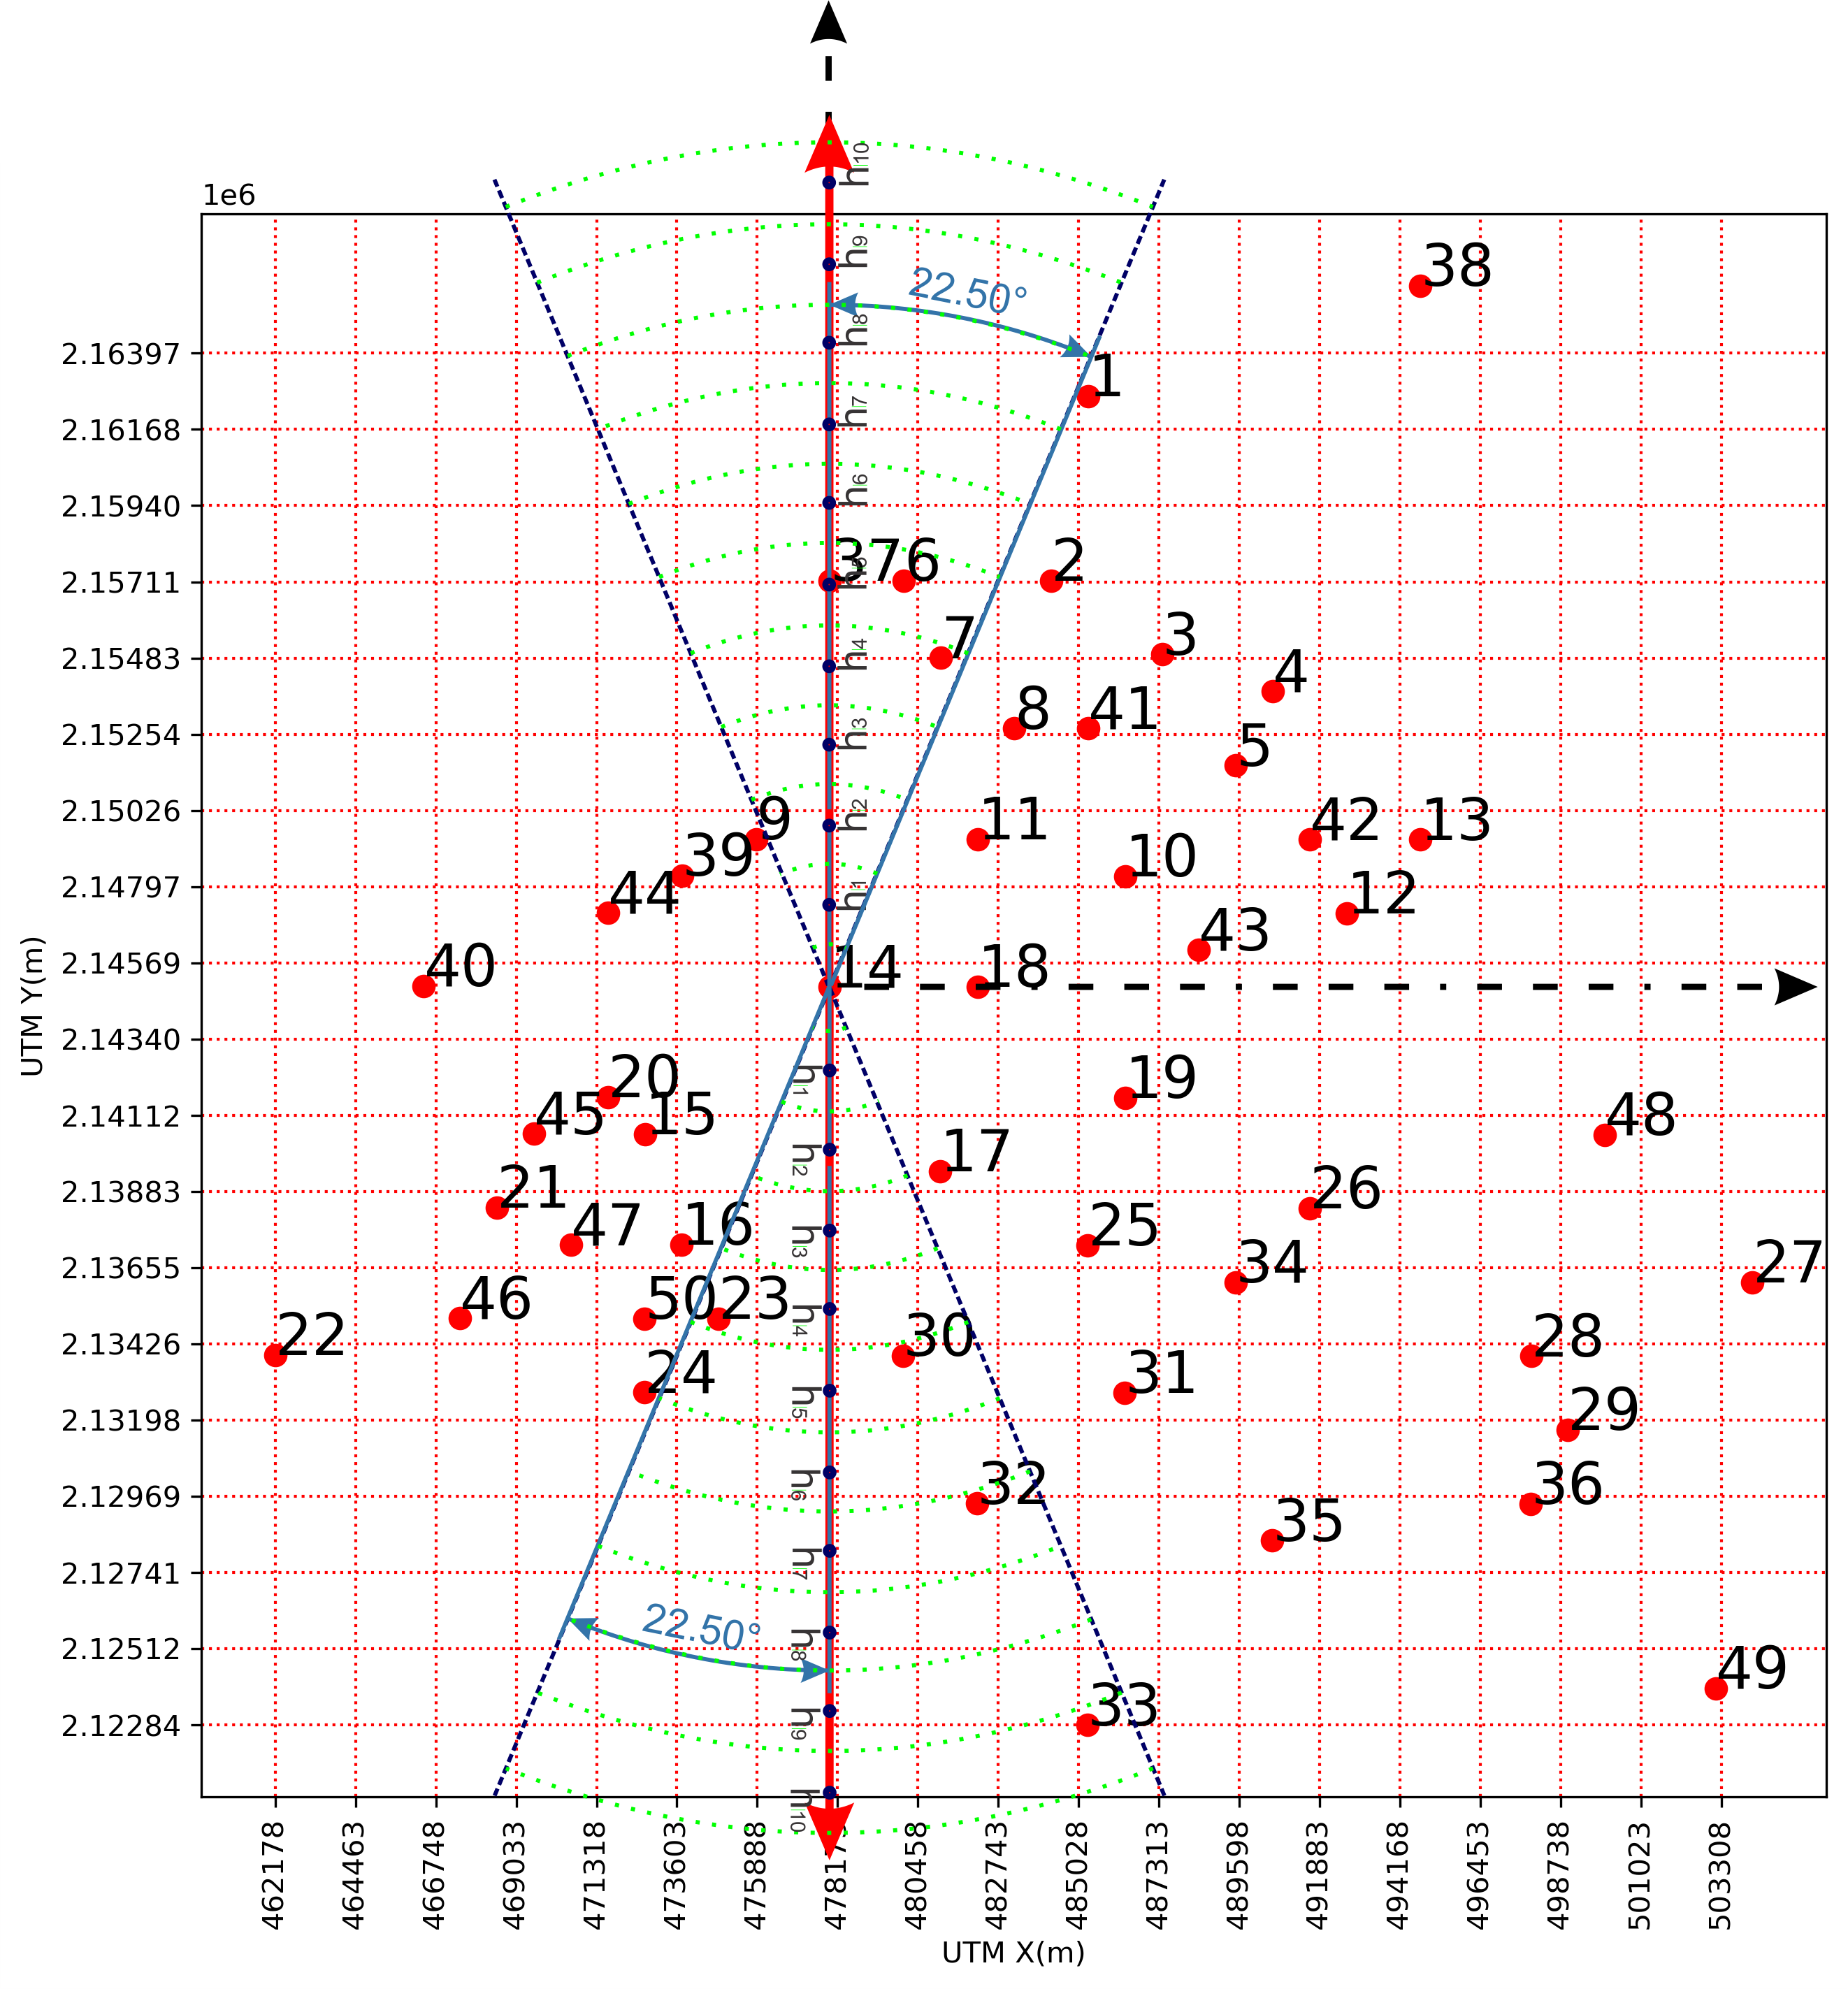

$\textbf{Nota:}$ Esta imagen solo muestra el computo con respecto a un punto, el calculo completo tiene que ser cubierto con todos los puntos

variog: computing variogram for direction = 0 degrees (0 radians)
        tolerance angle = 22.5 degrees (0.393 radians)


Npares Lags      Semivarianzas
1   1      1142.404 0.2568134    
2  14      3427.212 0.3895325    
3  13      5712.020 0.3544580    
4  25      7996.827 0.2065631    
5  24     10281.635 0.3320694    
6  31     12566.443 0.4505446    
7  24     14851.251 0.4996824    
8  31     17136.059 0.4989373    
9  17     19420.867 0.7712610    
10 23     21705.674 0.4889112

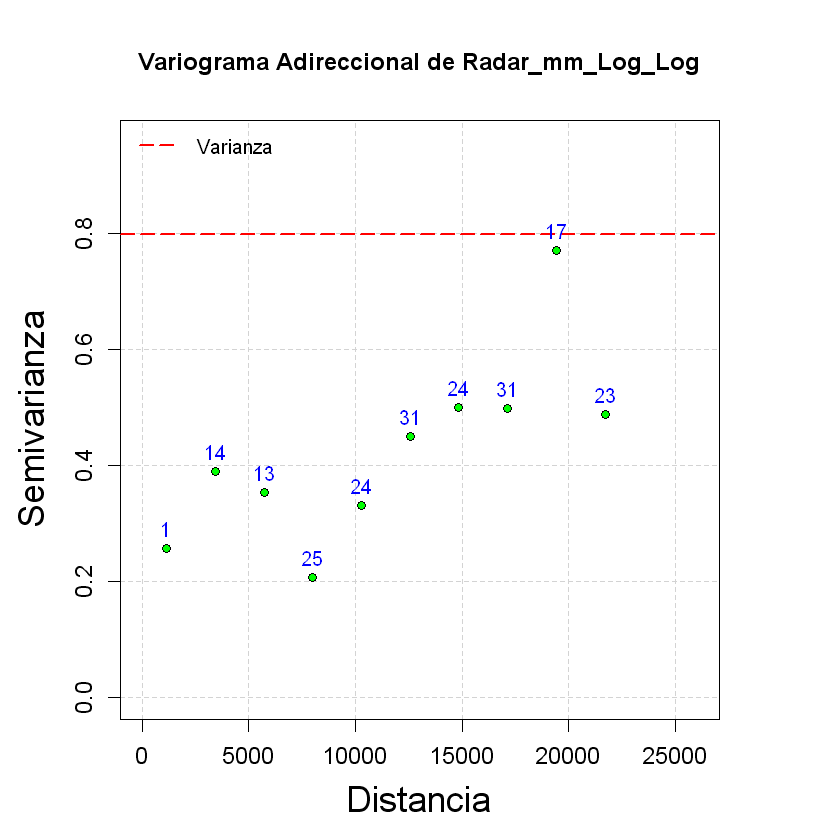

In [104]:
Radar_mm_Log_VarioEstimation_0<-Variograma(XCoord, YCoord, 
                                         Radar_mm_Log, 0, 22.5, N_lags, lag_value, 1, "Variograma Adireccional de Radar_mm_Log_Log")
Radar_mm_Log_VarioEstimation_0

Para el caso del variograma direccional 0º podemos notar que el variograma experimental en la dirección 0º no está bien estimado, solo dos intervalos tienen más de 30 pares. Por lo tanto, no se puede juzgar si esta dirección presenta anisotropía.

Calculamos el variograma direccional 45º

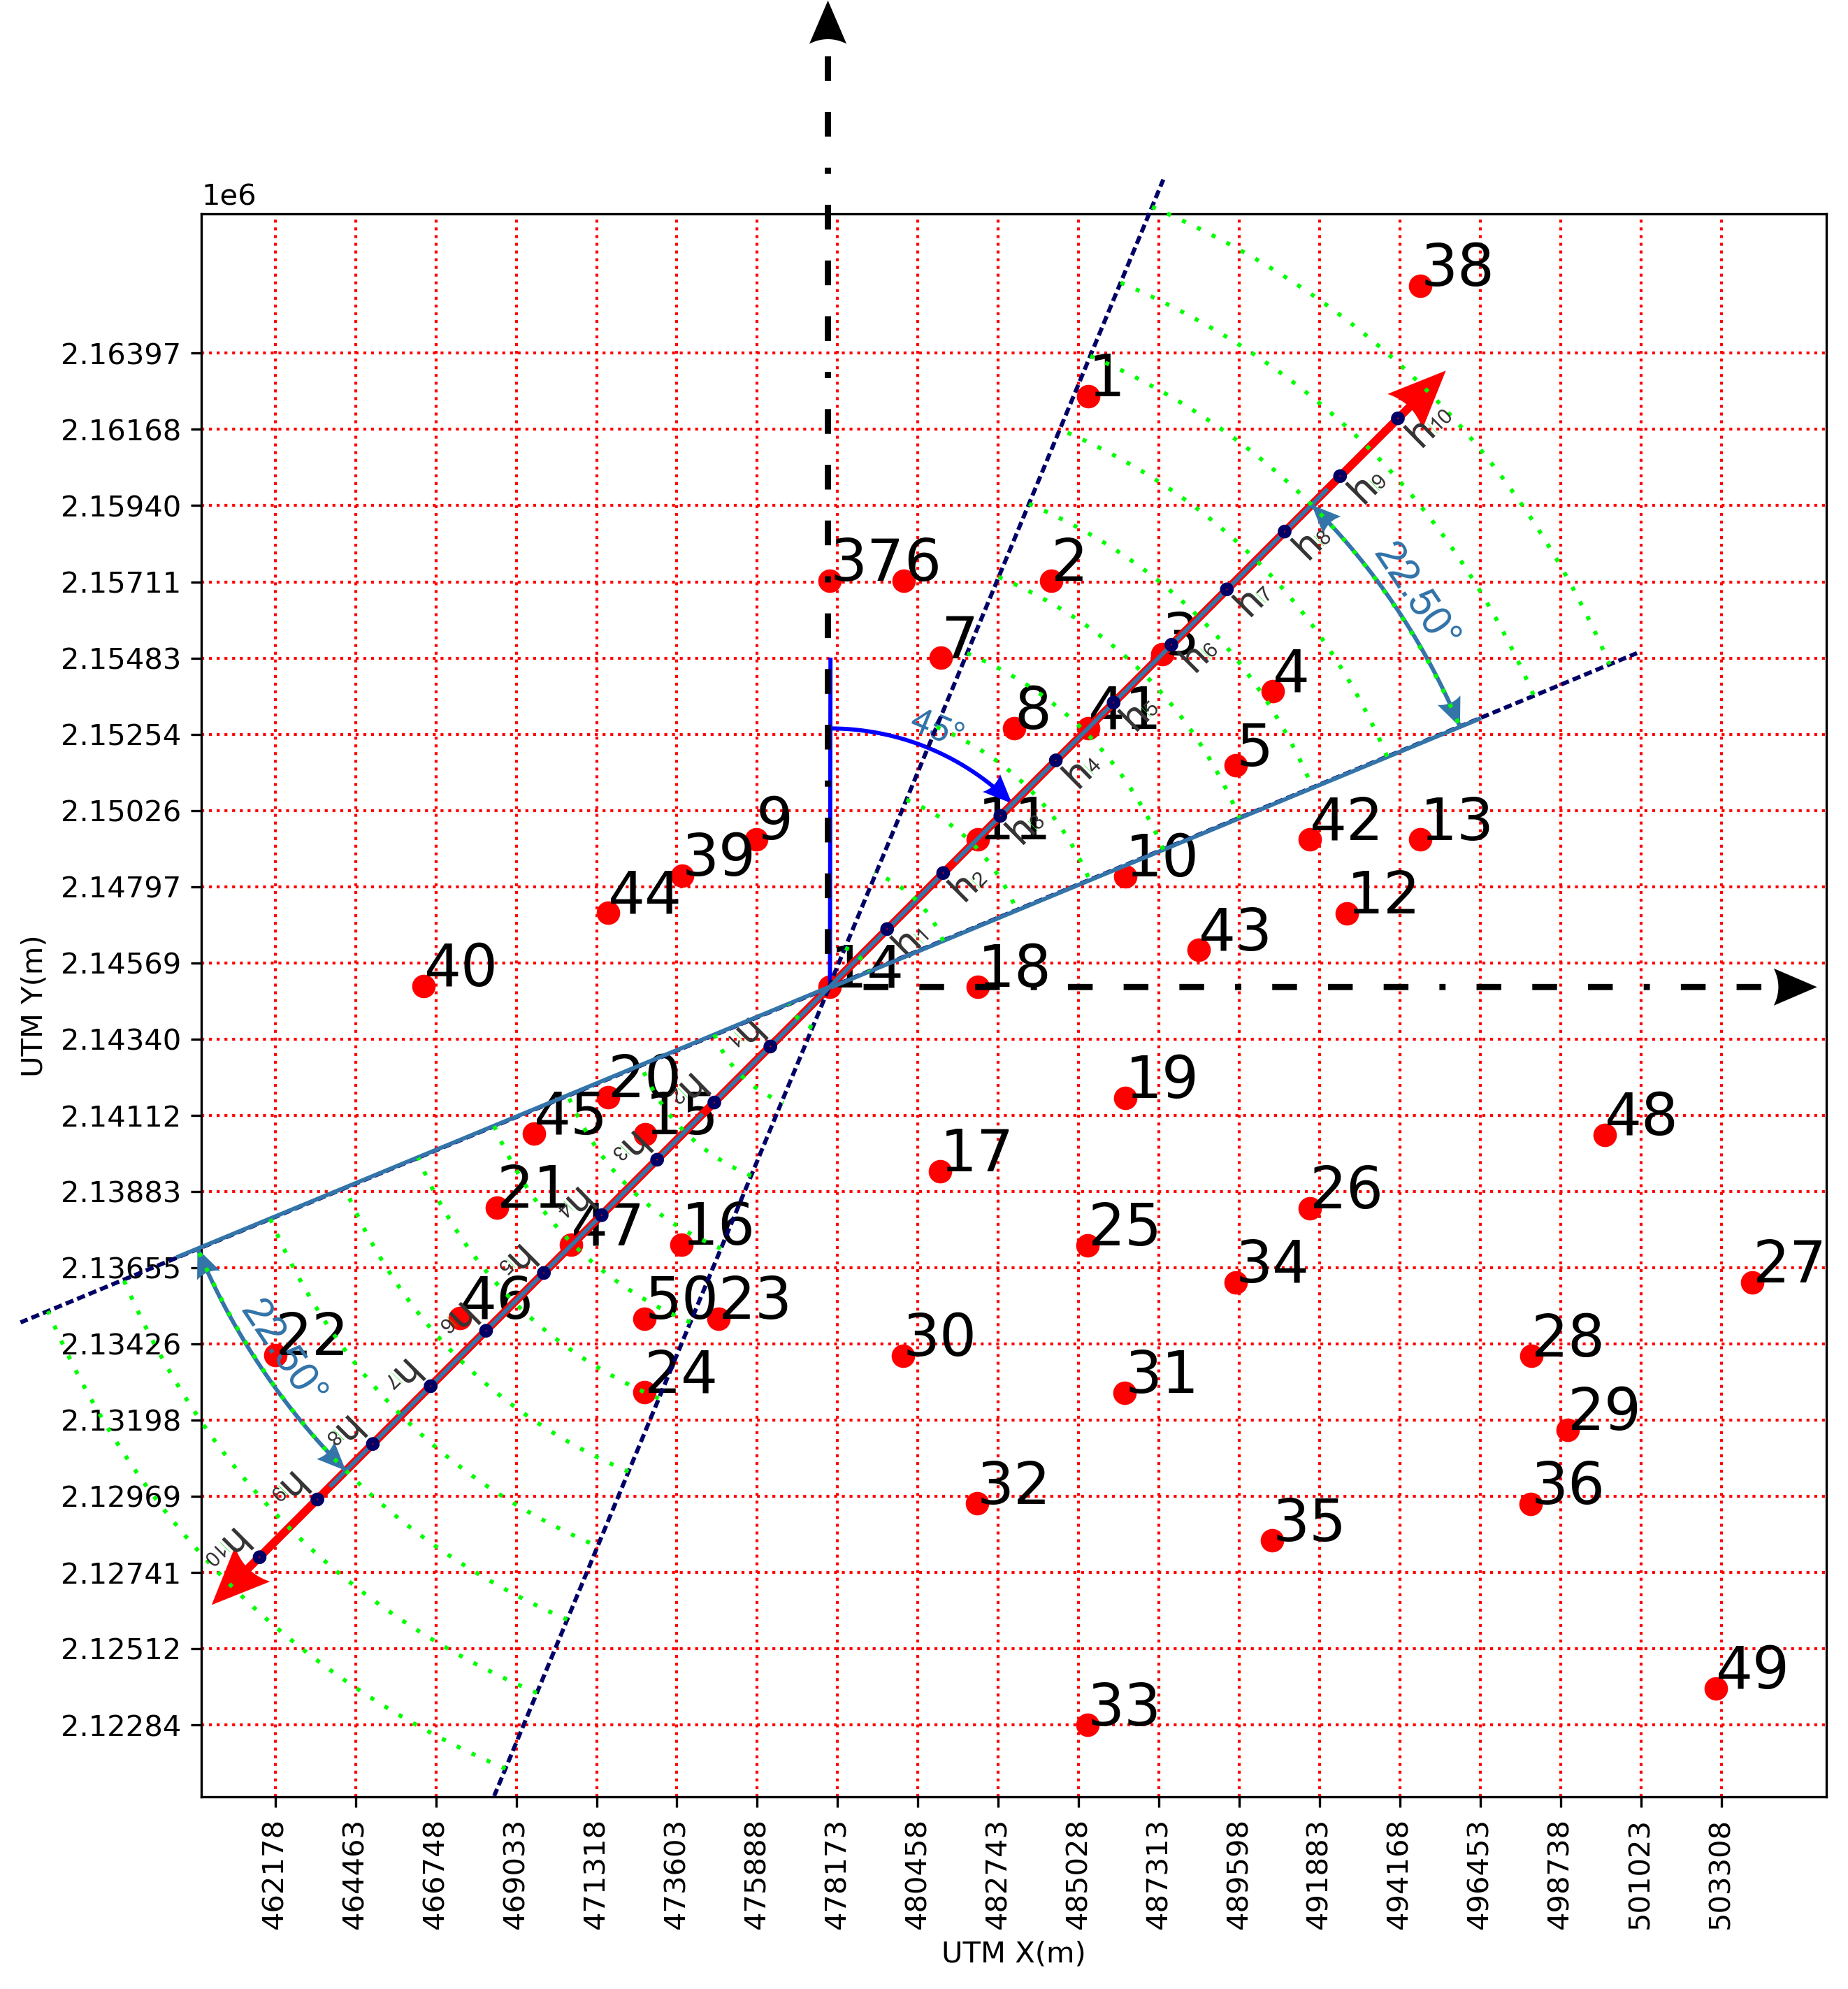

variog: computing variogram for direction = 45 degrees (0.785 radians)
        tolerance angle = 22.5 degrees (0.393 radians)


Npares Lags      Semivarianzas
1 14      3427.212 0.4056996    
2 15      5712.020 0.2171602    
3 22      7996.827 0.4577728    
4 29     10281.635 0.6480578    
5 24     12566.443 0.7136076    
6 28     14851.251 0.8950589    
7 35     17136.059 0.7515032    
8 32     19420.867 0.9329158    
9 40     21705.674 1.1707838

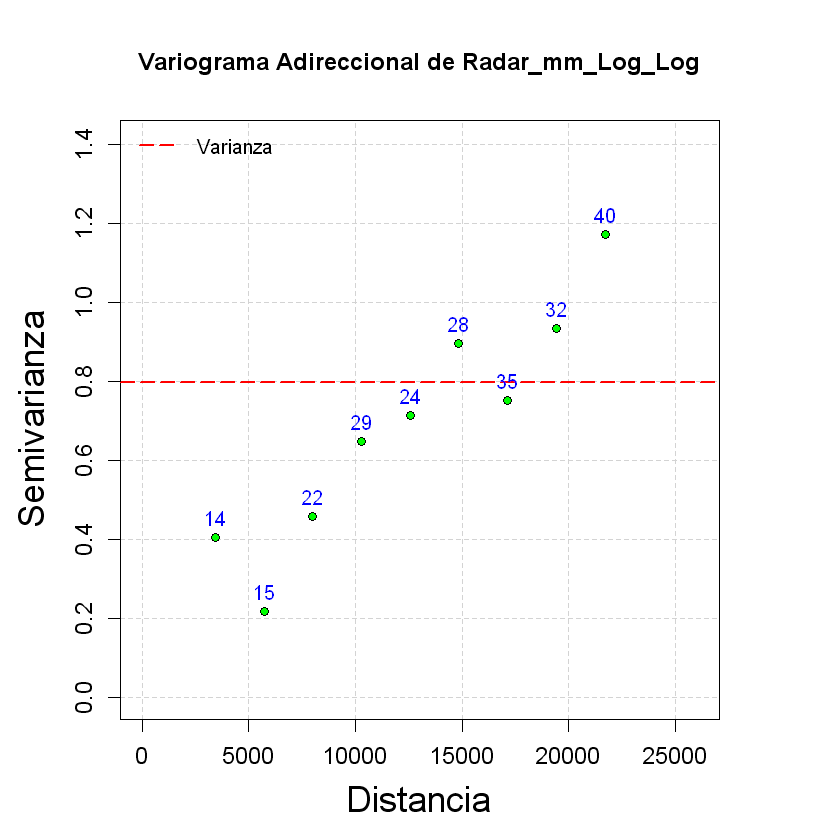

In [105]:
Radar_mm_Log_VarioEstimation_45<-Variograma(XCoord, YCoord, 
                                         Radar_mm_Log, 45, 22.5, N_lags, lag_value, 1, "Variograma Adireccional de Radar_mm_Log_Log")
Radar_mm_Log_VarioEstimation_45

Con el variograma direccional a 45º notamos el mismo problema detectado en el variograma direccional de 0º, solo tres intervalos tienen un número de pares superior a 30, por lo tanto, en esta dirección no se puede juzgar si existe algún tipo de anisotropía.

Probamos con el variograma direccional de 90º

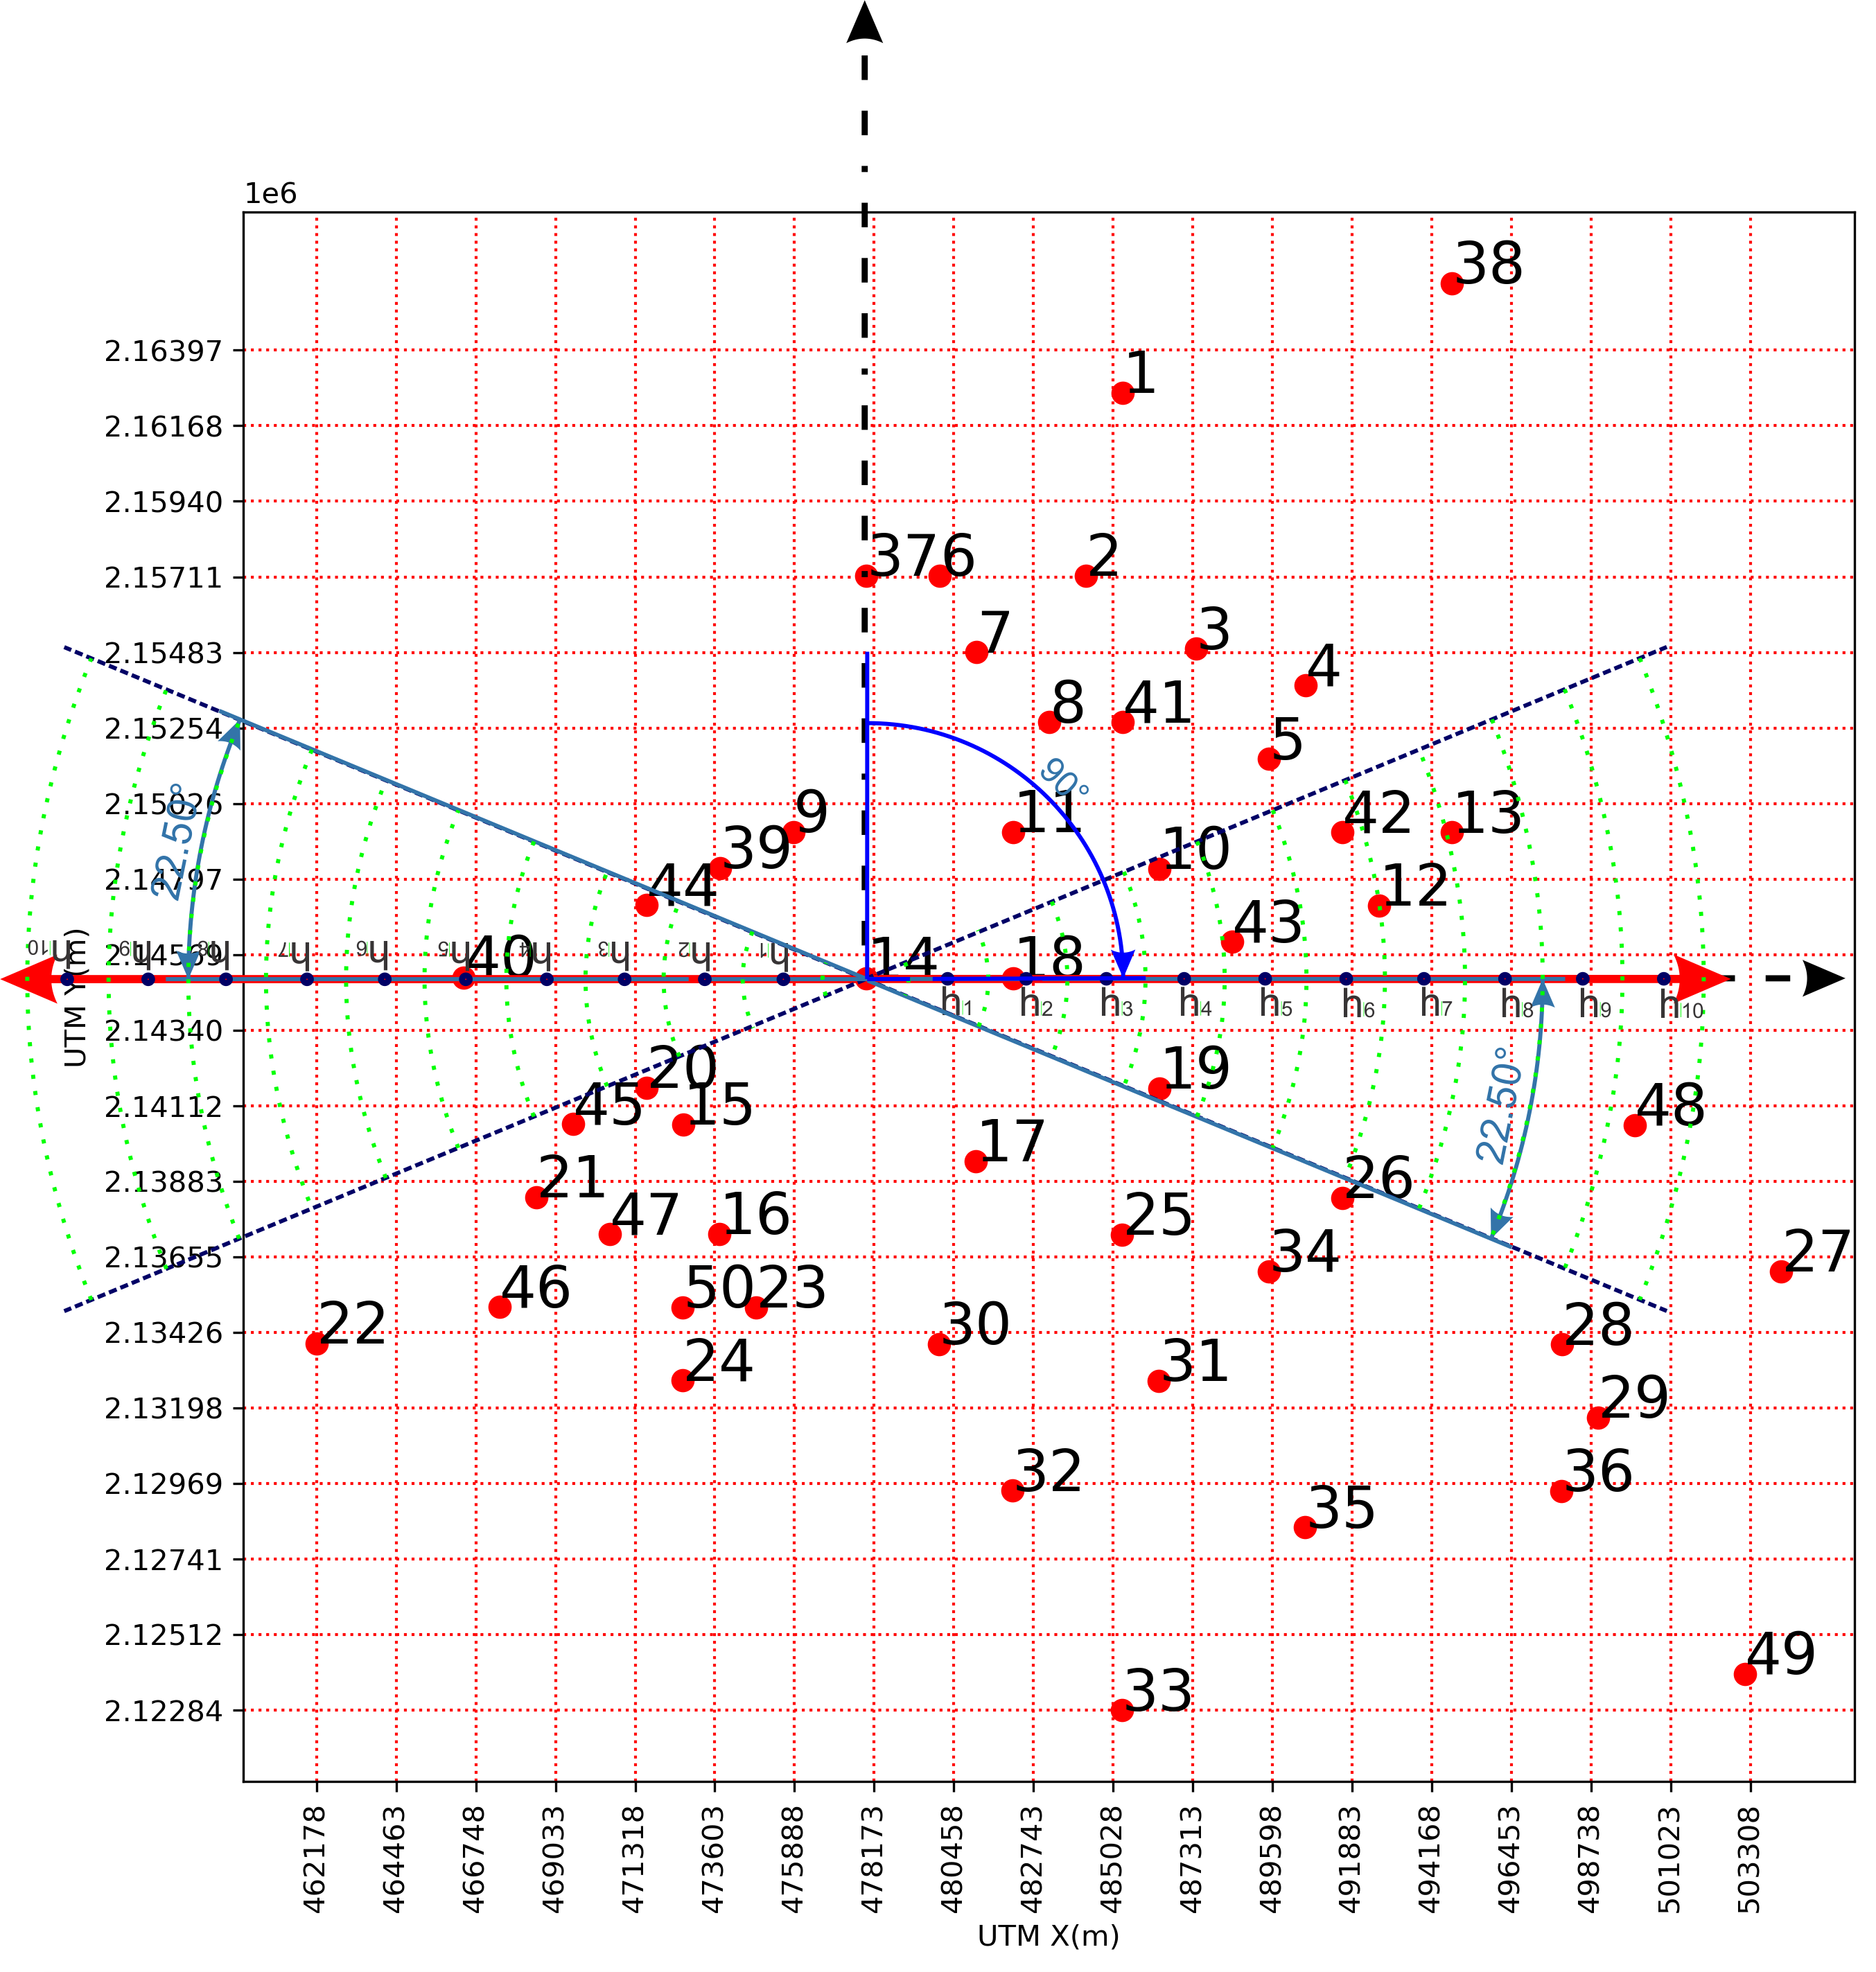

variog: computing variogram for direction = 90 degrees (1.571 radians)
        tolerance angle = 22.5 degrees (0.393 radians)


Npares Lags      Semivarianzas
1   3      1142.404 0.5410586    
2  10      3427.212 0.4084904    
3  17      5712.020 0.4991839    
4  22      7996.827 0.5986924    
5  23     10281.635 0.6120796    
6  32     12566.443 1.0541704    
7  24     14851.251 1.0595848    
8  28     17136.059 1.0000044    
9  30     19420.867 1.2713758    
10 14     21705.674 1.1033700

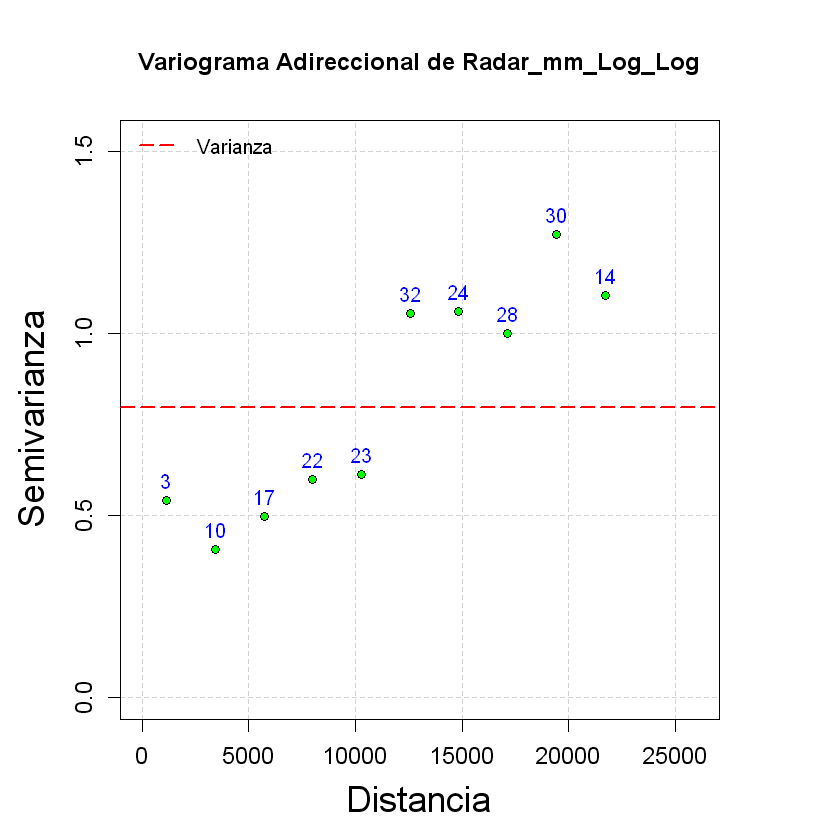

In [106]:
Radar_mm_Log_VarioEstimation_90<-Variograma(XCoord, YCoord, 
                                         Radar_mm_Log, 90, 22.5, N_lags, lag_value, 1, "Variograma Adireccional de Radar_mm_Log_Log")
Radar_mm_Log_VarioEstimation_90

Con el variograma direccional de 90º seguimos obteniendo intervalos mal estimados, solo dos tiene más de 30 pares y por lo tanto no se puede juzgar si existe anisotropía en esta dirección.

Seguimos con el variograma direccional de 135º.

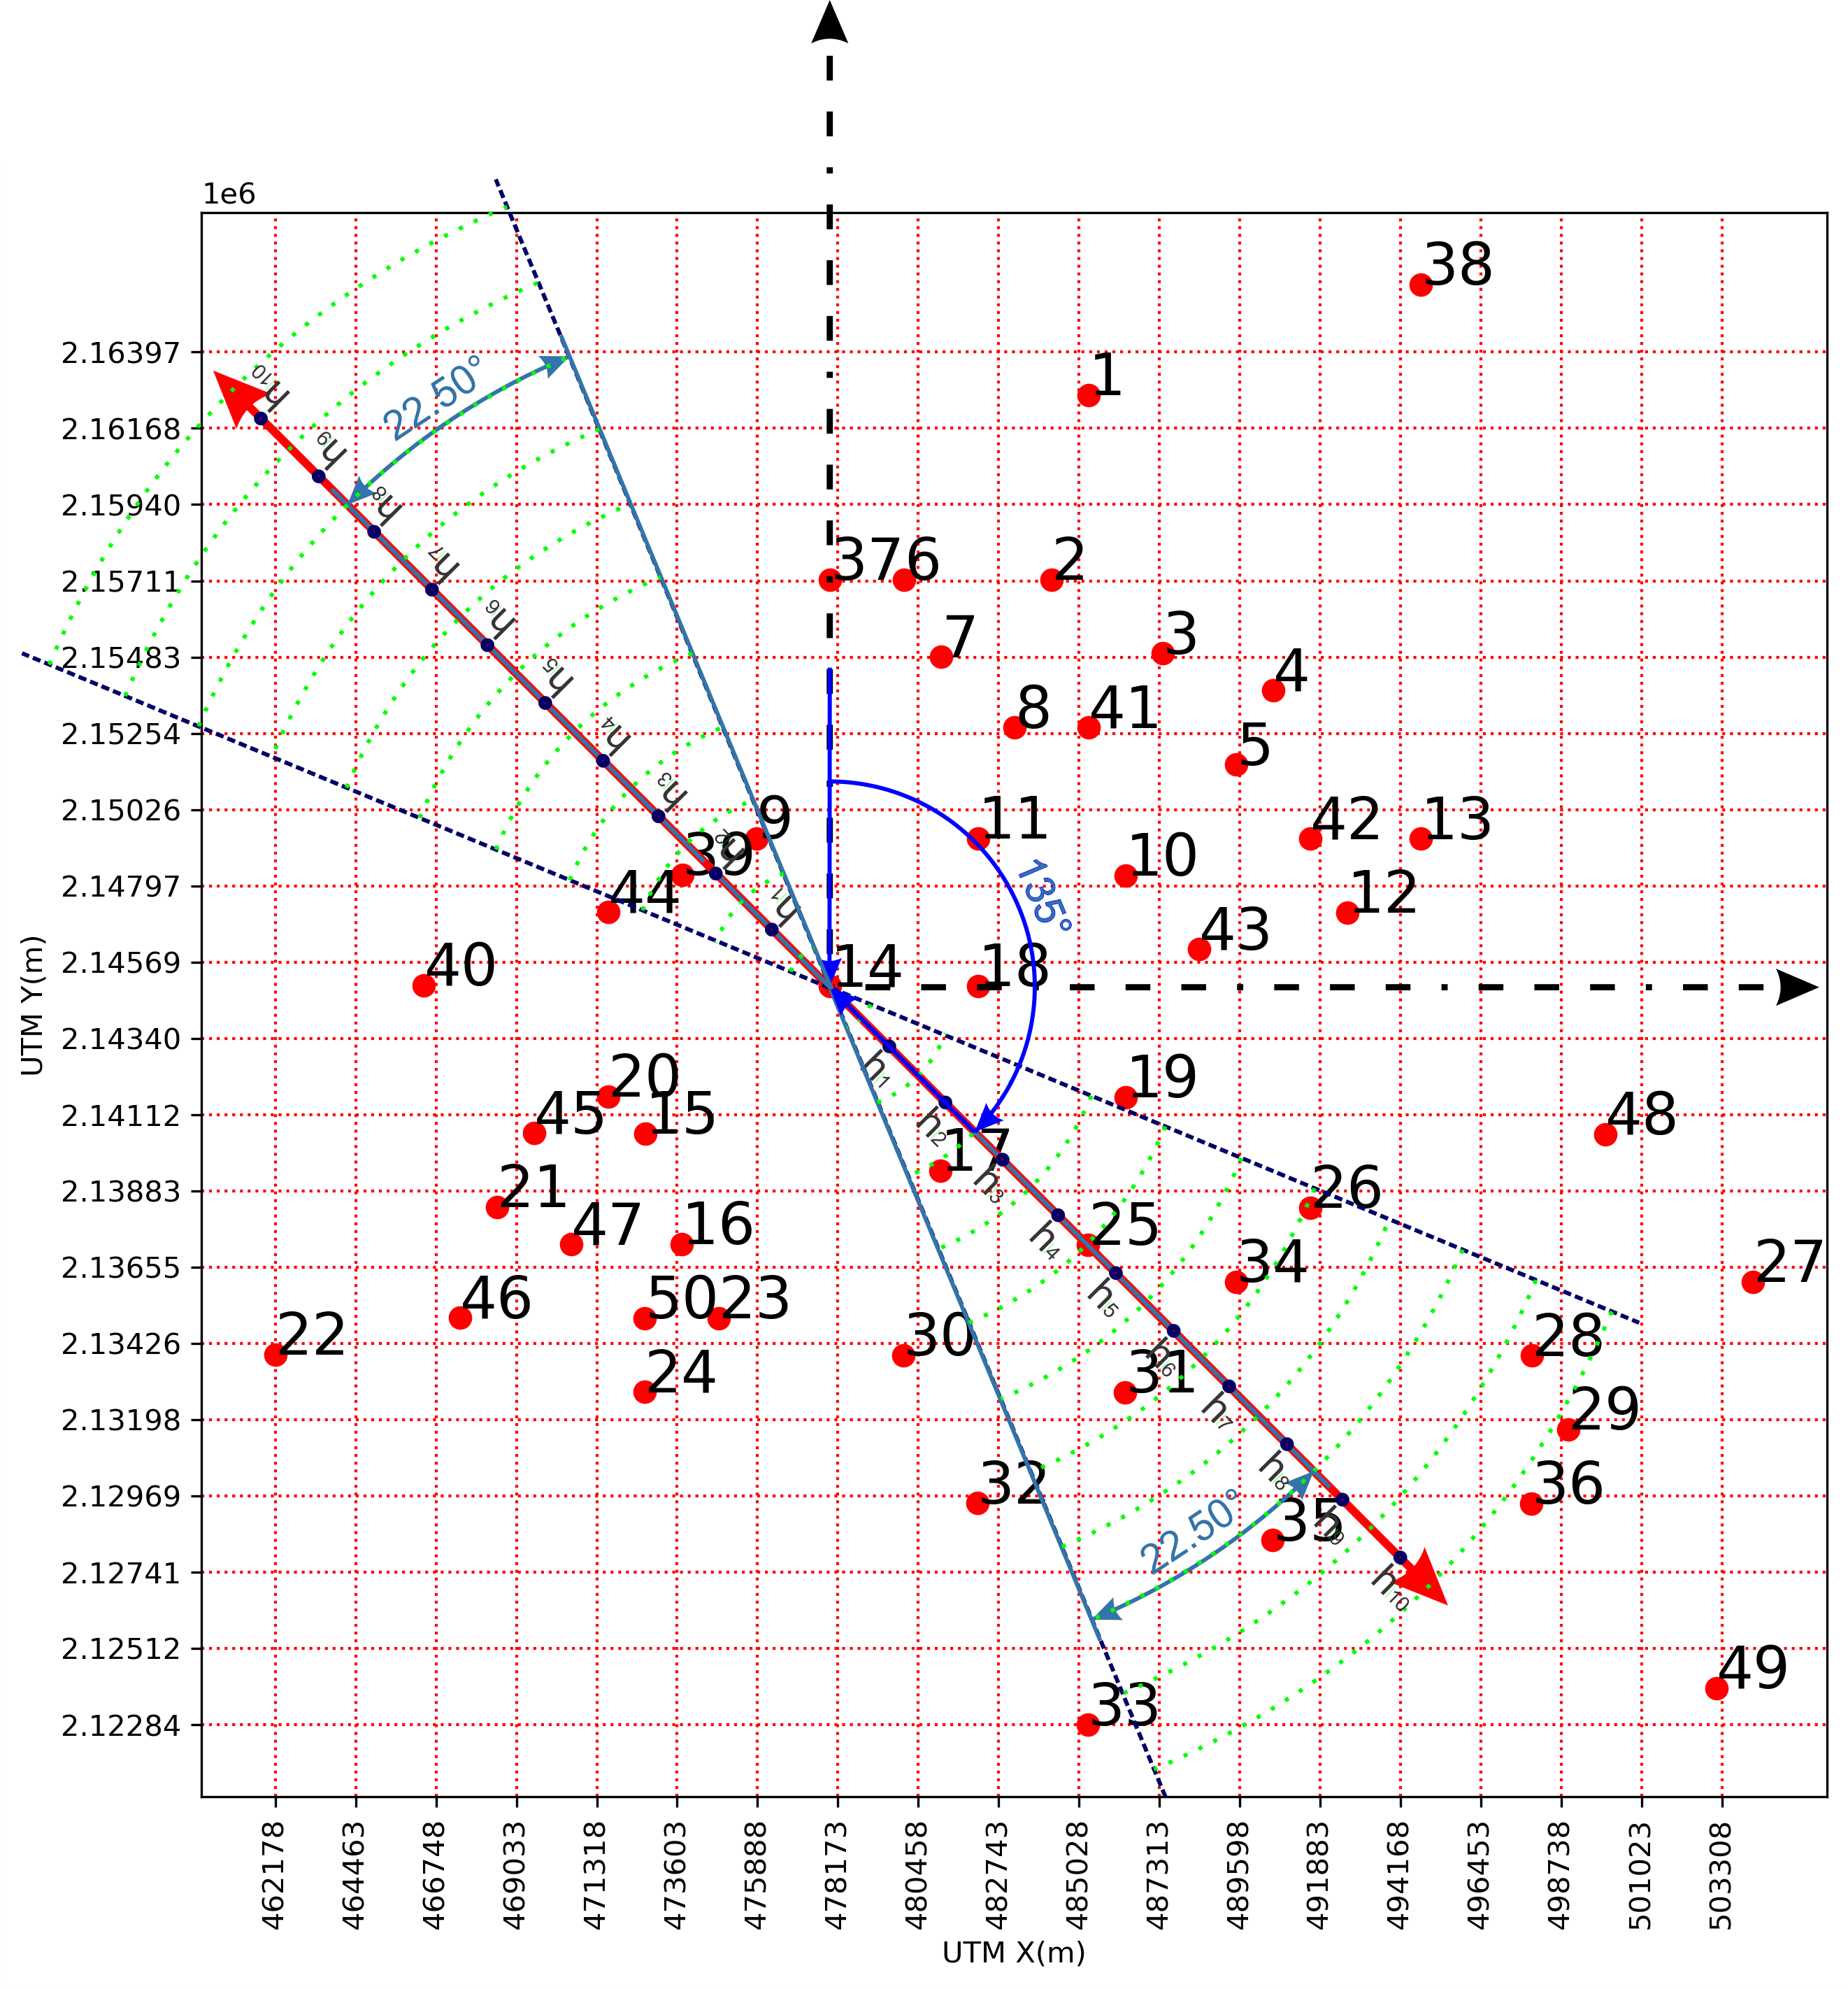

variog: computing variogram for direction = 135 degrees (2.356 radians)
        tolerance angle = 22.5 degrees (0.393 radians)


Npares Lags      Semivarianzas
1   1      1142.404 0.1944516    
2  12      3427.212 0.1930156    
3  25      5712.020 0.4336894    
4  26      7996.827 0.6764315    
5  23     10281.635 1.0895375    
6  21     12566.443 0.3363382    
7  25     14851.251 0.5275022    
8  24     17136.059 0.7940313    
9  28     19420.867 0.6517157    
10 26     21705.674 0.7055181

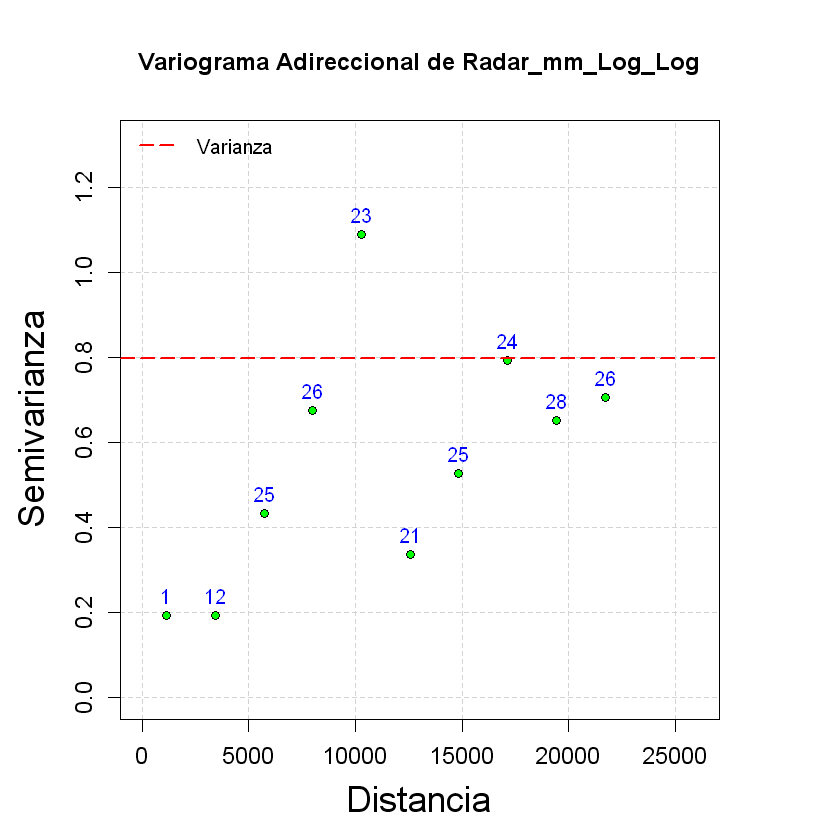

In [107]:
Radar_mm_Log_VarioEstimation_135<-Variograma(XCoord, YCoord, 
                                         Radar_mm_Log, 135, 22.5, N_lags, lag_value, 1, "Variograma Adireccional de Radar_mm_Log_Log")
Radar_mm_Log_VarioEstimation_135

El variograma direccional a 135º no tiene intervalos con un número de pares superior a 30, de todos los casos direccionales este es el peor y al igual que los demás, no se puede juzgar si existe anisotropía.

Para visualizar los cuatro variogramas direccionales en una sola imagen usamos la función "Variograma4D". Esta función necesita de las coordenadas (XCoord, YCoord), la variable (Pluv_mm_Log) las direcciones del vector en grados (0, 45, 90, 135), el ángulo de tolerancia (22.5), el número de intervalos (N_lags), el valor del intervalo (lag_value), el número mínimo de pares, el cual por default es uno.

variog: computing variogram for direction = 0 degrees (0 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 45 degrees (0.785 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 90 degrees (1.571 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 135 degrees (2.356 radians)
        tolerance angle = 22.5 degrees (0.393 radians)


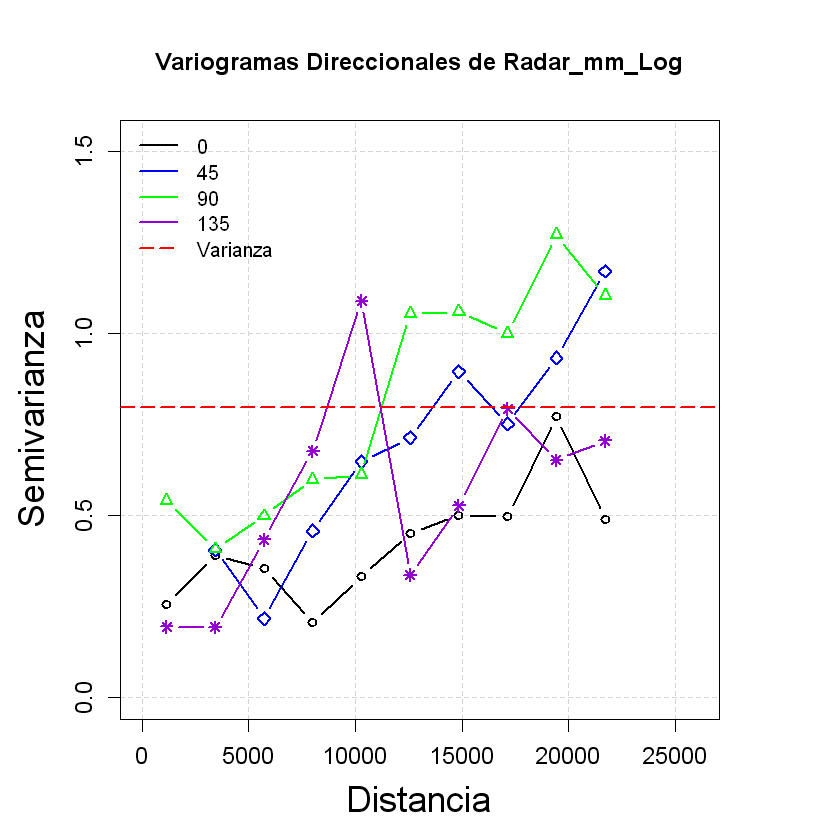

In [108]:
Radar_mm_Log_VarioEstimation4D<-Variograma4D(XCoord, YCoord, 
                                         Radar_mm_Log, 0, 45, 90, 135, 22.5, N_lags, lag_value, 1, "Variogramas Direccionales de Radar_mm_Log")

Si colocan en la consola "Radar_mm_Log_VarioEstimation4D", pueden obtener los pares de la estimación en los cuatro variogramas direccionales.

In [109]:
Radar_mm_Log_VarioEstimation4D

$Zero
      [,1]      [,2]      [,3]
 [1,]    1  1142.404 0.2568134
 [2,]   14  3427.212 0.3895325
 [3,]   13  5712.020 0.3544580
 [4,]   25  7996.827 0.2065631
 [5,]   24 10281.635 0.3320694
 [6,]   31 12566.443 0.4505446
 [7,]   24 14851.251 0.4996824
 [8,]   31 17136.059 0.4989373
 [9,]   17 19420.867 0.7712610
[10,]   23 21705.674 0.4889112

$FortyFive
      [,1]      [,2]      [,3]
 [1,]   14  3427.212 0.4056996
 [2,]   15  5712.020 0.2171602
 [3,]   22  7996.827 0.4577728
 [4,]   29 10281.635 0.6480578
 [5,]   24 12566.443 0.7136076
 [6,]   28 14851.251 0.8950589
 [7,]   35 17136.059 0.7515032
 [8,]   32 19420.867 0.9329158
 [9,]   40 21705.674 1.1707838

$Ninety
      [,1]      [,2]      [,3]
 [1,]    3  1142.404 0.5410586
 [2,]   10  3427.212 0.4084904
 [3,]   17  5712.020 0.4991839
 [4,]   22  7996.827 0.5986924
 [5,]   23 10281.635 0.6120796
 [6,]   32 12566.443 1.0541704
 [7,]   24 14851.251 1.0595848
 [8,]   28 17136.059 1.0000044
 [9,]   30 19420.867 1.2713758
[10,]   14 21705.674 1.1033700

$OneThertyFive
      [,1]      [,2]      [,3]
 [1,]    1  1142.404 0.1944516
 [2,]   12  3427.212 0.1930156
 [3,]   25  5712.020 0.4336894
 [4,]   26  7996.827 0.6764315
 [5,]   23 10281.635 1.0895375
 [6,]   21 12566.443 0.3363382
 [7,]   25 14851.251 0.5275022
 [8,]   24 17136.059 0.7940313
 [9,]   28 19420.867 0.6517157
[10,]   26 21705.674 0.7055181

Si comparamos los resultados obtenidos de los variogramas direccionales con el variograma adireccional, podemos notar que la mejor opción es usar el variograma adireccional ya que es el único que está bien estimado. Tambien podemos considerar que la variable es isotrópica.

Cabe aclarar que en el caso de que los variogramas direccionales estén bien estimados, entonces se debe ajustar un modelo de variograma autorizado y así determinar el tipo de anisotropía (geométrica o zonal) que podemos encontrar.

Ahora que sabemos cuál es el mejor variograma experimental, procedemos a ajustar un modelo de variograma autorizado. Para hacer el ajuste automático usamos la función "AllModel", esta función necesita de las coordenadas (XCoord, YCoord), la variable (Pluv_mm_Log), el dirección del vector el cual es de 0º, su ángulo de tolerancia (90º), número de intervalos (N_lags) y valor de intervalo (lag_value). El resultado de usar la función "AllModel" es un gráfico que nos mostrara tres tipos de modelos validos: exponencial, esférico y Gaussiano:

variog: computing omnidirectional variogram
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is gaussian 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is gaussian 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: min

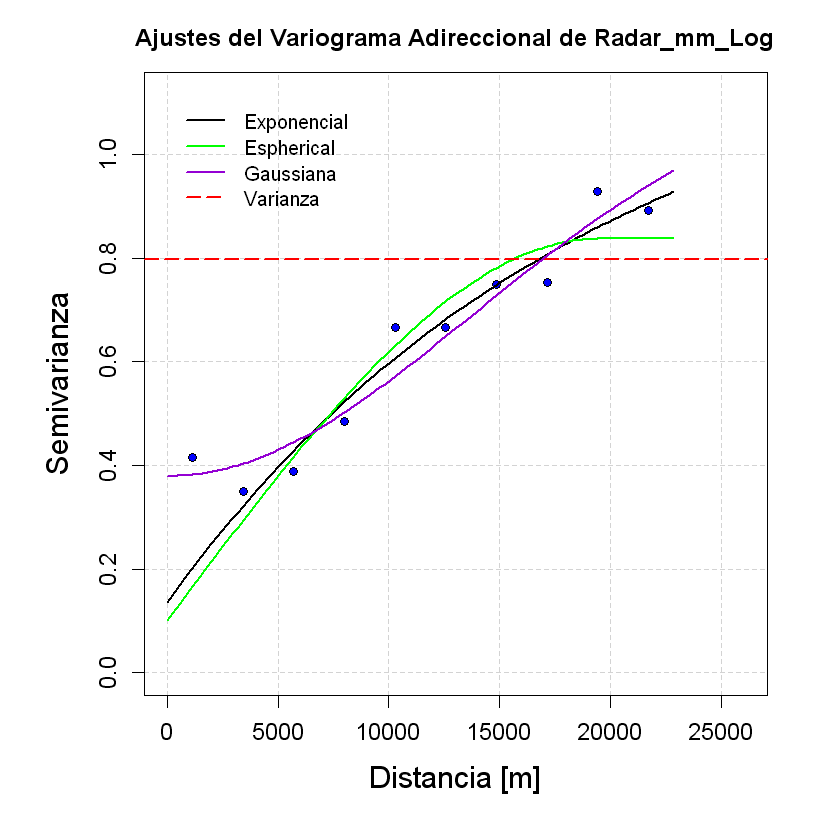

In [110]:
Radar_mm_Log_AllModelVarioFit<-AllModel(XCoord, YCoord, 
                                    Radar_mm_Log, 0, 90, N_lags, lag_value, 1, "Ajustes del Variograma Adireccional de Radar_mm_Log")

También obtenemos una tabla con los valores calculados de cada modelo, donde el valor del error (SCE) nos indica cual es el mejor modelo en función del menor error.

In [111]:
Radar_mm_Log_AllModelVarioFit

Nugget    Meseta+Nugget Alcance SCE       
exponential 0.1364152 1.2801046     19420   0.06095025
spherical   0.1007615 0.8369067     19420   0.08917023
gaussian    0.3793155 1.1649810     19420   0.04857662

Para graficar el mejor modelo de variograma usamos la función "BestModel", esta función es similar a la función "AllModel", solo nos muestra el mejor modelo y los valores de sus parámetros

variog: computing omnidirectional variogram
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is gaussian 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is gaussian 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: min

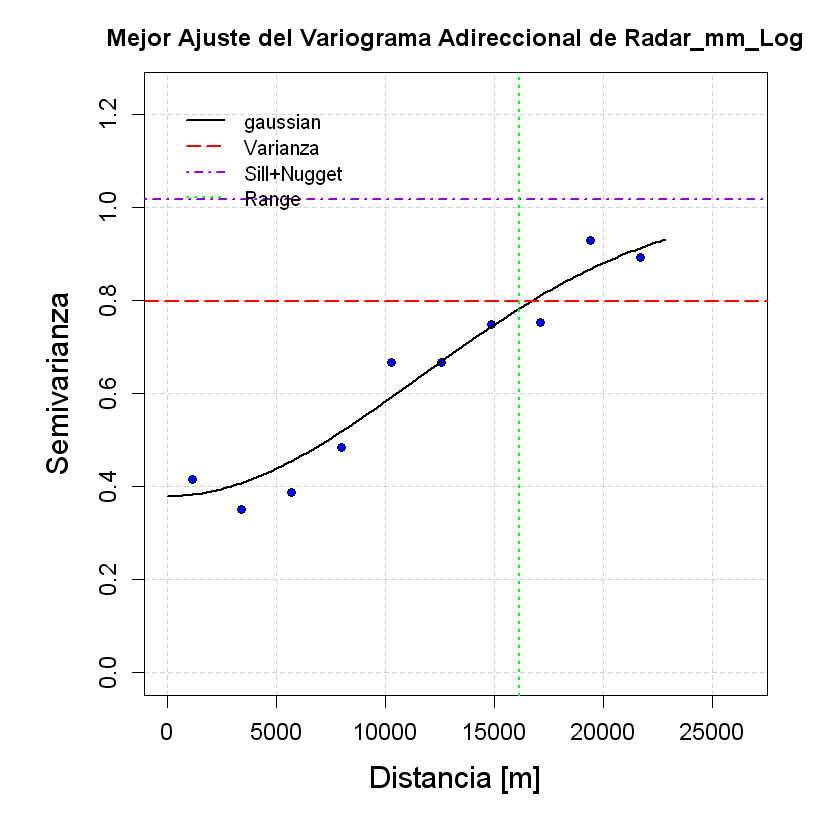

In [112]:
Radar_mm_Log_BestModelVarioFit<-BestModel(XCoord, YCoord, 
                                      Radar_mm_Log, 0, 90, N_lags, lag_value, 1, "Mejor Ajuste del Variograma Adireccional de Radar_mm_Log")

In [113]:
Radar_mm_Log_BestModelVarioFit

Nugget    Meseta+Nugget Alcance  SCE        MaxY      MinY     
gaussian 0.3793155 1.017185      16156.77 0.02275588 0.9285426 0.3506868

Como podemos notar, el mejor modelo según el ajuste automático es Gaussiano, sin embargo, podemos probar un ajuste manual.

Para hacer el ajuste manual usamos la función "EyeModel", esta función necesita de las coordenadas (XCoord, YCoord), la variable (Pluv_mm_Log), la dirección del vector (0º) y su ángulo de tolerancia (90º), el número de intervalos (N_lags), valor de intervalo (lag_value). Ahora de forma manual necesitamos ingresar la información a los siguientes parámetros: modelo de variograma (vario_model) que usaremos, en este caso tenemos las tres opciones numeradas de la siguiente forma:

* 1- Exponencial
* 2- Esférico
* 3- Gaussiano

después ingresamos el valor de nugget (nugget), el valor de meseta más nugget (sill_and_nugget) y el alcance (rank). Estos valores se van cambiando bajo el criterio del usuario, el objetivo es lugar un ajuste con el menor error posible, pero con un ajuste adecuado, sin exagerar en el uso del nugget.

In [114]:
#modelos de variograma (1- exponential, 2- spherical, 3- gaussian)
Radar_mm_Log_vario_model<- 2
Radar_mm_Log_nugget<- 0.17
Radar_mm_Log_sill_and_nugget<- 0.8
Radar_mm_Log_rank <- 20000

variog: computing omnidirectional variogram


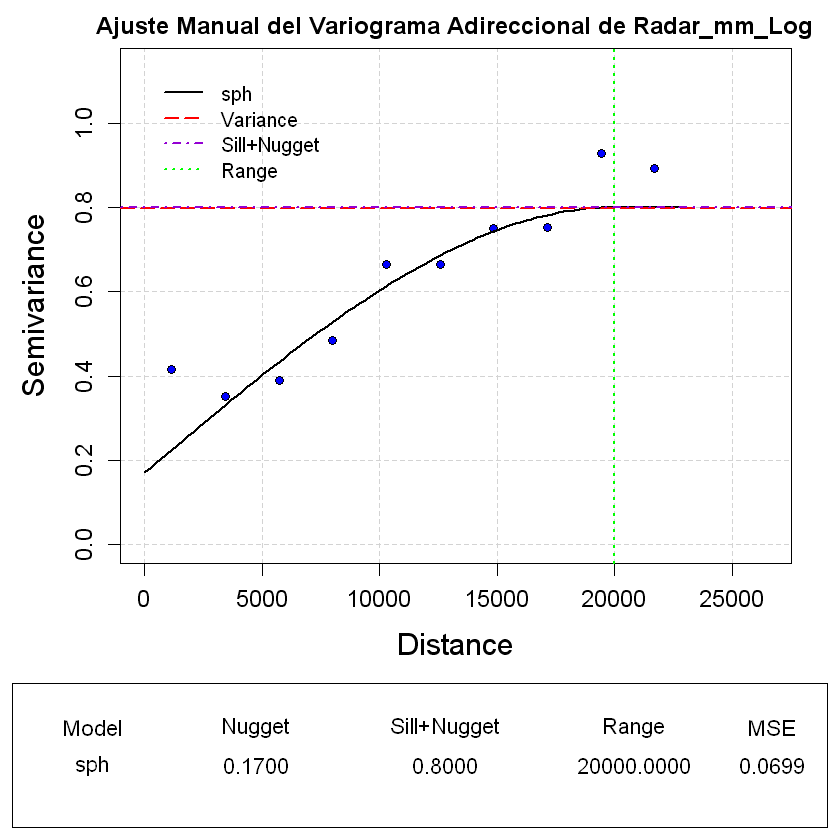

In [115]:
Radar_mm_Log_EyeModelVarioFit<-EyeModel(XCoord, YCoord, 
                                    Radar_mm_Log, 0, 90, N_lags, lag_value, 1, 
                                    Radar_mm_Log_vario_model, Radar_mm_Log_nugget, Radar_mm_Log_sill_and_nugget, Radar_mm_Log_rank,
                                    "Ajuste Manual del Variograma Adireccional de Radar_mm_Log")

Para comprobar si el ajuste propuesto es válido realizamos la validación cruzada. Si los valores estimados $(Z^*)$ son cercanos a los valores observados $(Z)$ entonces la diferencia entre los valores observados y los valores estimados deben cumplir los siguientes criterios:

el valor esperado

$$\frac{1}{n}\sum_{i=1}^n\left\lbrace{Z(\underline{x}_i)-Z^*(\underline{x}_i)}\right\rbrace \qquad \mbox{cercano a }0$$

La varianza.

$$\frac{1}{n}\sum_{i=1}^n\left\lbrace{Z(\underline{x}_i)-Z^*(\underline{x}_i)}\right\rbrace^2 \qquad \mbox{pequeño}$$

Para realizar la validación cruzada usamos la función "CrossValidation", la cual necesita los vectores de posicionamiento (XCoord, YCoord), la variable aleatoria (Pluv_mm_Log), el modelo de variograma (vario_model), valor de nugget (nugget), el valor de meseta más nugget (sill_and_nugget), el alcance (rank) y los valores de anisotropia geometrica: el valor de máxima anisotropía (MaxAnis) el cual corresponde al valor del ángulo del vector del semivariograma y la relación de anisotropía (proporción), esta proporción debe estar en el rango de 0 a 1 y se calcula en función de la razón del rango menor al rango mayor. Dado que este ejemplo isotrópico, el valor de máxima anisotropía es cero y la relación de anisotropía es uno.

In [116]:
Radar_mm_Log_CrossValid<- CrossValidation(XCoord, YCoord, 
                                      Radar_mm_Log, Radar_mm_Log_vario_model, Radar_mm_Log_nugget, Radar_mm_Log_sill_and_nugget, Radar_mm_Log_rank, MaxAnis=0, proporcion=1)
Radar_mm_Log_CrossValid

Loading required package: RandomFieldsUtils


Attaching package: 'RandomFieldsUtils'


The following object is masked from 'package:geoR':

    matern



Attaching package: 'RandomFields'


The following object is masked from 'package:RandomFieldsUtils':

    RFoptions


The following object is masked from 'package:nlme':

    Variogram




X      Y       Z            Z*           Z-Z*       
1  485303 2162682  0.254642218  0.352984840 -0.09834262
2  484253 2157150  0.908258560  0.730428148  0.17783041
3  487403 2154937  1.026041596  0.696232351  0.32980924
4  490552 2153830  0.058268908  0.475526532 -0.41725762
5  489502 2151601  1.057790294  0.291970492  0.76581980
6  480054 2157142  0.482426149  0.679475914 -0.19704976
7  481104 2154828  0.879626748  0.714304052  0.16532270
8  483203 2152713  0.765467842  0.919633893 -0.15416605
9  475855 2149399  0.636576829  0.549815930  0.08676090
10 486353 2148284  0.806475866  0.659838986  0.14663688
11 482155 2149394  0.270027137  0.909578537 -0.63955140
12 492651 2147174 -0.562118918 -0.262311361 -0.29980756
13 494751 2149386 -1.309333320 -0.178534564 -1.13079876
14 477955 2144973  1.004301609  0.579839305  0.42446230
15 472694 2140554 -0.400477567  0.263859026 -0.66433659
16 473739 2137233  1.018847320 -0.335098564  1.35394588
17 481095 2139437  1.147402453  0.944101510  0.20330094
18 482154 2144968  0.378436436  0.918223025 -0.53978659
19 486348 2141645  0.819779831  0.724613505  0.09516633
20 471645 2141662  0.223143551 -0.116467472  0.33961102
21 468489 2138348 -0.843970070 -0.755178970 -0.08879110
22 462178 2133934 -1.714798428 -0.909562969 -0.80523546
23 474787 2135019  0.157003749 -0.074810123  0.23181387
24 472682 2132809 -0.843970070 -0.642469262 -0.20150081
25 485294 2137220  1.249901736  1.013812848  0.23608889
26 491597 2138323  0.182321557  0.532650300 -0.35032874
27 504199 2136108  0.239016900  0.287775835 -0.04875893
28 497899 2133895  0.329303747  0.972046642 -0.64274289
29 498949 2131682  1.393766376  0.768036213  0.62573016
30 480038 2133906  0.620576488  1.138496000 -0.51791951
31 486341 2132793  1.432700734  1.163643938  0.26905680
32 482135 2129478  2.052840860  0.499893708  1.55294715
33 485282 2122836 -0.040821995  0.811892049 -0.85271404
34 489495 2136111  0.652325186  0.896370063 -0.24404488
35 490542 2128365  0.405465108  1.071784413 -0.66631931
36 497898 2129469  2.000127735  0.393537991  1.60658974
37 477955 2157144  0.518793793  0.467687279  0.05110651
38 494751 2165983 -0.478035801  0.005459968 -0.48349577
39 473755 2148298  0.378436436  0.456673988 -0.07823755
40 466407 2144991 -0.673344553 -0.178927589 -0.49441696
41 485303 2152711  1.308332820  0.823899946  0.48443287
42 491602 2149387 -0.162518929 -0.073873177 -0.08864575
43 488451 2146070  0.678033543  0.324831718  0.35320182
44 471654 2147195  0.270027137  0.184363844  0.08566329
45 469543 2140559  0.009950331 -0.482923471  0.49287380
46 467433 2135030 -1.427116356 -1.187709652 -0.23940670
47 470588 2137238 -0.693147181 -0.634857603 -0.05828958
48 500000 2140533  0.039220713 -0.114295578  0.15351629
49 503149 2123937 -1.660731207  1.108763511 -2.76949472
50 472686 2135022 -1.560647748 -0.228727300 -1.33192045

Lo que obtenemos con la validación cruzada es una tabla. Las filas 1 y 2 tienen la información de las coordenadas, la fila 3 tiene los valores de la variable $\textbf(Z)$, la fila 4 muestra los valores estimados con el método de validación cruzada conocido como leave one out, estimando el valor con el método de kriging usando el variograma propuesto $\textbf(Z^*)$, la fila 5 es la diferencia entre la variable y los valores estimados $\textbf(Z-Z^*)$

ya que tenemos la validación cruzada calculamos los estadígrafos.

In [117]:
Radar_mm_Log_CrossValid_Stat <- Val_Estadisticos(Radar_mm_Log_CrossValid[1:102,c(3,4,5)])
Radar_mm_Log_CrossValid_Stat

Z        Z*       Z-Z*    
No_muestras        50.00000 50.00000 50.00000
Minimo             -1.71480 -1.18771 -2.76949
Cuartil_1er        -0.13209 -0.10442 -0.46694
Mediana             0.35387  0.47161 -0.06826
Media               0.26569  0.34313 -0.07743
Cuartil_3er         0.86467  0.80093  0.23502
Maximo              2.05284  1.16364  1.60659
Rango               3.76764  2.35135  4.37608
Rango_Intercuartil  0.99676  0.90535  0.70196
Varianza            0.79776  0.34445  0.49699
Desv_Estandar       0.89317  0.58690  0.70497
Simetria           -0.46105 -0.68543 -0.63447
Curtosis            2.87206  2.65471  6.57202

Al ver los estadígrafos notamos que la diferencia del valor esperado $Z-Z^*$ es cercana a cero mientras que la varianza $Z-Z^*$ no es tan pequeña.

Ahora graficamos el histograma con los errores.

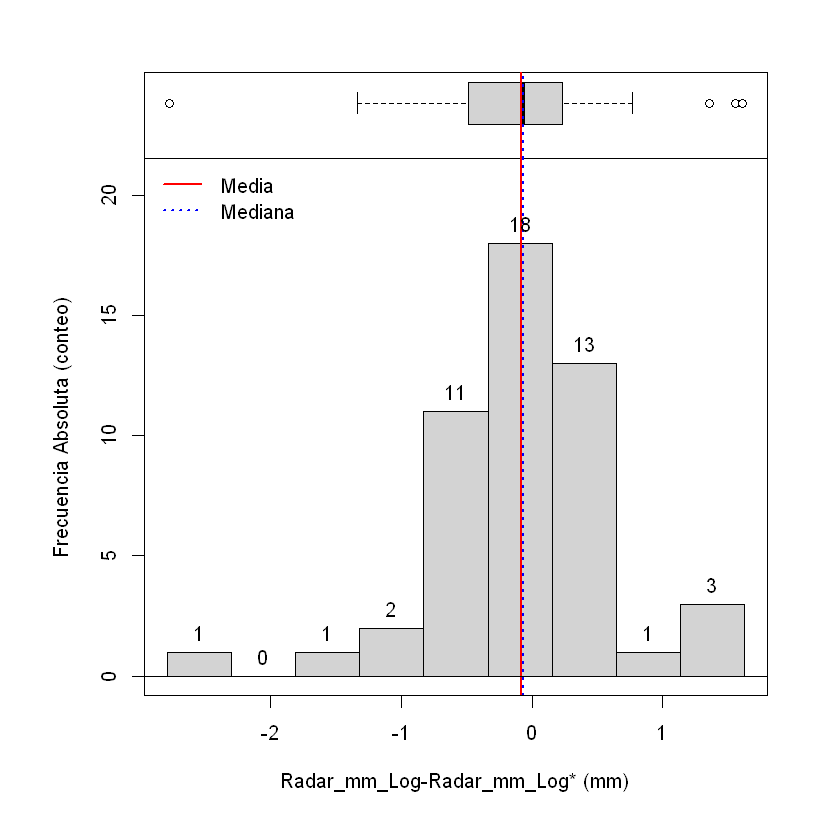

In [118]:
HistBoxplot(x=Radar_mm_Log_CrossValid[,5], mean = Radar_mm_Log_CrossValid_Stat[5,3], median = Radar_mm_Log_CrossValid_Stat[4,3], main ="", 
            xlab = "Radar_mm_Log-Radar_mm_Log* (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE )

Si analizamos el histograma obtenido con la diferencia entre los valores estimados $(Z^*)$ y los valores observados $(Z)$ podemos cuatro valores atípicos, tres a la derecha del boxplot y uno a la izquierda. Para saber cuál es la ubicación de esos valores atípicos graficamos su distribución espacial con la función "DEspacial".

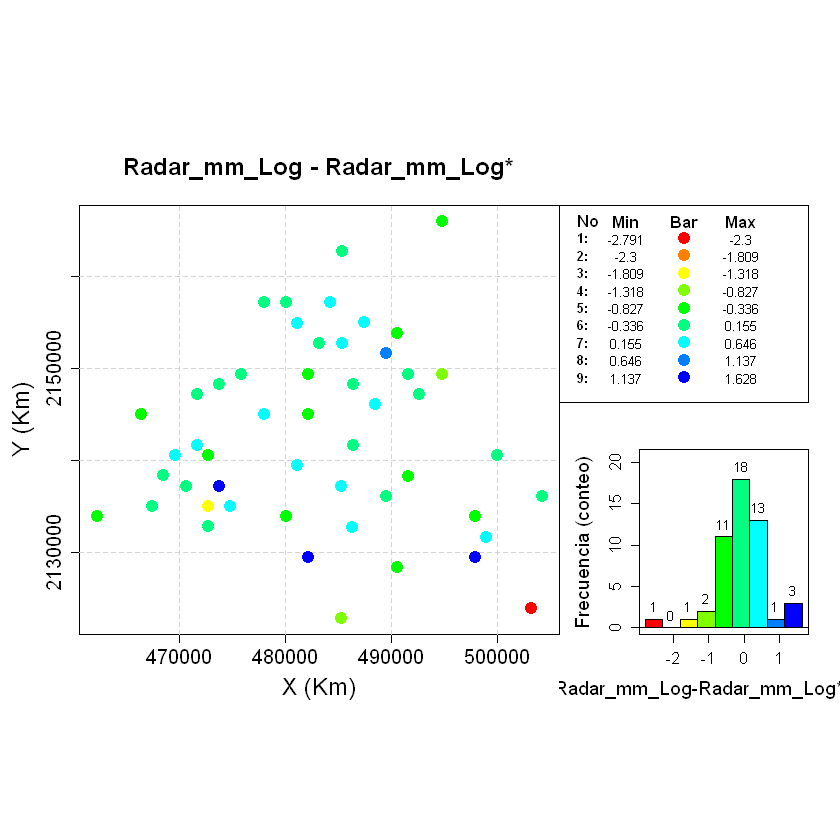

In [119]:
DEspacial(Radar_mm_Log_CrossValid[,1], Radar_mm_Log_CrossValid[,2], Radar_mm_Log_CrossValid[,5],
          'X (Km)', 'Y (Km)', 'Radar_mm_Log-Radar_mm_Log* (mm)', 'Radar_mm_Log - Radar_mm_Log*')

De este grafico podemos notar que el valor atípico negativo marcado en color rojo está en la frontera, por lo que es difícil saber si es un valor atípico. Mientras que los valores atípicos marcados en azul fuerte probablemente si sean valores atípicos espaciales, en especial el ubicado a la izquierda, ya que los valores vecinos tienen valores más pequeños en comparación.

Los siguiente es saber si el modelo propuesto refleja adecuadamente la relación espacial de los datos, esto lo podemos saber usando un gráfico de dispersión. Si los datos estimados $\textbf{$Z^*$}$ son cercanos a los valores reales $\textbf{Z}$ entonces podríamos esperar que la dependencia sea alta.

In [120]:
# Radar_mm_Log is the independent variable
X<-Radar_mm_Log_CrossValid[,3]
# Radar_mm_Log* is the dependent variable
Y<-Radar_mm_Log_CrossValid[,4]

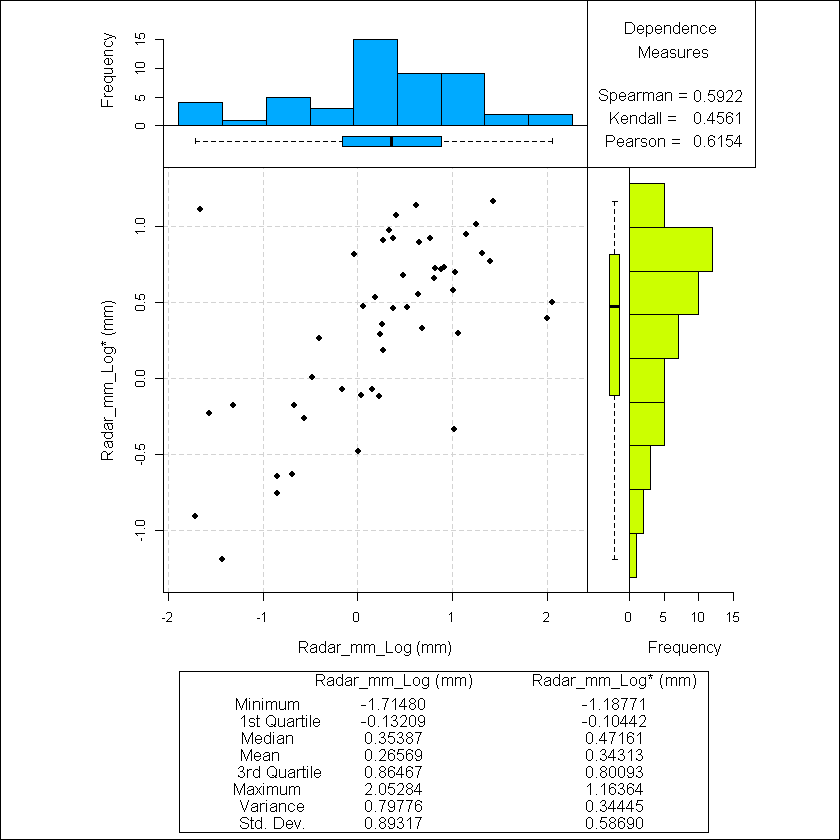

In [121]:
ScatterPlot(Radar_mm_Log_CrossValid[,3] , Radar_mm_Log_CrossValid[,4], 9, 
            Xmin = Radar_mm_Log_CrossValid_Stat[2,1], Xmax = Radar_mm_Log_CrossValid_Stat[7,1], 
            Ymin = Radar_mm_Log_CrossValid_Stat[2,2],Ymax = Radar_mm_Log_CrossValid_Stat[7,2], 
            XLAB = "Radar_mm_Log (mm)", YLAB = "Radar_mm_Log* (mm)")

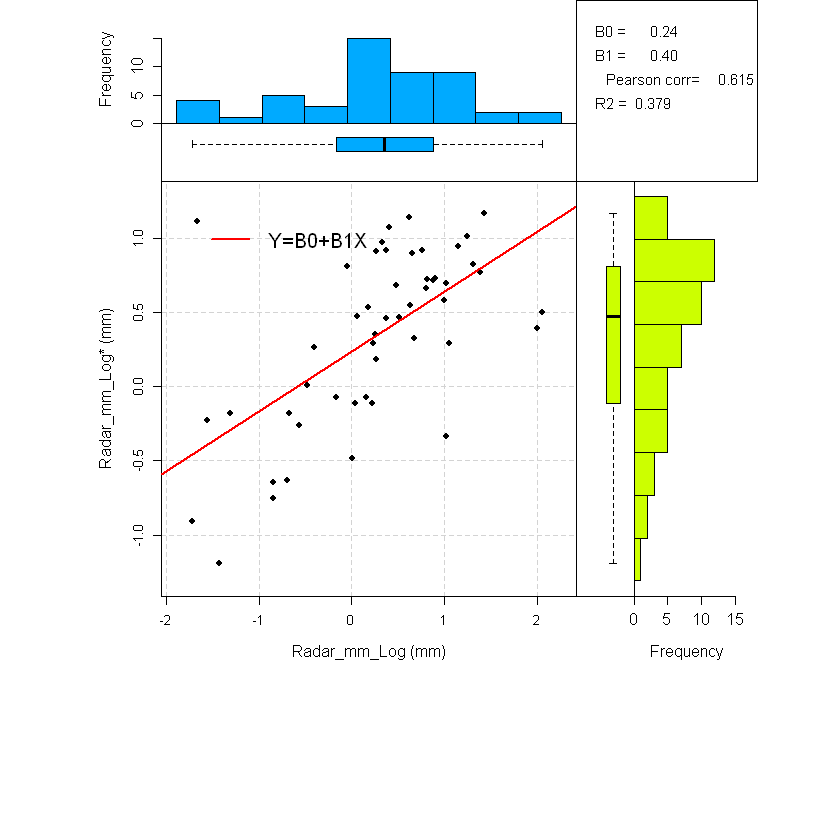

In [122]:
scaterplotReg(Radar_mm_Log_CrossValid[,3] , Radar_mm_Log_CrossValid[,4], 9, 
            Xmin = Radar_mm_Log_CrossValid_Stat[2,1], Xmax = Radar_mm_Log_CrossValid_Stat[7,1], 
            Ymin = Radar_mm_Log_CrossValid_Stat[2,2],Ymax = Radar_mm_Log_CrossValid_Stat[7,2], 
            XLAB = "Radar_mm_Log (mm)", YLAB = "Radar_mm_Log* (mm)")

Observando los resultados del grafico de dispersión notamos que la dependencia no es lo suficientemente alta para ofrecer una buena representación de la variable aleatoria a partir del variograma propuesto.

## Analisis variografico variable Pluv_mm_Log

Ahora toca hacer el análisis variográfico de la variable Pluv_mm_Log. Primero obtenemos su distribución espacial.

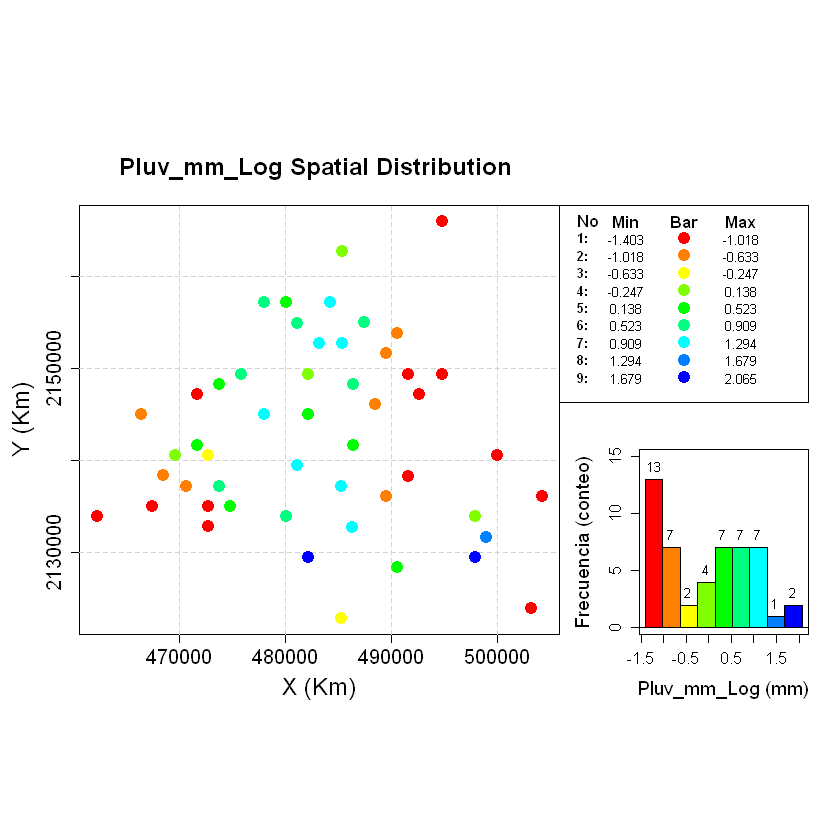

In [123]:
DEspacial(XCoord, YCoord, Pluv_mm_Log,
          'X (Km)', 'Y (Km)', 'Pluv_mm_Log (mm)', 'Pluv_mm_Log Spatial Distribution ')

### Análisis de tendencia.

Al igual que la variable anterior, se hace el análisis de estacionaridad usando la función "Gdirecciones".

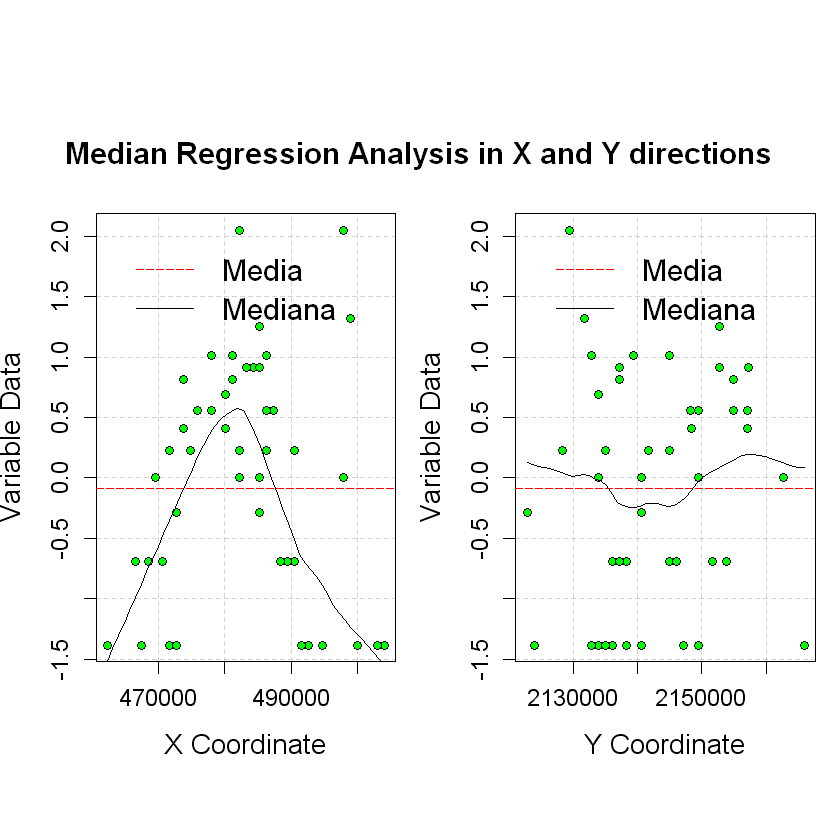

In [124]:
GDirecciones(XCoord, YCoord, Pluv_mm_Log)

Respecto al análisis de tendencia usando la regresión de la mediana, se puede notar el mismo efecto de tendencia en la coordenada X, por lo que veremos si este efecto se manifiesta en el variograma.

Estimamos el valor del intervalo y su número.

In [125]:
N_lags<-10
DistMin<-min(dist(Data_File[,1:2])) # Minimum distance in data
DistMax<-max(dist(Data_File[,1:2])) # Maximum distance in data
lag_value<- (DistMax/2)/N_lags # DistMin

Y calculamos el variograma.

variog: computing omnidirectional variogram


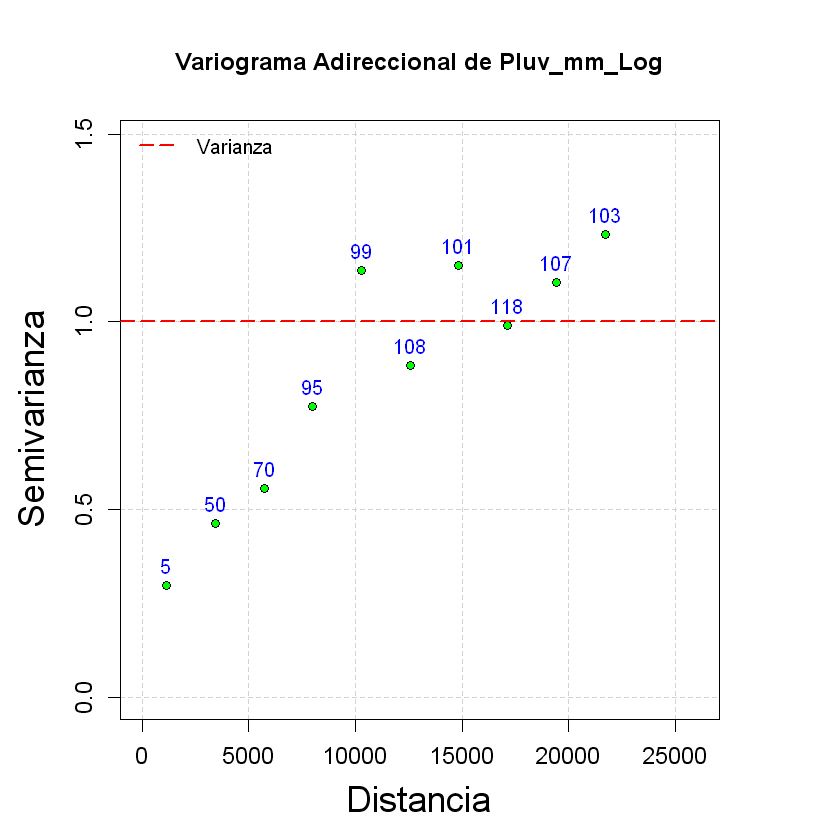

In [126]:
Pluv_mm_Log_VarioEstimation<-Variograma(XCoord, YCoord, 
                                         Pluv_mm_Log, 0, 90, 1*N_lags, lag_value, 1, "Variograma Adireccional de Pluv_mm_Log")

El variograma que se obtuvo muestra una buena estimación excepto en el primer intervalo, además podemos notar que el modelo se acota, por lo tanto, no hay tendencia.

In [127]:
Pluv_mm_Log_VarioEstimation

Npares Lags      Semivarianzas
1    5     1142.404 0.2988209    
2   50     3427.212 0.4633333    
3   70     5712.020 0.5569420    
4   95     7996.827 0.7741376    
5   99    10281.635 1.1369521    
6  108    12566.443 0.8833747    
7  101    14851.251 1.1492244    
8  118    17136.059 0.9906020    
9  107    19420.867 1.1042933    
10 103    21705.674 1.2318517

Aquí recordamos que, en caso de que el variograma muestre tendencia, podemos usar la transformación polinomial. Al igual que la variable anterior, esto se hace usando la función "Trend"

In [128]:
pol_degree=1
Pluv_mm_Log_Detrended_1<-Trend(XCoord, YCoord, 
                                Pluv_mm_Log, pol_degree) 

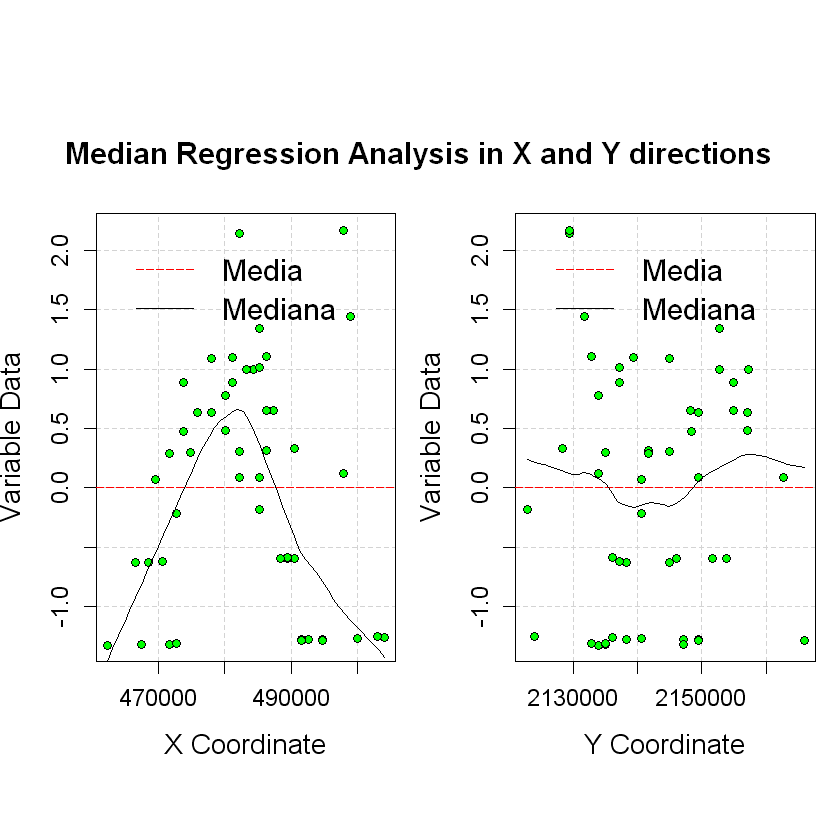

In [129]:
GDirecciones(Pluv_mm_Log_Detrended_1[,1], Pluv_mm_Log_Detrended_1[,2], Pluv_mm_Log_Detrended_1[,3])

Al igual que la variable anterior, notamos la presencia de tendencia en la dirección X, veremos que sucede con el variograma estimado con la transformación de primer orden.

variog: computing omnidirectional variogram


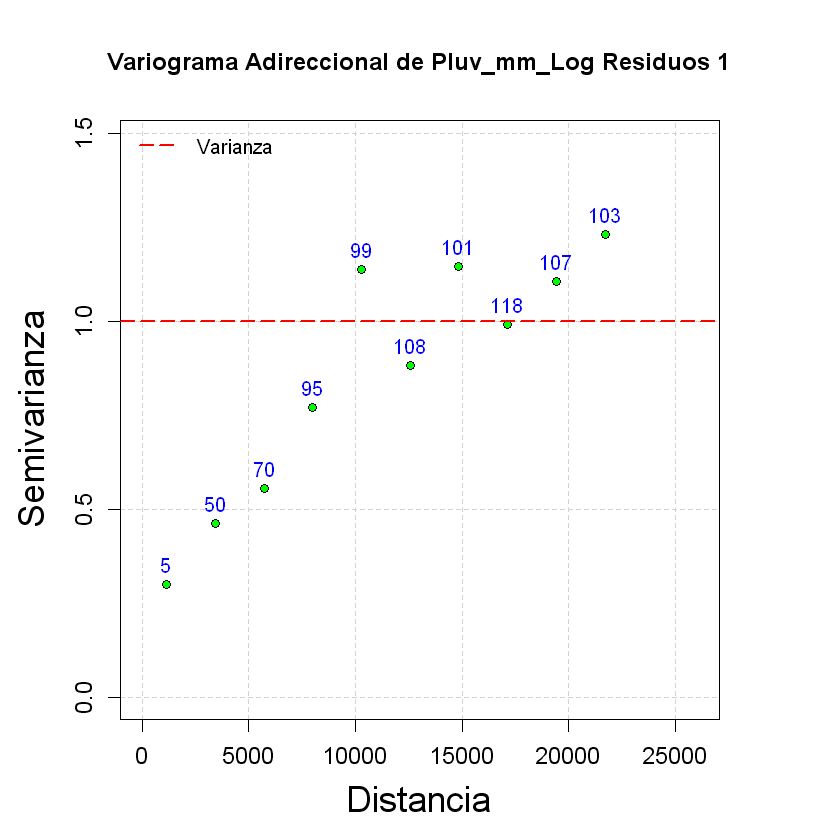

In [130]:
Pluv_mm_Log_Detrended_1_VarioEstimation<-Variograma(Pluv_mm_Log_Detrended_1[,1], Pluv_mm_Log_Detrended_1[,2], 
                                                     Pluv_mm_Log_Detrended_1[,3], 0, 90, N_lags, lag_value, 1, 
                                                     "Variograma Adireccional de Pluv_mm_Log Residuos 1")

Para usar la transformación de segundo orden.

In [131]:
pol_degree=2
Pluv_mm_Log_Detrended_2<-Trend(XCoord, YCoord, 
                                Pluv_mm_Log, pol_degree) 

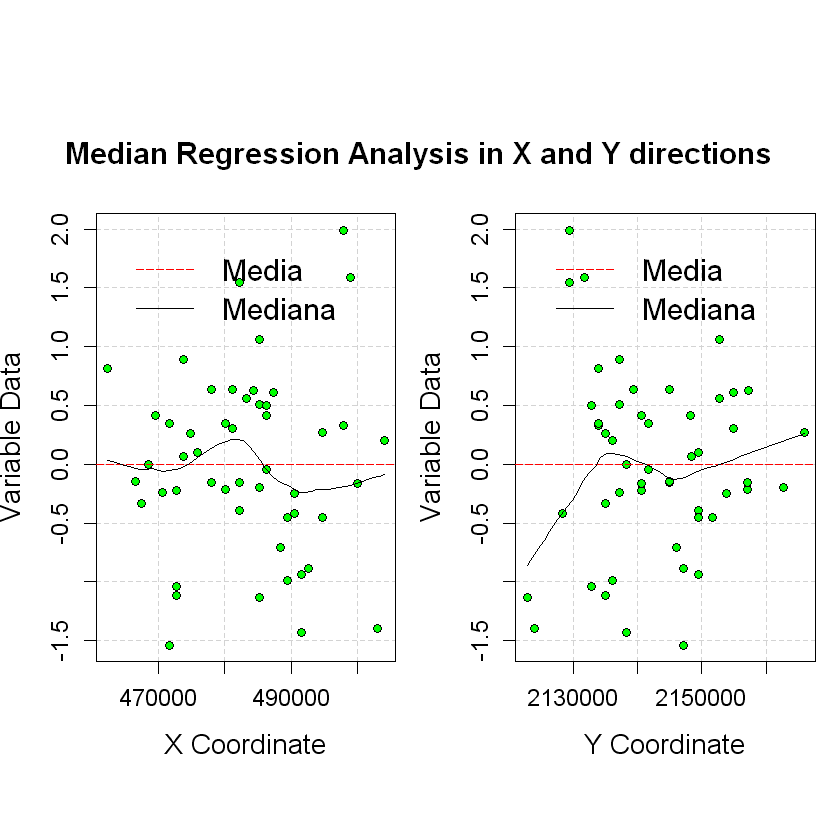

In [132]:
GDirecciones(Pluv_mm_Log_Detrended_2[,1], Pluv_mm_Log_Detrended_2[,2], Pluv_mm_Log_Detrended_2[,3])

Usando la transformada de segundo orden podemos notar que la coordenada X tuvo una mejora, sin embargo la coordenada Y empeoró su regresión.

variog: computing omnidirectional variogram


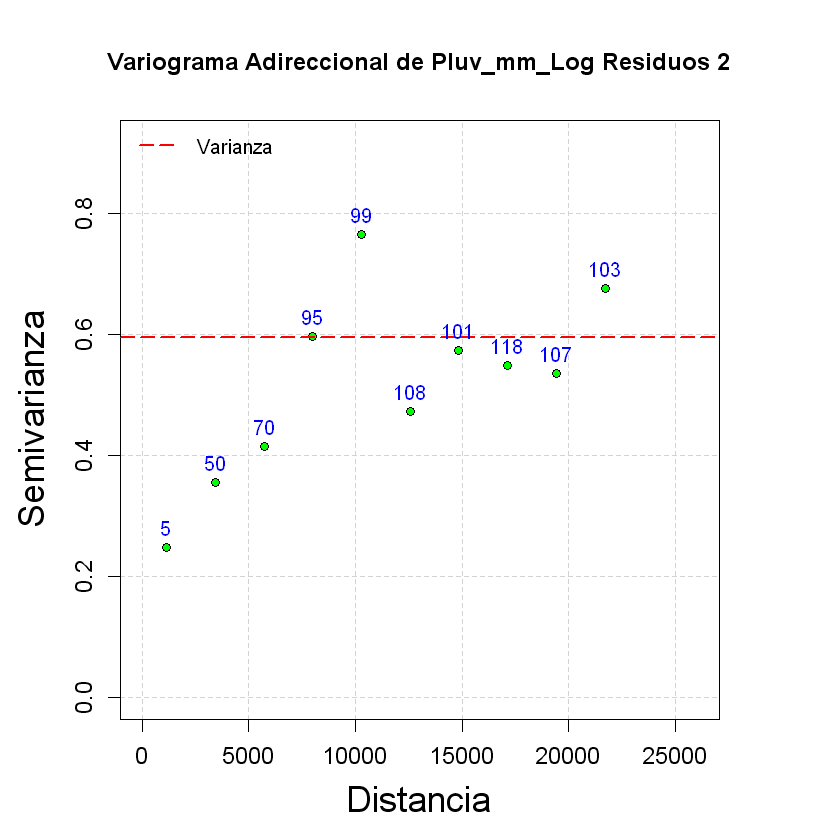

In [133]:
Pluv_mm_Log_Detrended_2_VarioEstimation<-Variograma(Pluv_mm_Log_Detrended_2[,1], Pluv_mm_Log_Detrended_2[,2], 
                                                     Pluv_mm_Log_Detrended_2[,3], 0, 90, N_lags, lag_value, 1, 
                                                     "Variograma Adireccional de Pluv_mm_Log Residuos 2")

El variograma que se obtuvo con la transformación de segundo orden empeoro. Este ejemplo sirve para notar el efecto de la transformación, si se usa de forma incorrecta podríamos tener una peor estimación del variograma experimental.

Dados los resultados se decidió usar el variograma adireccional para hacer el ajuste de modelo.

variog: computing omnidirectional variogram


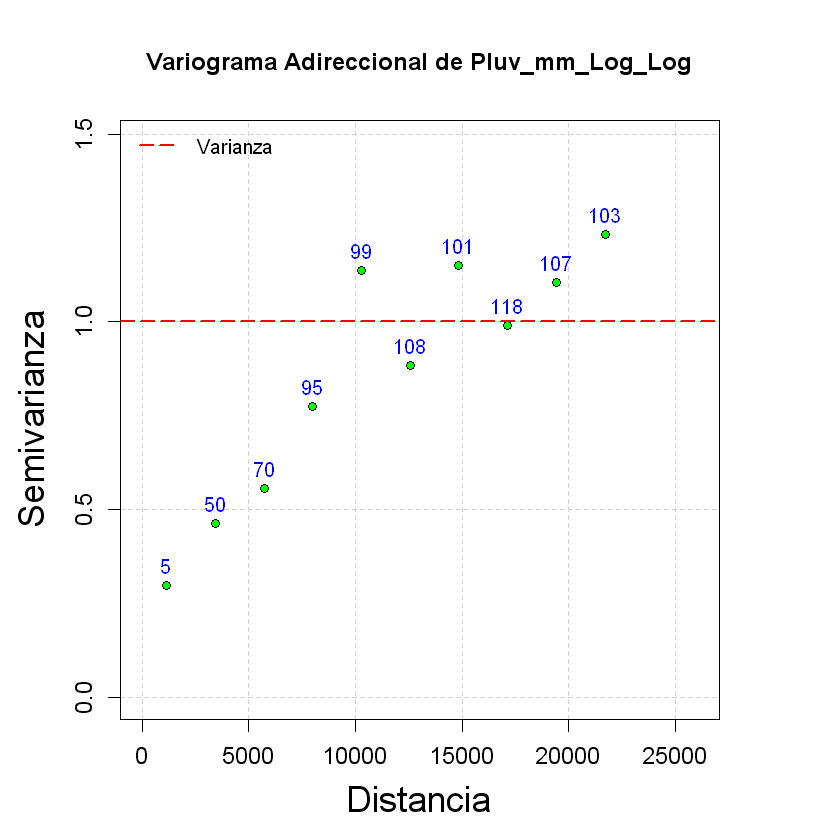

In [134]:
Pluv_mm_Log_VarioEstimation<-Variograma(XCoord, YCoord, 
                                         Pluv_mm_Log, 0, 90, N_lags, lag_value, 1, "Variograma Adireccional de Pluv_mm_Log_Log")

In [135]:
Pluv_mm_Log_VarioEstimation

Npares Lags      Semivarianzas
1    5     1142.404 0.2988209    
2   50     3427.212 0.4633333    
3   70     5712.020 0.5569420    
4   95     7996.827 0.7741376    
5   99    10281.635 1.1369521    
6  108    12566.443 0.8833747    
7  101    14851.251 1.1492244    
8  118    17136.059 0.9906020    
9  107    19420.867 1.1042933    
10 103    21705.674 1.2318517

Ahora que sabemos cuál es el mejor variograma procedemos a calcular los variogramas direccionales y determinar si existe algún tipo de anisotropía. Comenzamos con la dirección 0º.

variog: computing variogram for direction = 0 degrees (0 radians)
        tolerance angle = 22.5 degrees (0.393 radians)


Npares Lags      Semivarianzas
1   1      1142.404 0.0000000    
2  14      3427.212 0.5171901    
3  13      5712.020 0.4657970    
4  25      7996.827 0.5229390    
5  24     10281.635 0.7015614    
6  31     12566.443 0.3949000    
7  24     14851.251 0.4575810    
8  31     17136.059 0.8799773    
9  17     19420.867 1.2713896    
10 23     21705.674 0.7104754

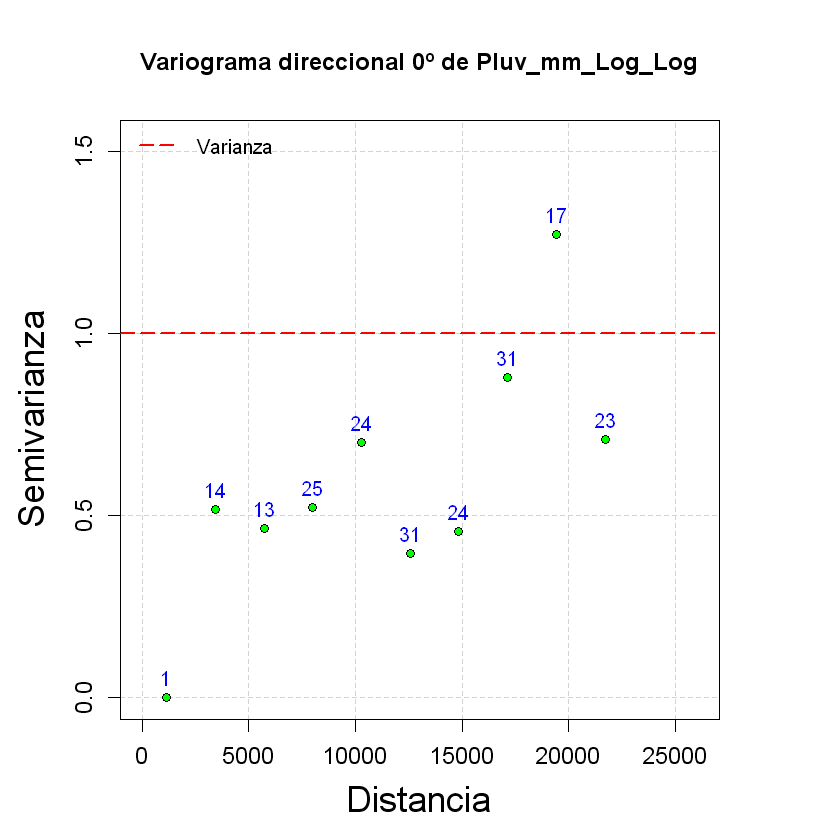

In [136]:
Pluv_mm_Log_VarioEstimation_0<-Variograma(XCoord, YCoord, 
                                         Pluv_mm_Log, 0, 22.5, N_lags, lag_value, 1, "Variograma direccional 0º de Pluv_mm_Log_Log")
Pluv_mm_Log_VarioEstimation_0

En esta dirección se puede observar que este variograma no está bien estimado, solo dos intervalos superan los 30 pares.

Seguimos con la dirección de 45º.

variog: computing variogram for direction = 45 degrees (0.785 radians)
        tolerance angle = 22.5 degrees (0.393 radians)


Npares Lags      Semivarianzas
1 14      3427.212 0.4759408    
2 15      5712.020 0.5214920    
3 22      7996.827 0.6379057    
4 29     10281.635 0.9838092    
5 24     12566.443 1.3717237    
6 28     14851.251 1.2991847    
7 35     17136.059 0.9760720    
8 32     19420.867 0.9106024    
9 40     21705.674 1.5357749

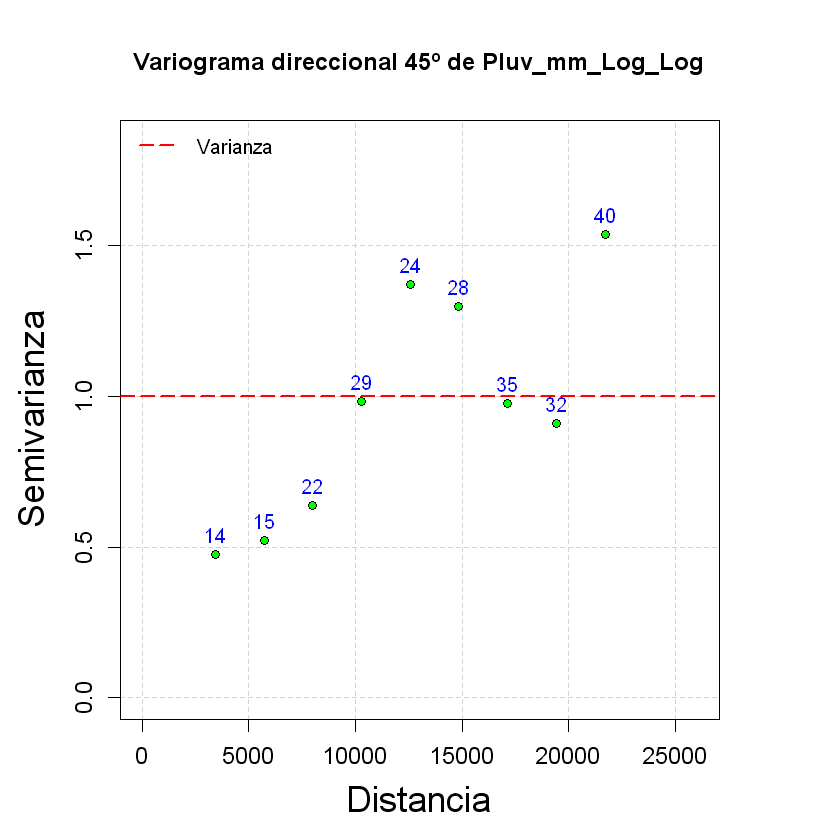

In [137]:
Pluv_mm_Log_VarioEstimation_45<-Variograma(XCoord, YCoord, 
                                         Pluv_mm_Log, 45, 22.5, N_lags, lag_value, 1, "Variograma direccional 45º de Pluv_mm_Log_Log")
Pluv_mm_Log_VarioEstimation_45

El variograma con dirección 45º tampoco está bien estimado, solo tres intervalos superan los 30 pares.

Calculamos el variograma con dirección 90º.

variog: computing variogram for direction = 90 degrees (1.571 radians)
        tolerance angle = 22.5 degrees (0.393 radians)


Npares Lags      Semivarianzas
1   3      1142.404 0.4545444    
2  10      3427.212 0.5983756    
3  17      5712.020 1.0493852    
4  22      7996.827 0.9129011    
5  23     10281.635 1.1322249    
6  32     12566.443 1.0291239    
7  24     14851.251 1.6033039    
8  28     17136.059 1.0096557    
9  30     19420.867 1.2462150    
10 14     21705.674 1.2266749

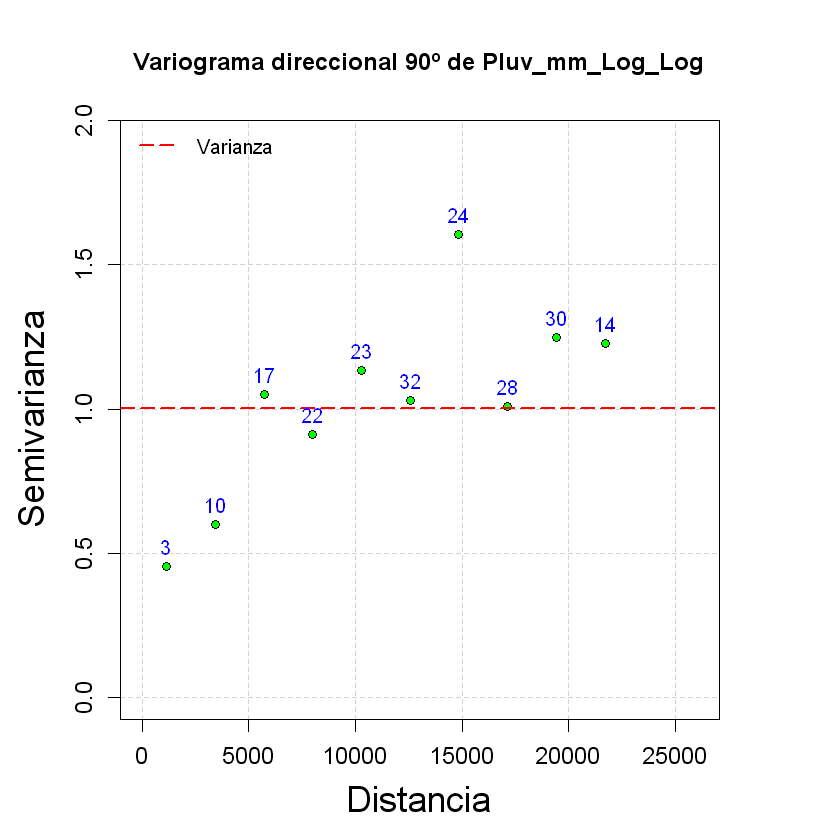

In [138]:
Pluv_mm_Log_VarioEstimation_90<-Variograma(XCoord, YCoord, 
                                         Pluv_mm_Log, 90, 22.5, N_lags, lag_value, 1, "Variograma direccional 90º de Pluv_mm_Log_Log")
Pluv_mm_Log_VarioEstimation_90

En este caso podemos notar que el variograma no está bien estimado, solo dos intervalos tienen más de 30 pares.

Calculamos la dirección 135º.

variog: computing variogram for direction = 135 degrees (2.356 radians)
        tolerance angle = 22.5 degrees (0.393 radians)


Npares Lags      Semivarianzas
1   1      1142.404 0.1304714    
2  12      3427.212 0.2732561    
3  25      5712.020 0.2907460    
4  26      7996.827 1.0135327    
5  23     10281.635 1.7890932    
6  21     12566.443 0.8242492    
7  25     14851.251 1.2093302    
8  24     17136.059 1.1324523    
9  28     19420.867 1.0721439    
10 26     21705.674 1.2282827

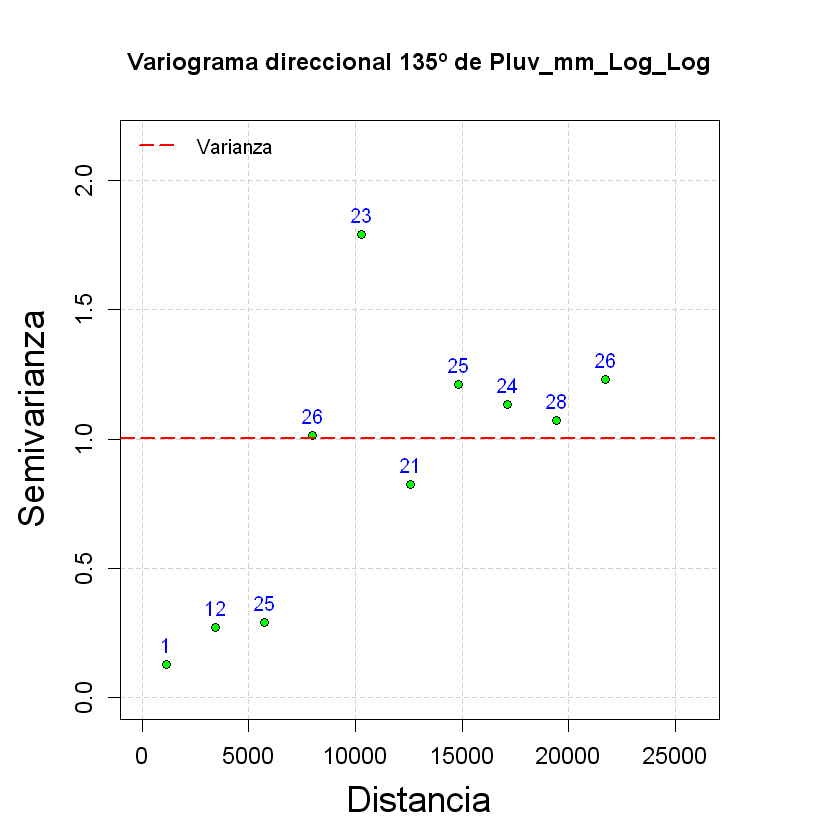

In [139]:
Pluv_mm_Log_VarioEstimation_135<-Variograma(XCoord, YCoord, 
                                         Pluv_mm_Log, 135, 22.5, N_lags, lag_value, 1, "Variograma direccional 135º de Pluv_mm_Log_Log")
Pluv_mm_Log_VarioEstimation_135

Con este caso podemos notar que es el peor variograma experimental, no hay intervalo que tenga más de 30 pares.

Debido a los malos resultados se recomienda usar el variograma adireccional y considerar que el los variogramas direccionales no permiten establecer si existe algún tipo de anisotropía, por lo tanto, consideraremos que el variograma es isotrópico.

variog: computing variogram for direction = 0 degrees (0 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 45 degrees (0.785 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 90 degrees (1.571 radians)
        tolerance angle = 22.5 degrees (0.393 radians)
variog: computing variogram for direction = 135 degrees (2.356 radians)
        tolerance angle = 22.5 degrees (0.393 radians)


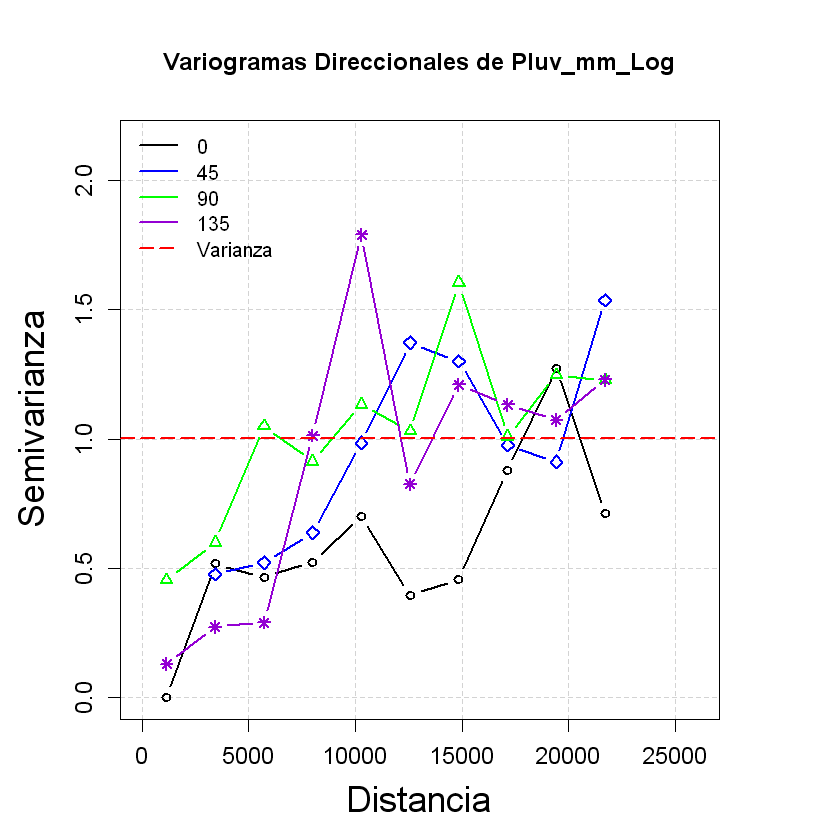

In [140]:
Pluv_mm_Log_VarioEstimation4D<-Variograma4D(XCoord, YCoord, 
                                         Pluv_mm_Log, 0, 45, 90, 135, 22.5, N_lags, lag_value, 1, "Variogramas Direccionales de Pluv_mm_Log")

In [141]:
Pluv_mm_Log_VarioEstimation4D

$Zero
      [,1]      [,2]      [,3]
 [1,]    1  1142.404 0.0000000
 [2,]   14  3427.212 0.5171901
 [3,]   13  5712.020 0.4657970
 [4,]   25  7996.827 0.5229390
 [5,]   24 10281.635 0.7015614
 [6,]   31 12566.443 0.3949000
 [7,]   24 14851.251 0.4575810
 [8,]   31 17136.059 0.8799773
 [9,]   17 19420.867 1.2713896
[10,]   23 21705.674 0.7104754

$FortyFive
      [,1]      [,2]      [,3]
 [1,]   14  3427.212 0.4759408
 [2,]   15  5712.020 0.5214920
 [3,]   22  7996.827 0.6379057
 [4,]   29 10281.635 0.9838092
 [5,]   24 12566.443 1.3717237
 [6,]   28 14851.251 1.2991847
 [7,]   35 17136.059 0.9760720
 [8,]   32 19420.867 0.9106024
 [9,]   40 21705.674 1.5357749

$Ninety
      [,1]      [,2]      [,3]
 [1,]    3  1142.404 0.4545444
 [2,]   10  3427.212 0.5983756
 [3,]   17  5712.020 1.0493852
 [4,]   22  7996.827 0.9129011
 [5,]   23 10281.635 1.1322249
 [6,]   32 12566.443 1.0291239
 [7,]   24 14851.251 1.6033039
 [8,]   28 17136.059 1.0096557
 [9,]   30 19420.867 1.2462150
[10,]   14 21705.674 1.2266749

$OneThertyFive
      [,1]      [,2]      [,3]
 [1,]    1  1142.404 0.1304714
 [2,]   12  3427.212 0.2732561
 [3,]   25  5712.020 0.2907460
 [4,]   26  7996.827 1.0135327
 [5,]   23 10281.635 1.7890932
 [6,]   21 12566.443 0.8242492
 [7,]   25 14851.251 1.2093302
 [8,]   24 17136.059 1.1324523
 [9,]   28 19420.867 1.0721439
[10,]   26 21705.674 1.2282827

Ahora estimamos los modelos de variograma autorizados:

variog: computing omnidirectional variogram
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is gaussian 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is gaussian 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: min

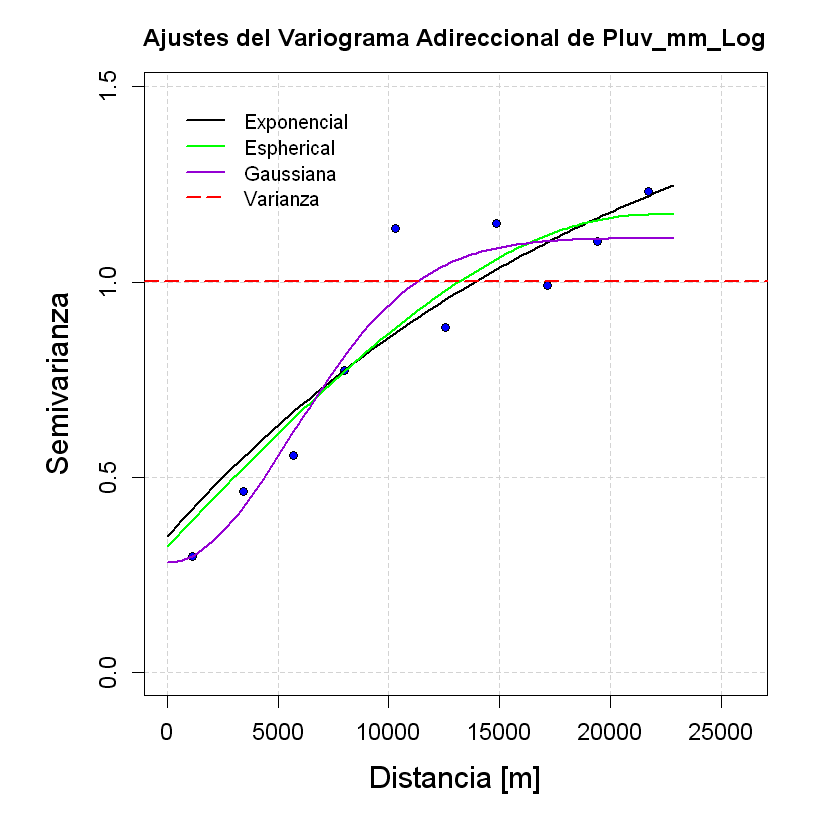

In [142]:
Pluv_mm_Log_AllModelVarioFit<-AllModel(XCoord, YCoord, 
                                    Pluv_mm_Log, 0, 90, N_lags, lag_value, 1, "Ajustes del Variograma Adireccional de Pluv_mm_Log")

In [143]:
Pluv_mm_Log_AllModelVarioFit

Nugget    Meseta+Nugget Alcance   SCE       
exponential 0.3484807 1.727137      21705.000 0.14093110
spherical   0.3232237 1.171616      21705.000 0.12636551
gaussian    0.2820669 1.111793       7955.107 0.09853297

Dados los resultados del ajuste automático podemos ver que sus errores no tienen diferencias significativas. Pero podemos considerar que el mejor modelo estimado es el gaussiano.

variog: computing omnidirectional variogram
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is gaussian 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is gaussian 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is exponential 
variofit: weights used: npairs 
variofit: minimisation function used: optim 
variofit: covariance model used is spherical 
variofit: weights used: npairs 
variofit: min

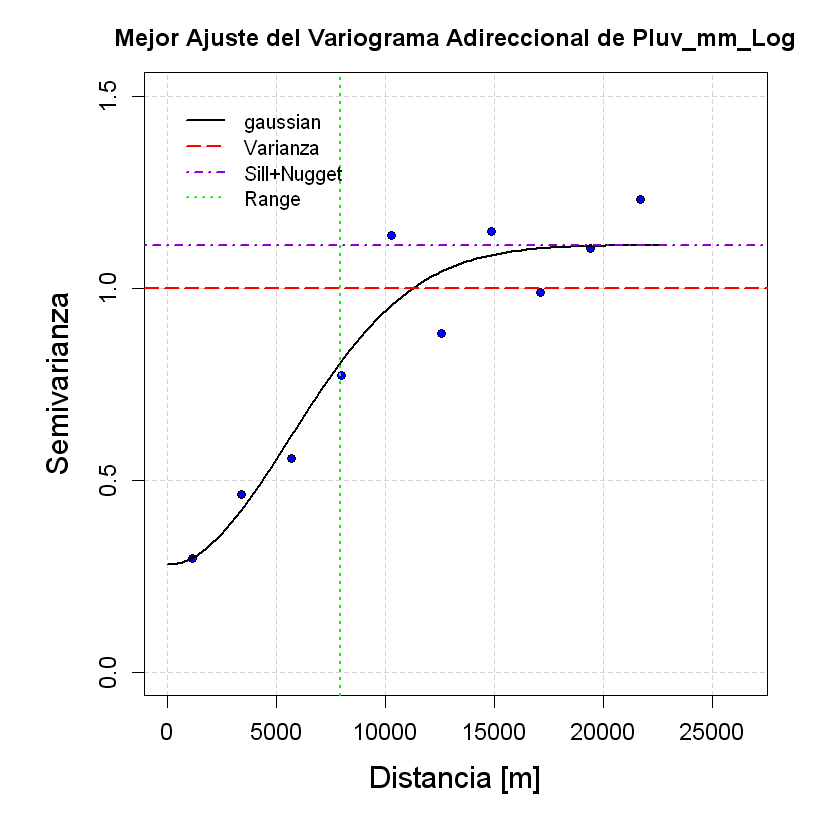

In [144]:
Pluv_mm_Log_BestModelVarioFit<-BestModel(XCoord, YCoord, 
                                      Pluv_mm_Log, 0, 90, N_lags, lag_value, 1, "Mejor Ajuste del Variograma Adireccional de Pluv_mm_Log")

In [145]:
Pluv_mm_Log_BestModelVarioFit

Nugget    Meseta+Nugget Alcance  SCE        MaxY     MinY     
gaussian 0.2820669 1.111793      7955.107 0.09623212 1.231852 0.2988209

También podemos hacer el ajuste manual del variograma para analizar si es posible mejorar el modelo.

Ajustamos el variograma de forma manual y obtenemos lo siguiente:

In [146]:
#modelos de variograma (1- exponential, 2- spherical, 3- gaussian)
vario_model<- 2 # 2
nugget<- 0.08 # 0.08
sill_and_nugget<- 1.1 # 1.1
rank <- 15000 # 15000

variog: computing omnidirectional variogram


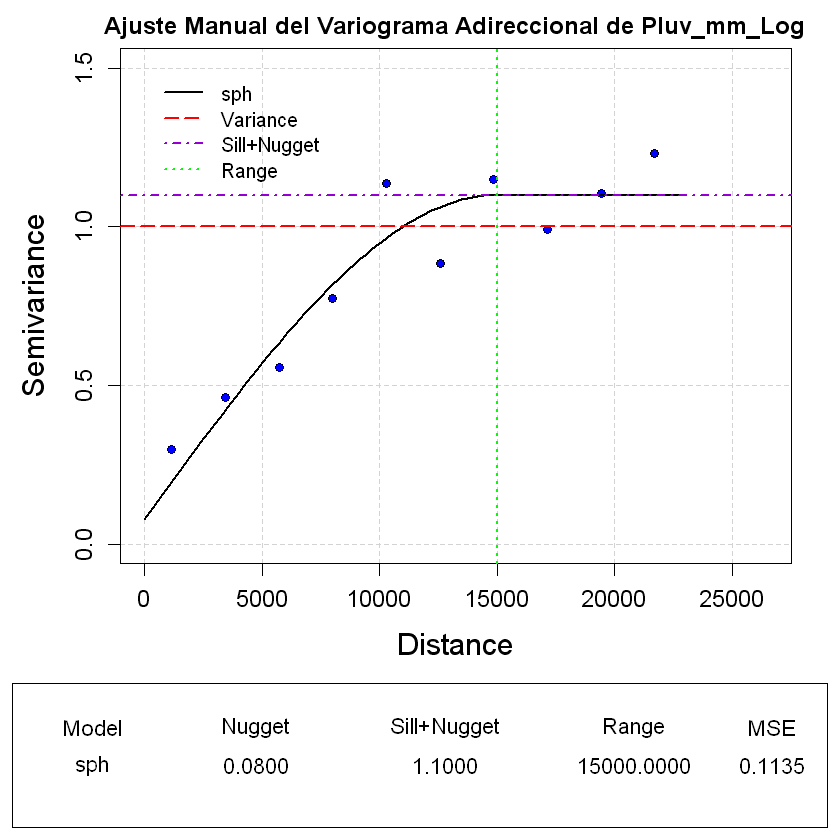

In [147]:
Pluv_mm_Log_EyeModelVarioFit<-EyeModel(XCoord, YCoord, 
                                    Pluv_mm_Log, 0, 90, N_lags, lag_value, 1, 
                                    vario_model, nugget, sill_and_nugget, rank, "Ajuste Manual del Variograma Adireccional de Pluv_mm_Log")

Ya que tenemos el mejor ajuste calculamos la validación cruzada.

In [148]:
Pluv_mm_Log_CrossValid<- CrossValidation(XCoord, YCoord, 
                                      Pluv_mm_Log, vario_model, nugget, sill_and_nugget, rank, MaxAnis=0, proporcion=1)
Pluv_mm_Log_CrossValid

X      Y       Z          Z*          Z-Z*        
1  485303 2162682  0.0000000 -0.06425495  0.064254949
2  484253 2157150  0.9162907  0.66992096  0.246369776
3  487403 2154937  0.5596158  0.37333787  0.186277916
4  490552 2153830 -0.6931472 -0.45605034 -0.237096845
5  489502 2151601 -0.6931472 -0.40868722 -0.284459962
6  480054 2157142  0.4054651  0.69411959 -0.288654483
7  481104 2154828  0.8109302  0.78943165  0.021498564
8  483203 2152713  0.9162907  0.91233182  0.003958910
9  475855 2149399  0.5596158  0.36395926  0.195656524
10 486353 2148284  0.5596158 -0.18148616  0.741101946
11 482155 2149394  0.0000000  0.87415516 -0.874155163
12 492651 2147174 -1.3862944 -1.43082205  0.044527693
13 494751 2149386 -1.3862944 -1.42033062  0.034036255
14 477955 2144973  1.0116009  0.45532103  0.556279877
15 472694 2140554 -0.2876821  0.38421625 -0.671898320
16 473739 2137233  0.8109302 -0.29213702  1.103067233
17 481095 2139437  1.0116009  0.91224194  0.099358971
18 482154 2144968  0.2231436  0.70952495 -0.486381394
19 486348 2141645  0.2231436 -0.11692038  0.340063933
20 471645 2141662  0.2231436 -0.20986848  0.433012029
21 468489 2138348 -0.6931472 -0.69034992 -0.002797265
22 462178 2133934 -1.3862944 -1.06255275 -0.323741610
23 474787 2135019  0.2231436 -0.18754665  0.410690199
24 472682 2132809 -1.3862944 -0.86699160 -0.519302758
25 485294 2137220  0.9162907  0.51481184  0.401478893
26 491597 2138323 -1.3862944 -0.79385931 -0.592435051
27 504199 2136108 -1.3862944 -0.44771027 -0.938584089
28 497899 2133895  0.0000000  0.42504901 -0.425049010
29 498949 2131682  1.3217558  0.74941584  0.572339996
30 480038 2133906  0.6931472  1.35820262 -0.665055441
31 486341 2132793  1.0116009  0.70209707  0.309503843
32 482135 2129478  2.0476928  0.41162297  1.636069876
33 485282 2122836 -0.2876821  1.20108895 -1.488771021
34 489495 2136111 -0.6931472 -0.13854155 -0.554605632
35 490542 2128365  0.2231436  0.85146851 -0.628324957
36 497898 2129469  2.0476928  0.66157096  1.386121879
37 477955 2157144  0.5596158  0.31525677  0.244359015
38 494751 2165983 -1.3862944 -0.09925321 -1.287041155
39 473755 2148298  0.4054651 -0.32413095  0.729596061
40 466407 2144991 -0.6931472 -0.77855229  0.085405114
41 485303 2152711  1.2527630  0.56169490  0.691068070
42 491602 2149387 -1.3862944 -1.07646061 -0.309833747
43 488451 2146070 -0.6931472 -0.41000945 -0.283137730
44 471654 2147195 -1.3862944  0.21496174 -1.601256104
45 469543 2140559  0.0000000 -0.41345917  0.413459172
46 467433 2135030 -1.3862944 -1.23270845 -0.153585908
47 470588 2137238 -0.6931472 -0.67653129 -0.016615890
48 500000 2140533 -1.3862944 -1.26583321 -0.120461151
49 503149 2123937 -1.3862944  0.73600233 -2.122296689
50 472686 2135022 -1.3862944 -0.46695691 -0.919337450

In [149]:
Pluv_mm_Log_CrossValid_Stat<- Val_Estadisticos(Pluv_mm_Log_CrossValid[,c(3,4,5)])
Pluv_mm_Log_CrossValid_Stat

Z        Z*       Z-Z*    
No_muestras        50.00000 50.00000 50.00000
Minimo             -1.38629 -1.43082 -2.12230
Cuartil_1er        -1.21301 -0.45397 -0.51107
Mediana             0.00000 -0.08175  0.00058
Media              -0.09031  0.00660 -0.09691
Cuartil_3er         0.65976  0.66783  0.33242
Maximo              2.04769  1.35820  1.63607
Rango               3.43399  2.78902  3.75837
Rango_Intercuartil  1.87277  1.12180  0.84350
Varianza            1.00045  0.53289  0.51560
Desv_Estandar       1.00022  0.72999  0.71806
Simetria            0.11239 -0.25271 -0.30157
Curtosis            2.01197  2.07699  3.72457

Respecto a los estadígrafos que obtenemos podemos notar que el valor esperado es cercano a cero, pero no lo suficiente para decidir si es un buen ajuste. Mientras que la varianza no es lo suficientemente pequeña.

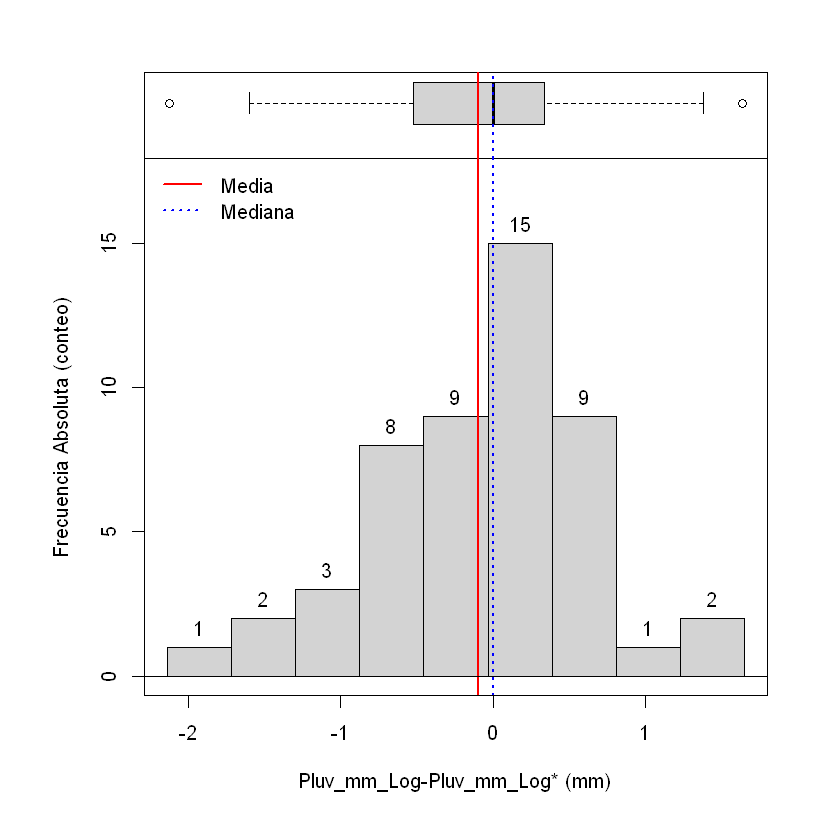

In [150]:
HistBoxplot(x=Pluv_mm_Log_CrossValid[,5], mean = Pluv_mm_Log_CrossValid_Stat[5,3], median = Pluv_mm_Log_CrossValid_Stat[4,3], main ="", 
            xlab = "Pluv_mm_Log-Pluv_mm_Log* (mm)", ylab = "Frecuencia Absoluta (conteo)", AbsFreq = TRUE, PercentFreq = FALSE )

Respecto a su histograma podemos notar que tiene valores atípicos en los extremos.

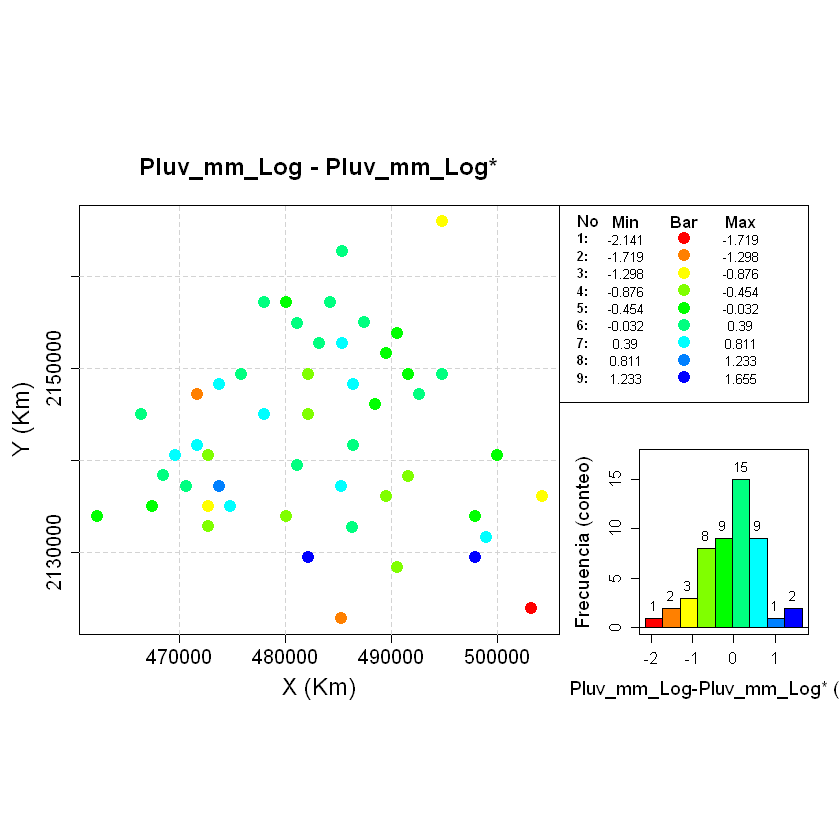

In [151]:
DEspacial(Pluv_mm_Log_CrossValid[,1], Pluv_mm_Log_CrossValid[,2], Pluv_mm_Log_CrossValid[,5],
          'X (Km)', 'Y (Km)', 'Pluv_mm_Log-Pluv_mm_Log* (mm)', 'Pluv_mm_Log - Pluv_mm_Log*')

los valores atipicos mostrados en el grafico espacial coinciden con los valores atipicos localizados en el analisis de la variable radar, en especial los tres que estan debajo de la cota 2130000 

In [152]:
# Pluv_mm_Log is the independent variable
X<-Pluv_mm_Log_CrossValid[,3] # the same as Pluv_mm_Log
# Pluv_mm_Log* is the dependent variable
Y<-Pluv_mm_Log_CrossValid[,4]

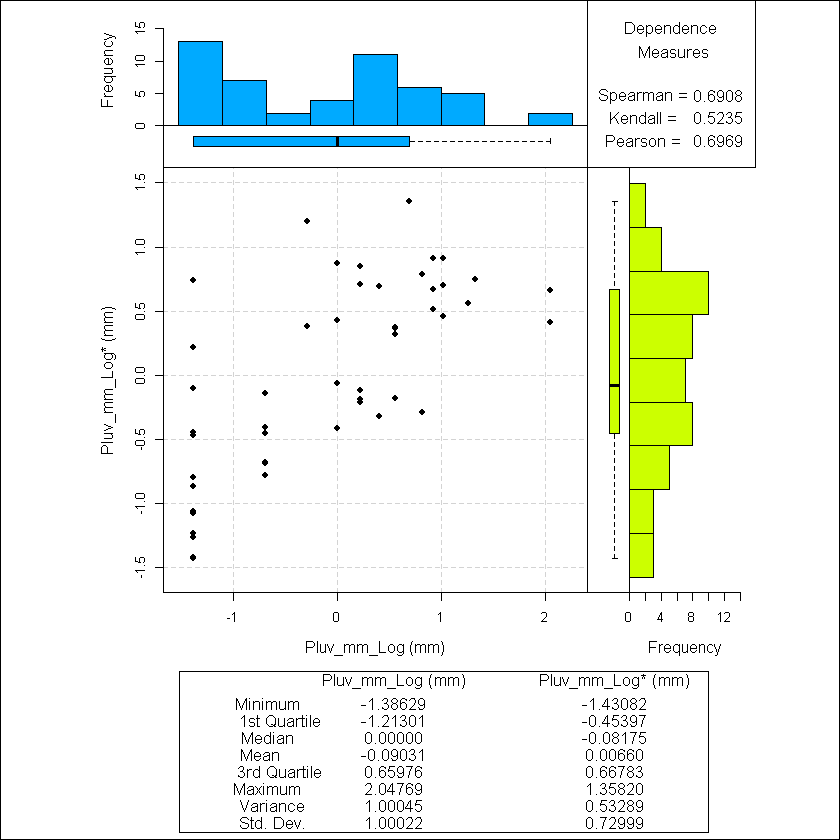

In [153]:
ScatterPlot(Pluv_mm_Log, Pluv_mm_Log_CrossValid[,4], 9, 
            Xmin = Pluv_mm_Log_Stat[2,2], Xmax = Pluv_mm_Log_Stat[7,2], 
            Ymin = Pluv_mm_Log_CrossValid_Stat[2,2],Ymax = Pluv_mm_Log_CrossValid_Stat[7,2], 
            XLAB = "Pluv_mm_Log (mm)", YLAB = "Pluv_mm_Log* (mm)")

Respecto a su grafico de dispersión podemos notar que los valores no tienen una buena dependencia, por lo tanto podemos considerar que la aproximación no es buena, pero podria ser aceptable.

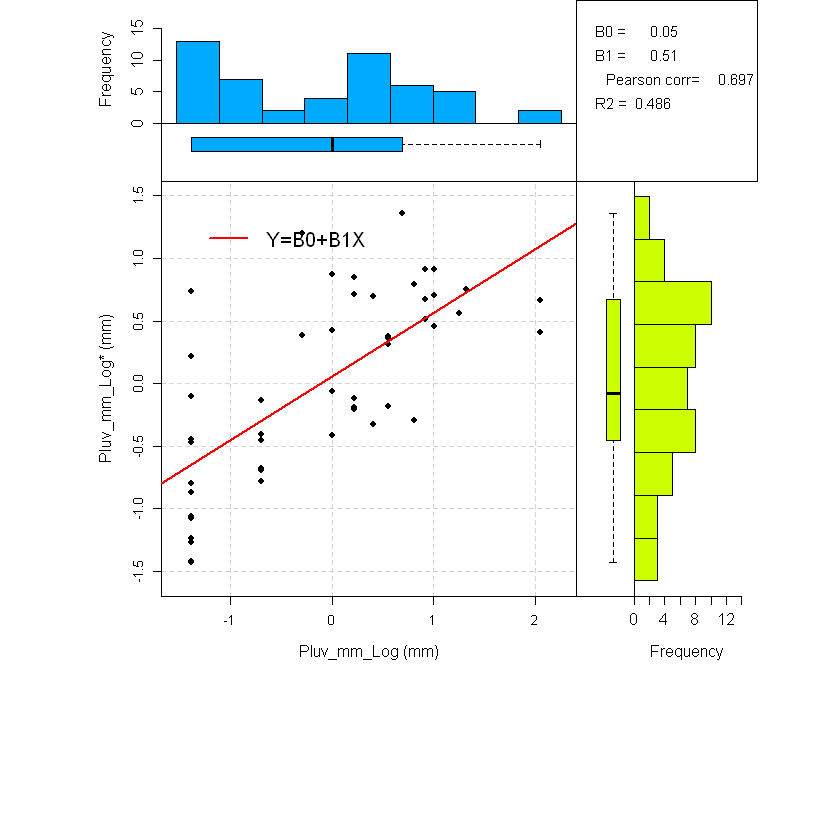

In [154]:
scaterplotReg(Pluv_mm_Log, Pluv_mm_Log_CrossValid[,4], 9, 
            Xmin = Pluv_mm_Log_Stat[2,2], Xmax = Pluv_mm_Log_Stat[7,2], 
            Ymin = Pluv_mm_Log_CrossValid_Stat[2,2],Ymax = Pluv_mm_Log_CrossValid_Stat[7,2], 
            XLAB = "Pluv_mm_Log (mm)", YLAB = "Pluv_mm_Log* (mm)")